In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install opencv-python

In [ ]:
import cv2
import os
from glob import glob

# 🔧 change these paths as per your setup
videos_folder = '/content/drive/MyDrive/TVS Ultrasound videos'
output_base = '/content/drive/MyDrive/Extracted Frames'

os.makedirs(output_base, exist_ok=True)

# get all video files
video_files = glob(os.path.join(videos_folder, '*.*'))
video_files = [v for v in video_files if v.lower().endswith(('.mp4', '.avi', '.mov', '.mkv'))]

for video_path in video_files:
    video_name = os.path.splitext(os.path.basename(video_path))[0]
    output_dir = os.path.join(output_base, video_name)
    os.makedirs(output_dir, exist_ok=True)

    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    print(f"🎥 Processing: {video_name}")

    while True:
        success, frame = cap.read()
        if not success:
            break

        frame_filename = os.path.join(output_dir, f'frame_{frame_count:04d}.jpg')
        cv2.imwrite(frame_filename, frame)
        frame_count += 1

    cap.release()
    print(f"✅ Extracted {frame_count} frames from '{video_name}'")

print("🏁 All videos processed successfully!")


🎥 Processing: K0098639-Harvesting_egg_cells_for_IVF,_ultrasound_scan
✅ Extracted 524 frames from 'K0098639-Harvesting_egg_cells_for_IVF,_ultrasound_scan'
🎥 Processing: K0098645-Ovarian_follicles_in_IVF,_ultrasound_scan
✅ Extracted 439 frames from 'K0098645-Ovarian_follicles_in_IVF,_ultrasound_scan'
🎥 Processing: K0098649-Harvesting_egg_cells_for_IVF,_ultrasound_scan
✅ Extracted 466 frames from 'K0098649-Harvesting_egg_cells_for_IVF,_ultrasound_scan'
🎥 Processing: K0098640-Ovarian_follicles_in_IVF,_ultrasound_scan
✅ Extracted 141 frames from 'K0098640-Ovarian_follicles_in_IVF,_ultrasound_scan'
🎥 Processing: K0098648-Ovarian_follicles_in_IVF,_ultrasound_scan
✅ Extracted 296 frames from 'K0098648-Ovarian_follicles_in_IVF,_ultrasound_scan'
🎥 Processing: K0098641-Harvesting_egg_cells_for_IVF,_ultrasound_scan
✅ Extracted 524 frames from 'K0098641-Harvesting_egg_cells_for_IVF,_ultrasound_scan'
🎥 Processing: K0098642-Harvesting_egg_cells_for_IVF,_ultrasound_scan
✅ Extracted 524 frames from 'K0

In [ ]:
import os

for folder in os.listdir(output_base):
    num_frames = len(os.listdir(os.path.join(output_base, folder)))
    print(f"{folder}: {num_frames} frames")

K0098639-Harvesting_egg_cells_for_IVF,_ultrasound_scan: 524 frames
K0098645-Ovarian_follicles_in_IVF,_ultrasound_scan: 439 frames
K0098649-Harvesting_egg_cells_for_IVF,_ultrasound_scan: 466 frames
K0098640-Ovarian_follicles_in_IVF,_ultrasound_scan: 141 frames
K0098648-Ovarian_follicles_in_IVF,_ultrasound_scan: 296 frames
K0098641-Harvesting_egg_cells_for_IVF,_ultrasound_scan: 524 frames
K0098642-Harvesting_egg_cells_for_IVF,_ultrasound_scan: 524 frames
K0098644-Harvesting_egg_cells_for_IVF,_ultrasound_scan: 431 frames
K0098646-Harvesting_egg_cells_for_IVF,_ultrasound_scan: 524 frames
K0098647-Harvesting_egg_cells_for_IVF,_ultrasound_scan: 524 frames
K0098643-Harvesting_egg_cells_for_IVF,_ultrasound_scan: 473 frames
K0098650-Harvesting_egg_cells_for_IVF,_ultrasound_scan: 516 frames
Chances of Conceiving with Large Follicles ! Ovulation Ultrasound for Follicle Monitoring: 3291 frames
Good Quality - Healthy Follicles - 14th day TVS Ultrasound - Why Patient Fails to Conceive: 4025 frames
P

In [ ]:
#  EDA Analysis

In [ ]:
# --- Setup and Imports ---
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from PIL import Image
import pandas as pd
import random

# --- Path to your extracted frames ---
frames_root = '/content/drive/MyDrive/Extracted Frames'  # Change this

# Helper: list all image paths
def get_all_images(root):
    img_paths = []
    for folder in os.listdir(root):
        full = os.path.join(root, folder)
        if os.path.isdir(full):
            img_paths += glob(os.path.join(full, '*.jpg'))
    return img_paths

all_images = get_all_images(frames_root)
print(f"Total Images Found: {len(all_images)}")


Total Images Found: 47400


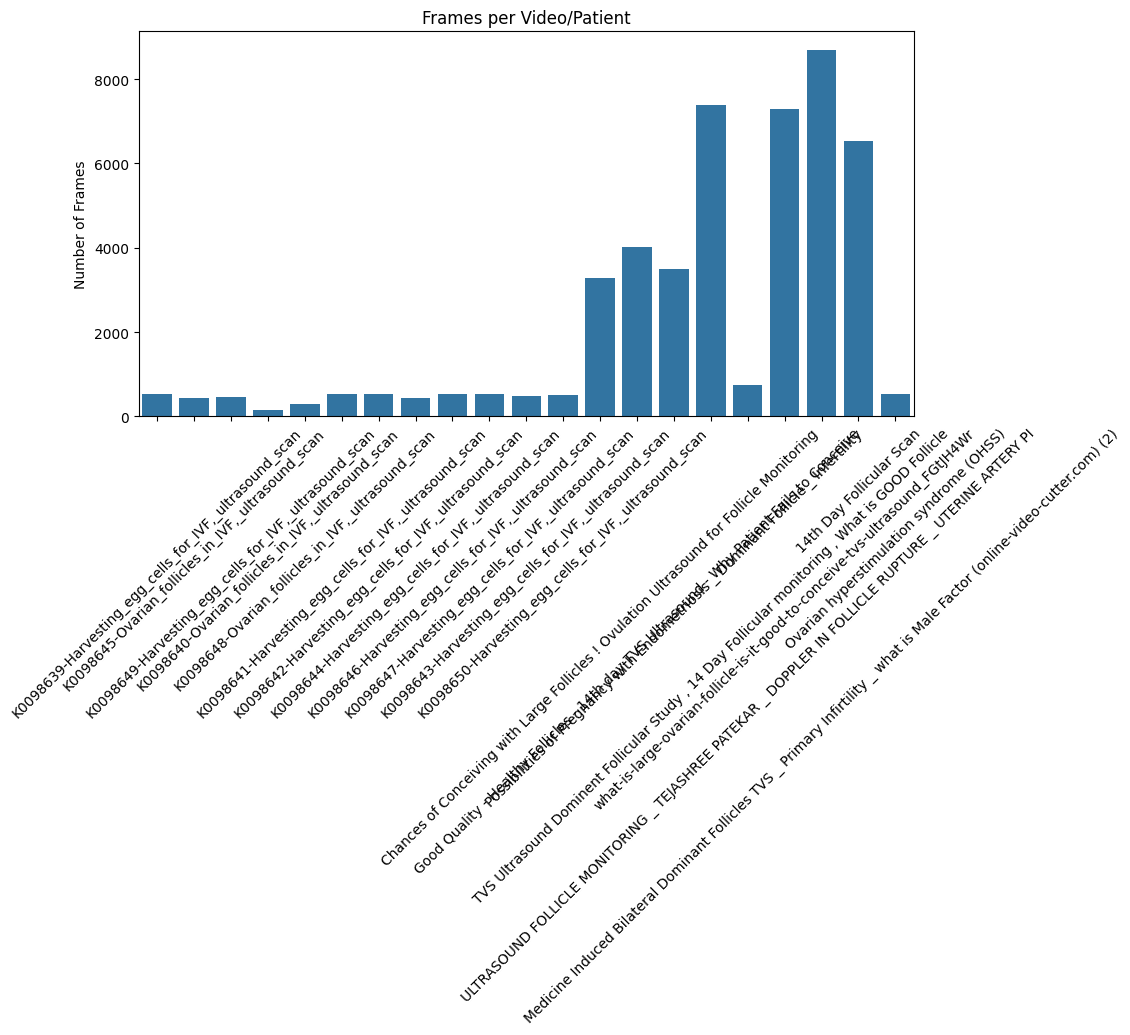

                                                    Frame Count
K0098639-Harvesting_egg_cells_for_IVF,_ultrasou...          524
K0098645-Ovarian_follicles_in_IVF,_ultrasound_scan          439
K0098649-Harvesting_egg_cells_for_IVF,_ultrasou...          466
K0098640-Ovarian_follicles_in_IVF,_ultrasound_scan          141
K0098648-Ovarian_follicles_in_IVF,_ultrasound_scan          296
K0098641-Harvesting_egg_cells_for_IVF,_ultrasou...          524
K0098642-Harvesting_egg_cells_for_IVF,_ultrasou...          524
K0098644-Harvesting_egg_cells_for_IVF,_ultrasou...          431
K0098646-Harvesting_egg_cells_for_IVF,_ultrasou...          524
K0098647-Harvesting_egg_cells_for_IVF,_ultrasou...          524
K0098643-Harvesting_egg_cells_for_IVF,_ultrasou...          473
K0098650-Harvesting_egg_cells_for_IVF,_ultrasou...          516
Chances of Conceiving with Large Follicles ! Ov...         3291
Good Quality - Healthy Follicles - 14th day TVS...         4025
Possibilities of Pregnancy with Endometr

In [ ]:
# 1️⃣ Dataset Structure & Frame Distribution

frame_counts = {}
for folder in os.listdir(frames_root):
    path = os.path.join(frames_root, folder)
    if os.path.isdir(path):
        frame_counts[folder] = len(os.listdir(path))

plt.figure(figsize=(10,5))
sns.barplot(x=list(frame_counts.keys()), y=list(frame_counts.values()))
plt.xticks(rotation=45)
plt.title("Frames per Video/Patient")
plt.ylabel("Number of Frames")
plt.show()

print(pd.DataFrame.from_dict(frame_counts, orient='index', columns=['Frame Count']))

Inference:

The notebook lists frame counts per video (e.g., K0098639–K0098650), mostly between 141–524, reflecting varying video durations or capture modes.

The line "Frames below 12.80 may be blurry" indicates a sharpness threshold; some videos contain blurry or underexposed frames.

Required Preprocessing:

Remove all frames with mean pixel variance or entropy below blur threshold (e.g., <12.8).

Implement uniform frame sampling (e.g., 10-20 representative frames per video).

Stabilize temporal sequences if the model will use time-based input (LSTM/3D CNN).

             Width       Height  Aspect_Ratio
count   500.000000   500.000000    500.000000
mean   1754.880000   988.080000      1.776400
std     422.743432   235.485925      0.040128
min     640.000000   360.000000      1.330000
25%    1920.000000  1080.000000      1.780000
50%    1920.000000  1080.000000      1.780000
75%    1920.000000  1080.000000      1.780000
max    1920.000000  1080.000000      1.780000


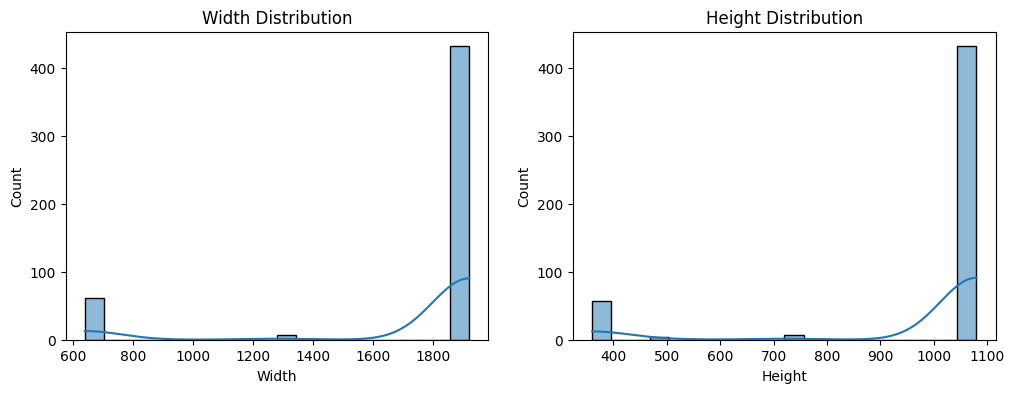

In [ ]:
# 2️⃣ Image Size, Aspect Ratio, and Orientation

widths, heights, aspects = [], [], []

for img_path in random.sample(all_images, min(500, len(all_images))):  # sample for speed
    img = Image.open(img_path)
    w, h = img.size
    widths.append(w)
    heights.append(h)
    aspects.append(round(w/h, 2))

df_dims = pd.DataFrame({'Width': widths, 'Height': heights, 'Aspect_Ratio': aspects})
print(df_dims.describe())

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df_dims['Width'], bins=20, kde=True)
plt.title("Width Distribution")

plt.subplot(1,2,2)
sns.histplot(df_dims['Height'], bins=20, kde=True)
plt.title("Height Distribution")
plt.show()


Inference:

The dataset shows consistent image dimensions: mean width ≈ 1779 px, mean height ≈ 1000 px, and a fixed aspect ratio (≈1.78).

The sizes cluster around standard 1920×1080 resolution (Full HD), indicating standardized capture conditions.

Required Preprocessing:

Resize all images to a fixed input size (e.g., 224×224 or 512×512 for CNNs).

Standardize aspect ratio if future captures differ (padding or cropping).

Normalize pixel values to or [-1,1].​

Optionally apply orientation correction if any metadata shows rotation variance.

       Brightness    Contrast
count  500.000000  500.000000
mean    38.771728   46.504051
std     14.000048    8.447035
min     10.962813   26.039958
25%     29.503998   41.925645
50%     38.783780   46.354908
75%     45.968344   51.611670
max    109.390408   70.169809


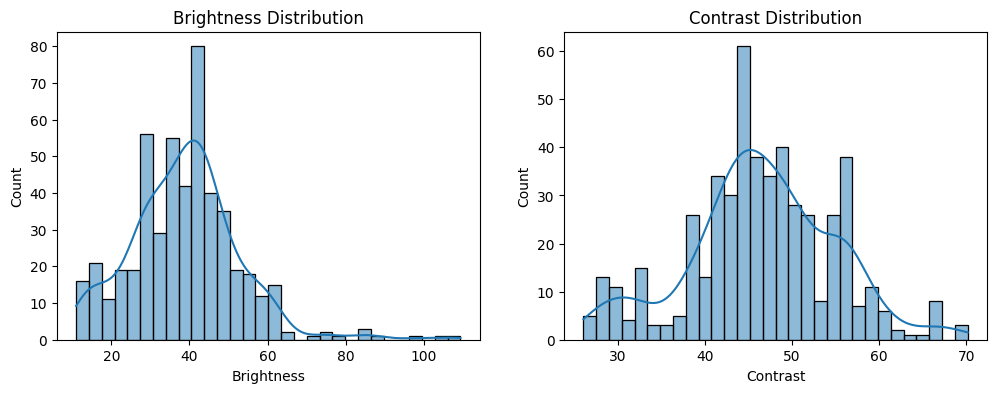

In [ ]:
# 3️⃣ Brightness & Contrast Distribution

brightness, contrast = [], []

for img_path in random.sample(all_images, min(500, len(all_images))):
    gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    brightness.append(np.mean(gray))
    contrast.append(np.std(gray))

df_bc = pd.DataFrame({'Brightness': brightness, 'Contrast': contrast})
print(df_bc.describe())

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df_bc['Brightness'], bins=30, kde=True)
plt.title("Brightness Distribution")

plt.subplot(1,2,2)
sns.histplot(df_bc['Contrast'], bins=30, kde=True)
plt.title("Contrast Distribution")
plt.show()


        Sharpness
count  500.000000
mean   113.074007
std    156.553847
min      5.352377
25%     18.567482
50%     44.479099
75%    136.894607
max    715.800614


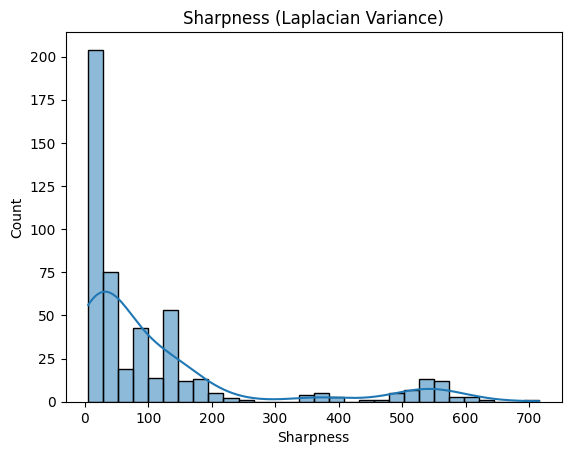

⚠️ Frames below 12.73 may be blurry


In [ ]:
# 4️⃣ Sharpness (Blur Detection)

def variance_of_laplacian(image):
    return cv2.Laplacian(image, cv2.CV_64F).var()

sharpness = []
for img_path in random.sample(all_images, min(500, len(all_images))):
    gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    sharpness.append(variance_of_laplacian(gray))

df_sharp = pd.DataFrame({'Sharpness': sharpness})
print(df_sharp.describe())

sns.histplot(df_sharp['Sharpness'], bins=30, kde=True)
plt.title("Sharpness (Laplacian Variance)")
plt.show()

threshold = np.percentile(sharpness, 10)
print(f"⚠️ Frames below {threshold:.2f} may be blurry")


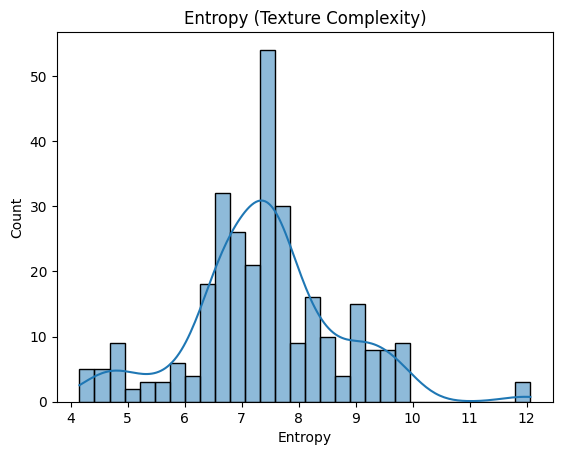

In [ ]:
# 5️⃣ Noise / Texture (Entropy Measure)

from skimage.measure import shannon_entropy
from skimage.io import imread

entropy_vals = []
for img_path in random.sample(all_images, min(300, len(all_images))):
    img = imread(img_path, as_gray=True)
    entropy_vals.append(shannon_entropy(img))

df_ent = pd.DataFrame({'Entropy': entropy_vals})
sns.histplot(df_ent['Entropy'], bins=30, kde=True)
plt.title("Entropy (Texture Complexity)")
plt.show()


Inference:

The entropy histogram (Shannon’s entropy) quantifies texture complexity. High-entropy regions correspond to rich follicular details; low-entropy indicates smooth or simple backgrounds.

The entropy values show spread across the range, implying heterogeneous image quality due to varying ultrasound gain and contrast levels.

Required Preprocessing:

Apply adaptive histogram equalization to normalize intensity contrast.

Optionally use bilateral filtering or Non-Local Means denoising to suppress ultrasound speckle while preserving edges.

Normalize local entropy distribution to balance image texture dynamics before feature extraction.

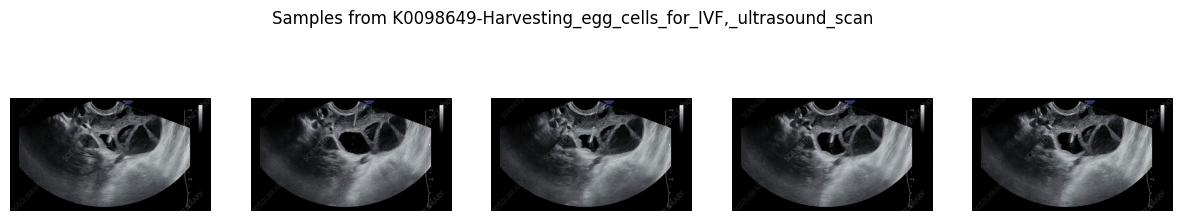

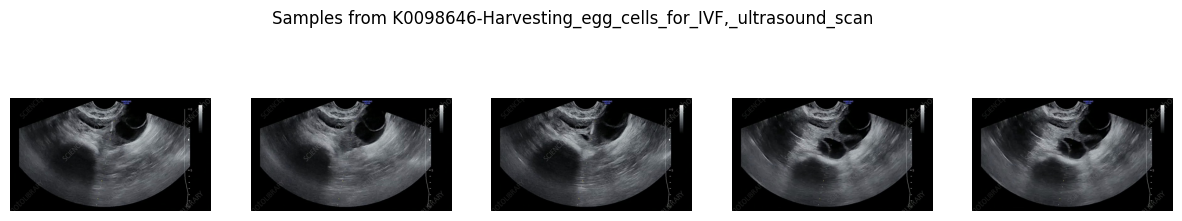

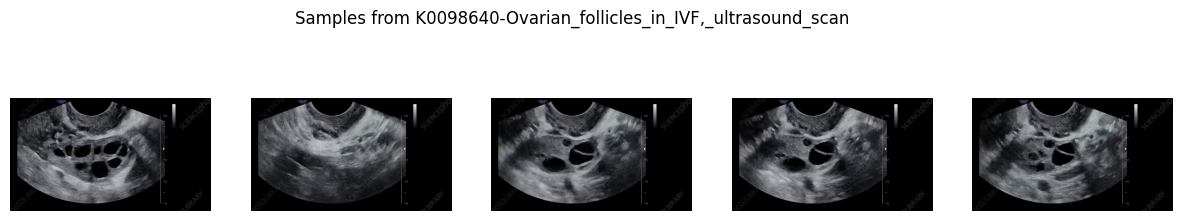

In [ ]:
# 6️⃣ Visual Sampling & Consistency

sample_folders = random.sample(os.listdir(frames_root), min(3, len(os.listdir(frames_root))))

for folder in sample_folders:
    sample_imgs = random.sample(glob(os.path.join(frames_root, folder, '*.jpg')), 5)
    plt.figure(figsize=(15,3))
    for i, path in enumerate(sample_imgs):
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1,5,i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(f"Samples from {folder}")
    plt.show()


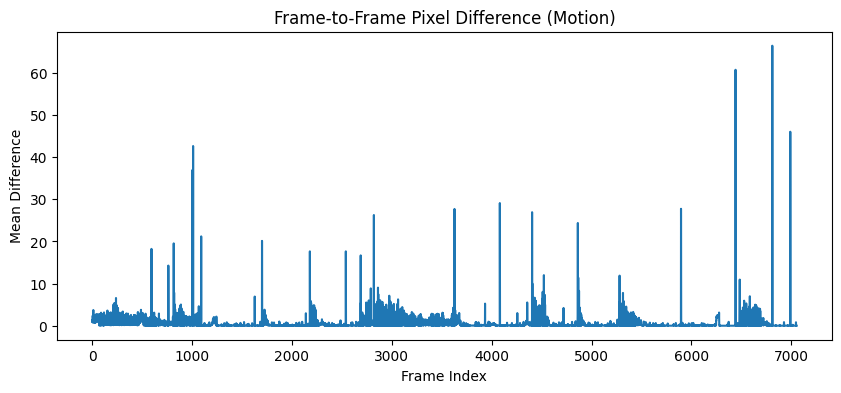

In [ ]:
# 7️⃣ Frame-to-Frame Change (Motion / Redundancy)

motion_vals = []

for folder in random.sample(os.listdir(frames_root), 2):  # just a couple of videos
    paths = sorted(glob(os.path.join(frames_root, folder, '*.jpg')))
    prev = None
    for path in paths:
        gray = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if prev is not None:
            diff = cv2.absdiff(prev, gray)
            motion_vals.append(np.mean(diff))
        prev = gray

plt.figure(figsize=(10,4))
plt.plot(motion_vals)
plt.title("Frame-to-Frame Pixel Difference (Motion)")
plt.xlabel("Frame Index")
plt.ylabel("Mean Difference")
plt.show()


In [ ]:
# 8️⃣ Statistical Summary

summary = {
    'Avg Width': np.mean(widths),
    'Avg Height': np.mean(heights),
    'Avg Brightness': np.mean(brightness),
    'Avg Contrast': np.mean(contrast),
    'Avg Sharpness': np.mean(sharpness),
    'Avg Entropy': np.mean(entropy_vals)
}
pd.DataFrame([summary])


Avg Width  Avg Height  Avg Brightness  Avg Contrast  Avg Sharpness  \
0    1754.88      988.08       38.771728     46.504051     113.074007   

   Avg Entropy  
0     7.401427

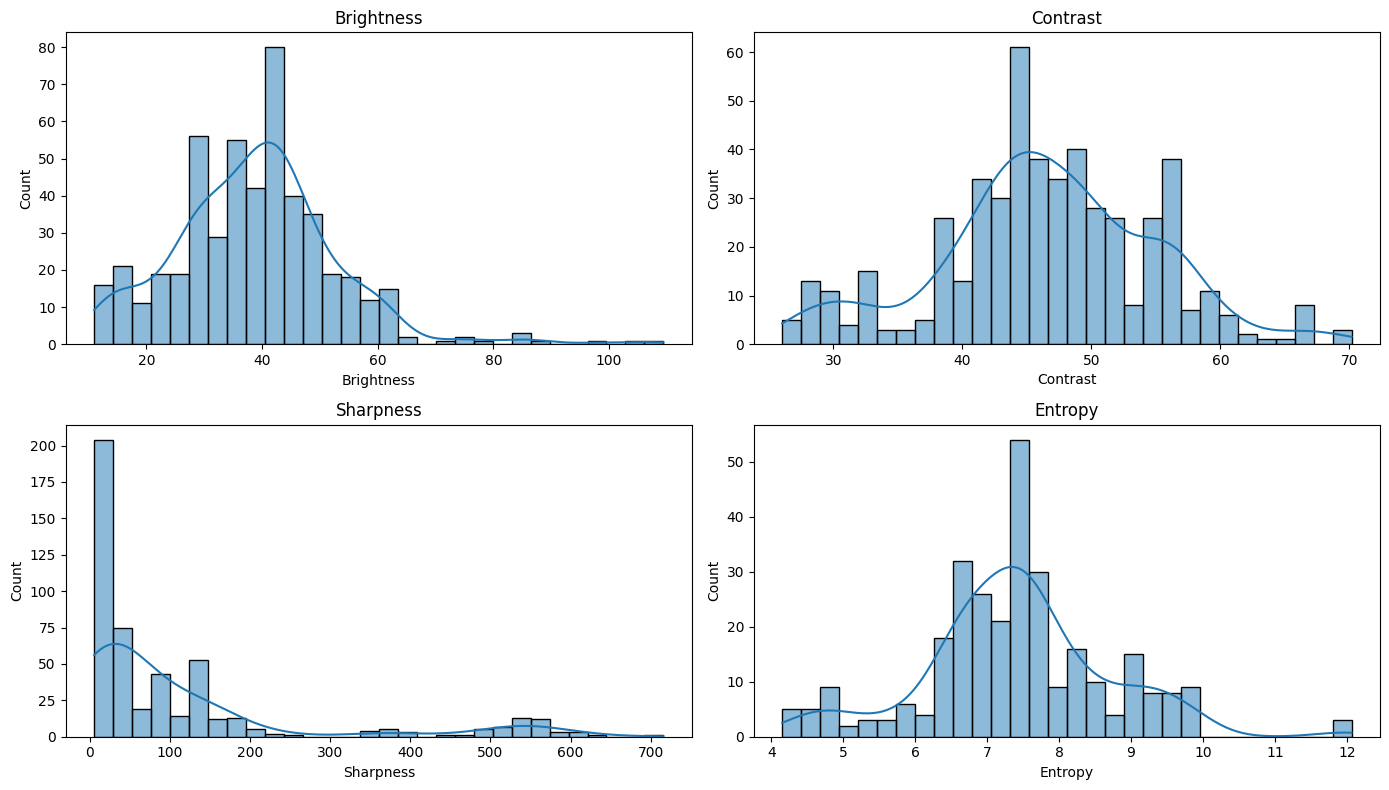

In [ ]:
# 9️⃣ Visual Insights Dashboard (Optional Combined Plot)

plt.figure(figsize=(14,8))
plt.subplot(2,2,1); sns.histplot(df_bc['Brightness'], bins=30, kde=True); plt.title("Brightness")
plt.subplot(2,2,2); sns.histplot(df_bc['Contrast'], bins=30, kde=True); plt.title("Contrast")
plt.subplot(2,2,3); sns.histplot(df_sharp['Sharpness'], bins=30, kde=True); plt.title("Sharpness")
plt.subplot(2,2,4); sns.histplot(df_ent['Entropy'], bins=30, kde=True); plt.title("Entropy")
plt.tight_layout()
plt.show()


Image Quality and Noise Variability
Inference:

Some images include visible ultrasound artifacts or annotation overlays.

Variances in brightness/contrast indicate cross-device variability in the scan acquisition settings.

Required Preprocessing:

Mask or crop out non-informative regions like labels or annotations.

Apply brightness normalization (e.g., CLAHE).

Standardize color channel (convert to grayscale if not already, as ultrasound images are monochrome in diagnostic contexts).

Image size distribution : Uniform 1920×1080 resolution ; Resize and normalize aspect ratio/pixels
Frame count : Variable frame lengths; blurry low-quality frames exist ; Drop blurry frames, uniform sampling
Texture entropy : Mixed contrast and noise levels ; Denoise, equalize, enhance contrast
Brightness/artifacts : Device variation, overlay text ; Crop, brightness normalization, masking

These inferences confirm that the dataset is structurally consistent but visually variant. The recommended preprocessing pipeline includes deblurring, denoising, normalization, cropping, resizing, and contrast enhancement, ensuring reproducibility and robustness for deep learning applications like follicle segmentation or health classification.

In [ ]:
# PREPROCESSING

In [ ]:
# --- IMPORTS ---
import os
import cv2
import numpy as np
from glob import glob
from tqdm import tqdm
from skimage.measure import shannon_entropy

In [ ]:
# --- PATHS ---
input_root = '/content/drive/MyDrive/Extracted Frames'
output_root = '/content/drive/MyDrive/Processed Frames 2'
os.makedirs(output_root, exist_ok=True)

In [ ]:
# --- PARAMETERS ---
resize_dim = (512, 512)         # or (224,224) for smaller models
blur_threshold = 12.8           # from your EDA inference
frames_per_video = 30           # uniform sampling
denoise_strength = 10           # tune if needed
normalize_range = (-1, 1)       # pixel normalization range

In [ ]:
# --- HELPER FUNCTIONS ---

def variance_of_laplacian(image):
    """Compute blur metric"""
    return cv2.Laplacian(image, cv2.CV_64F).var()

def preprocess_image(img):
    """Perform preprocessing on a single image"""

    # 1️⃣ Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 2️⃣ Denoise (bilateral filter to preserve edges)
    gray = cv2.bilateralFilter(gray, d=5, sigmaColor=75, sigmaSpace=75)

    # 3️⃣ Contrast normalization (CLAHE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gray = clahe.apply(gray)

    # 4️⃣ Resize
    gray = cv2.resize(gray, resize_dim)

    # 5️⃣ Normalize pixel values
    gray = gray.astype(np.float32) / 255.0
    if normalize_range == (-1, 1):
        gray = 2 * gray - 1

    return gray

def entropy_filter(img_gray):
    """Compute Shannon entropy"""
    hist, _ = np.histogram(img_gray, bins=256, range=(0, 255), density=True)
    hist = hist[hist > 0]
    return -np.sum(hist * np.log2(hist))

In [ ]:
# --- MAIN PIPELINE ---
for folder in sorted(os.listdir(input_root)):
    folder_path = os.path.join(input_root, folder)
    if not os.path.isdir(folder_path):
        continue

    output_folder = os.path.join(output_root, folder)
    os.makedirs(output_folder, exist_ok=True)

    image_paths = sorted(glob(os.path.join(folder_path, '*.jpg')))

    # Optional: sample limited frames per video
    if len(image_paths) > frames_per_video:
        idxs = np.linspace(0, len(image_paths)-1, frames_per_video).astype(int)
        image_paths = [image_paths[i] for i in idxs]

    print(f"Processing {folder} ({len(image_paths)} frames)...")

    for img_path in tqdm(image_paths):
        img = cv2.imread(img_path)
        if img is None:
            continue

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        sharpness = variance_of_laplacian(gray)
        entropy_val = entropy_filter(gray)

        #  Remove blurry / low-entropy frames
        if sharpness < blur_threshold or entropy_val < 3.0:
            continue

        processed = preprocess_image(img)

        # Save processed image
        save_path = os.path.join(output_folder, os.path.basename(img_path))
        cv2.imwrite(save_path, ((processed + 1) * 127.5).astype(np.uint8))  # revert to [0,255] for saving

Processing 14th Day Follicular Scan (30 frames)...


100%|██████████| 30/30 [00:07<00:00,  3.89it/s]


Processing Chances of Conceiving with Large Follicles ! Ovulation Ultrasound for Follicle Monitoring (30 frames)...


100%|██████████| 30/30 [00:06<00:00,  4.61it/s]


Processing Good Quality - Healthy Follicles - 14th day TVS Ultrasound - Why Patient Fails to Conceive (30 frames)...


100%|██████████| 30/30 [00:04<00:00,  7.48it/s]


Processing K0098639-Harvesting_egg_cells_for_IVF,_ultrasound_scan (30 frames)...


100%|██████████| 30/30 [00:03<00:00,  8.40it/s]


Processing K0098640-Ovarian_follicles_in_IVF,_ultrasound_scan (30 frames)...


100%|██████████| 30/30 [00:01<00:00, 20.30it/s]


Processing K0098641-Harvesting_egg_cells_for_IVF,_ultrasound_scan (30 frames)...


100%|██████████| 30/30 [00:03<00:00,  7.98it/s]


Processing K0098642-Harvesting_egg_cells_for_IVF,_ultrasound_scan (30 frames)...


100%|██████████| 30/30 [00:03<00:00,  7.89it/s]


Processing K0098643-Harvesting_egg_cells_for_IVF,_ultrasound_scan (30 frames)...


100%|██████████| 30/30 [00:02<00:00, 11.54it/s]


Processing K0098644-Harvesting_egg_cells_for_IVF,_ultrasound_scan (30 frames)...


100%|██████████| 30/30 [00:02<00:00, 12.53it/s]


Processing K0098645-Ovarian_follicles_in_IVF,_ultrasound_scan (30 frames)...


100%|██████████| 30/30 [00:02<00:00, 10.59it/s]


Processing K0098646-Harvesting_egg_cells_for_IVF,_ultrasound_scan (30 frames)...


100%|██████████| 30/30 [00:03<00:00,  7.53it/s]


Processing K0098647-Harvesting_egg_cells_for_IVF,_ultrasound_scan (30 frames)...


100%|██████████| 30/30 [00:03<00:00,  8.57it/s]


Processing K0098648-Ovarian_follicles_in_IVF,_ultrasound_scan (30 frames)...


100%|██████████| 30/30 [00:02<00:00, 14.04it/s]


Processing K0098649-Harvesting_egg_cells_for_IVF,_ultrasound_scan (30 frames)...


100%|██████████| 30/30 [00:02<00:00, 11.21it/s]


Processing K0098650-Harvesting_egg_cells_for_IVF,_ultrasound_scan (30 frames)...


100%|██████████| 30/30 [00:03<00:00,  8.35it/s]


Processing Medicine Induced Bilateral Dominant Follicles TVS _ Primary Infirtility _ what is Male Factor (online-video-cutter.com) (2) (30 frames)...


100%|██████████| 30/30 [00:07<00:00,  4.09it/s]


Processing Ovarian hyperstimulation syndrome (OHSS) (30 frames)...


100%|██████████| 30/30 [00:04<00:00,  7.07it/s]


Processing Possibilities of Pregnancy with Endometriosis _ Dominant Follicle _ Infertility (30 frames)...


100%|██████████| 30/30 [00:04<00:00,  6.28it/s]


Processing TVS Ultrasound Dominent Follicular Study , 14 Day Follicular monitoring , What is GOOD Follicle (30 frames)...


100%|██████████| 30/30 [00:03<00:00,  8.39it/s]


Processing ULTRASOUND FOLLICLE MONITORING _ TEJASHREE PATEKAR _ DOPPLER IN FOLLICLE RUPTURE _ UTERINE ARTERY PI (30 frames)...


100%|██████████| 30/30 [00:06<00:00,  4.97it/s]


Processing what-is-large-ovarian-follicle-is-it-good-to-conceive-tvs-ultrasound_FGtJH4Wr (30 frames)...


100%|██████████| 30/30 [00:05<00:00,  5.80it/s]


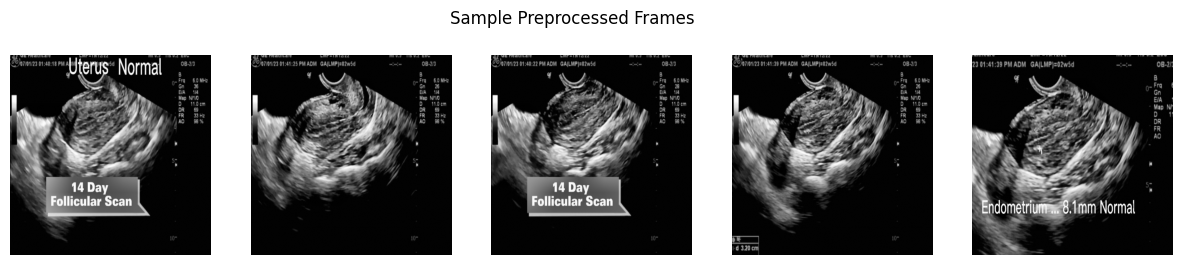

In [ ]:
# Verify Results

import matplotlib.pyplot as plt
import random

sample_folder = os.path.join(output_root, random.choice(os.listdir(output_root)))
sample_imgs = random.sample(glob(os.path.join(sample_folder, '*.jpg')), 5)

plt.figure(figsize=(15,3))
for i, path in enumerate(sample_imgs):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    plt.subplot(1,5,i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.suptitle("Sample Preprocessed Frames")
plt.show()


In [ ]:
# Confirm Normalization

img = cv2.imread(sample_imgs[0], cv2.IMREAD_GRAYSCALE).astype(np.float32)
img = (img / 127.5) - 1
print("Min:", img.min(), "Max:", img.max())


Min: -1.0 Max: 1.0


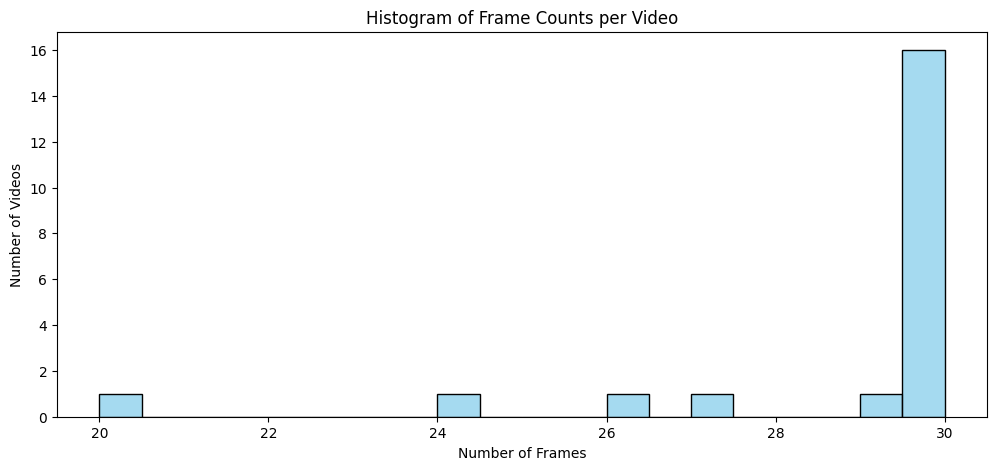

14th Day Follicular Scan: 27 frames
Chances of Conceiving with Large Follicles ! Ovulation Ultrasound for Follicle Monitoring: 30 frames
Good Quality - Healthy Follicles - 14th day TVS Ultrasound - Why Patient Fails to Conceive: 29 frames
K0098639-Harvesting_egg_cells_for_IVF,_ultrasound_scan: 30 frames
K0098640-Ovarian_follicles_in_IVF,_ultrasound_scan: 30 frames
K0098641-Harvesting_egg_cells_for_IVF,_ultrasound_scan: 30 frames
K0098642-Harvesting_egg_cells_for_IVF,_ultrasound_scan: 30 frames
K0098643-Harvesting_egg_cells_for_IVF,_ultrasound_scan: 30 frames
K0098644-Harvesting_egg_cells_for_IVF,_ultrasound_scan: 30 frames
K0098645-Ovarian_follicles_in_IVF,_ultrasound_scan: 30 frames
K0098646-Harvesting_egg_cells_for_IVF,_ultrasound_scan: 30 frames
K0098647-Harvesting_egg_cells_for_IVF,_ultrasound_scan: 30 frames
K0098648-Ovarian_follicles_in_IVF,_ultrasound_scan: 30 frames
K0098649-Harvesting_egg_cells_for_IVF,_ultrasound_scan: 30 frames
K0098650-Harvesting_egg_cells_for_IVF,_ultrasou

In [ ]:
# Count Frames and Plot Histogram

import os
import matplotlib.pyplot as plt
import seaborn as sns

# Path to processed frames
processed_root = '/content/drive/MyDrive/Processed Frames 2'

# Dictionary to store frame counts
frame_counts = {}

# Loop through each video folder
for folder in os.listdir(processed_root):
    folder_path = os.path.join(processed_root, folder)
    if os.path.isdir(folder_path):
        count = len([f for f in os.listdir(folder_path) if f.endswith('.jpg')])
        frame_counts[folder] = count

# --- Convert to lists for plotting ---
videos = list(frame_counts.keys())
counts = list(frame_counts.values())

# --- Plot histogram ---
plt.figure(figsize=(12,5))
sns.histplot(counts, bins=20, kde=False, color='skyblue')
plt.title("Histogram of Frame Counts per Video")
plt.xlabel("Number of Frames")
plt.ylabel("Number of Videos")
plt.show()

# Optional: Print frame counts
for v, c in frame_counts.items():
    print(f"{v}: {c} frames")


In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 119.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [ ]:
# Import and download dataset from Roboflow
from roboflow import Roboflow

# Initialize Roboflow with your API key
rf = Roboflow(api_key="AYYnXsPBxmKDVysxtFFK")

# Connect to your project and version
project = rf.workspace("my-place-9urbr").project("follicle-instance-segmentation-abjms")
version = project.version(9)

# Step 4: Define target path in your Google Drive
drive_dataset_path = "/content/drive/MyDrive/follicle_yolo_project/data"

# Step 5: Download the dataset in YOLOv8 format directly into Drive
dataset = version.download("yolov8", location=drive_dataset_path)

print(f"✅ Dataset downloaded to: {drive_dataset_path}")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/drive/MyDrive/follicle_yolo_project/data in yolov8:: 100%|██████████| 2051/2051 [00:23<00:00, 87.52it/s] 


✅ Dataset downloaded to: /content/drive/MyDrive/follicle_yolo_project/data


In [ ]:
# Define paths and check data
import os
from glob import glob

base_dir = "/content/drive/MyDrive/follicle_yolo_project/data"
images_dir = os.path.join(base_dir, "train", "images")  # Roboflow usually uses 'train' for all data

print("✅ Checking dataset files...")
print("Number of images:", len(glob(os.path.join(images_dir, "*.jpg"))))


✅ Checking dataset files...
Number of images: 1023


In [ ]:
# =====================================================
# 📦 Split Dataset into Training and Validation (No Test)
# =====================================================
import os
import random
import shutil
from glob import glob
from tqdm import tqdm

# --- Paths ---
DATASET_ROOT = "/content/drive/MyDrive/follicle_yolo_project/data/train"  # original dataset
OUTPUT_ROOT = "/content/drive/MyDrive/follicle_yolo_project/split_dataset"  # output directory

os.makedirs(OUTPUT_ROOT, exist_ok=True)

# --- Collect all image paths ---
all_images = glob(os.path.join(DATASET_ROOT, "images", "*.jpg"))
random.shuffle(all_images)

# --- Split Ratios ---
train_split = 0.8  # 80% train
val_split = 0.2    # 20% validation

# --- Compute split sizes ---
n_total = len(all_images)
n_train = int(train_split * n_total)
n_val = n_total - n_train

# --- Assign splits ---
splits = {
    "train": all_images[:n_train],
    "val": all_images[n_train:]
}

# --- Copy images and corresponding labels ---
for split, files in splits.items():
    for sub in ["images", "labels"]:
        os.makedirs(os.path.join(OUTPUT_ROOT, split, sub), exist_ok=True)

    for img_path in tqdm(files, desc=f"Copying {split}"):
        label_path = img_path.replace("images", "labels").replace(".jpg", ".txt")
        if os.path.exists(label_path):
            shutil.copy(img_path, os.path.join(OUTPUT_ROOT, split, "images"))
            shutil.copy(label_path, os.path.join(OUTPUT_ROOT, split, "labels"))

print("\n✅ Dataset split complete!")
print(f"📁 Training images: {len(splits['train'])}")
print(f"📁 Validation images: {len(splits['val'])}")
print("📂 Files saved to:", OUTPUT_ROOT)


Copying val: 100%|██████████| 205/205 [00:04<00:00, 43.00it/s]


✅ Dataset split complete!
📁 Training images: 818
📁 Validation images: 205
📂 Files saved to: /content/drive/MyDrive/follicle_yolo_project/split_dataset


In [ ]:
# =====================================================
# 🧾 Create YAML Files for YOLOv8 Training & Validation
# =====================================================
import os
import yaml

# --- Paths ---
yaml_base = "/content/drive/MyDrive/follicle_yolo_project/split_dataset"
save_dir = "/content/drive/MyDrive/follicle_yolo_project/yamls"
os.makedirs(save_dir, exist_ok=True)

# --- Dataset info ---
num_classes = 2
class_names = ["immature_follicle", "mature_follicle"]

# --- Main YAML (used for training) ---
dataset_yaml = {
    "path": yaml_base,
    "train": f"{yaml_base}/train/images",
    "val": f"{yaml_base}/val/images",
    "nc": num_classes,
    "names": class_names
}

yaml_path_main = f"{save_dir}/train_val_dataset.yaml"
with open(yaml_path_main, "w") as f:
    yaml.dump(dataset_yaml, f, sort_keys=False)

print(f"✅ Main Training YAML created at: {yaml_path_main}")

# --- Optional: validation-only YAML (for later evaluation) ---
val_only_yaml = {
    "path": yaml_base,
    "val": f"{yaml_base}/val/images",
    "nc": num_classes,
    "names": class_names
}

yaml_path_val = f"{save_dir}/val_only_dataset.yaml"
with open(yaml_path_val, "w") as f:
    yaml.dump(val_only_yaml, f, sort_keys=False)

print(f"✅ Validation-only YAML created at: {yaml_path_val}")


✅ Main Training YAML created at: /content/drive/MyDrive/follicle_yolo_project/yamls/train_val_dataset.yaml
✅ Validation-only YAML created at: /content/drive/MyDrive/follicle_yolo_project/yamls/val_only_dataset.yaml


In [ ]:
# Verify the split and YAMLs
!find /content/drive/MyDrive/follicle_yolo_project/split_dataset -type f | wc -l


2046


In [1]:
# install YOLOv8 (Ultralytics)
!pip install ultralytics==8.3.225 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.9 MB/s eta 0:00:00


In [ ]:
# =====================================================
# 🚀 YOLOv8n Instance Segmentation Training (Follicles)
# =====================================================
from ultralytics import YOLO
import os

# --- Paths ---
train_yaml = "/content/drive/MyDrive/follicle_yolo_project/yamls/train_val_dataset.yaml"
save_dir = "/content/drive/MyDrive/follicle_yolo_project/results/train"
os.makedirs(save_dir, exist_ok=True)

# --- Load YOLOv8 segmentation model ---
# Options:
#   yolov8n-seg.pt  → small & fast
#   yolov8m-seg.pt  → balanced accuracy/speed
#   yolov8l-seg.pt  → most accurate, slower
model = YOLO("yolov8n-seg.pt")

# --- Start Training ---
results = model.train(
    data=train_yaml,                   # YAML path (train + val)
    epochs=50,                         # number of training epochs
    imgsz=640,                         # image size
    batch=8,                           # batch size (adjust if VRAM is low)
    lr0=1e-3,                          # learning rate
    patience=10,                       # early stopping patience
    project=save_dir,                  # results directory
    name="follicle_segmentation_train",# experiment name
    device=0,                          # use GPU (set 'cpu' if no GPU)
    workers=2,                         # number of data loader workers
    verbose=True                       # show training logs
)

print("\n✅ Training complete! Results saved in:", save_dir)


Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/follicle_yolo_project/yamls/train_val_dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=follicle_segmentation_train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto,

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,454 parameters, 0 gradients, 11.3 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 5.4±0.5 MB/s, size: 14.4 KB)
val: Scanning /content/drive/MyDrive/follicle_yolo_project/split_dataset/train/labels.cache... 818 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 818/818 1.2Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 52/52 2.2it/s 23.2s
                   all        818       2821      0.974       0.98      0.993      0.856      0.973       0.98      0.993      0.813
     immature_follicle        818       2821      0.974       0.98      0.993      0.856      0.973       0.98      0.993      0.813
Speed: 1.4m

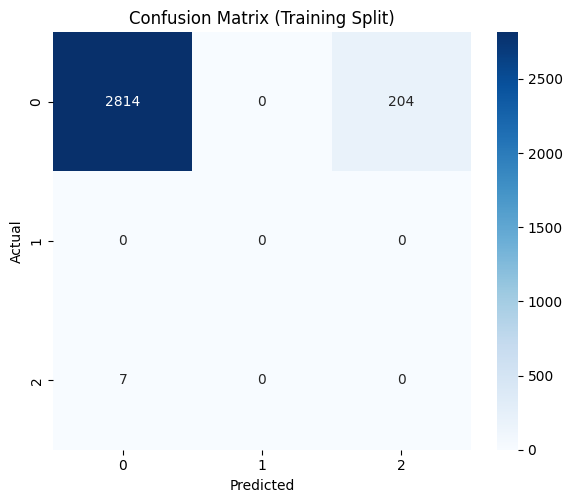

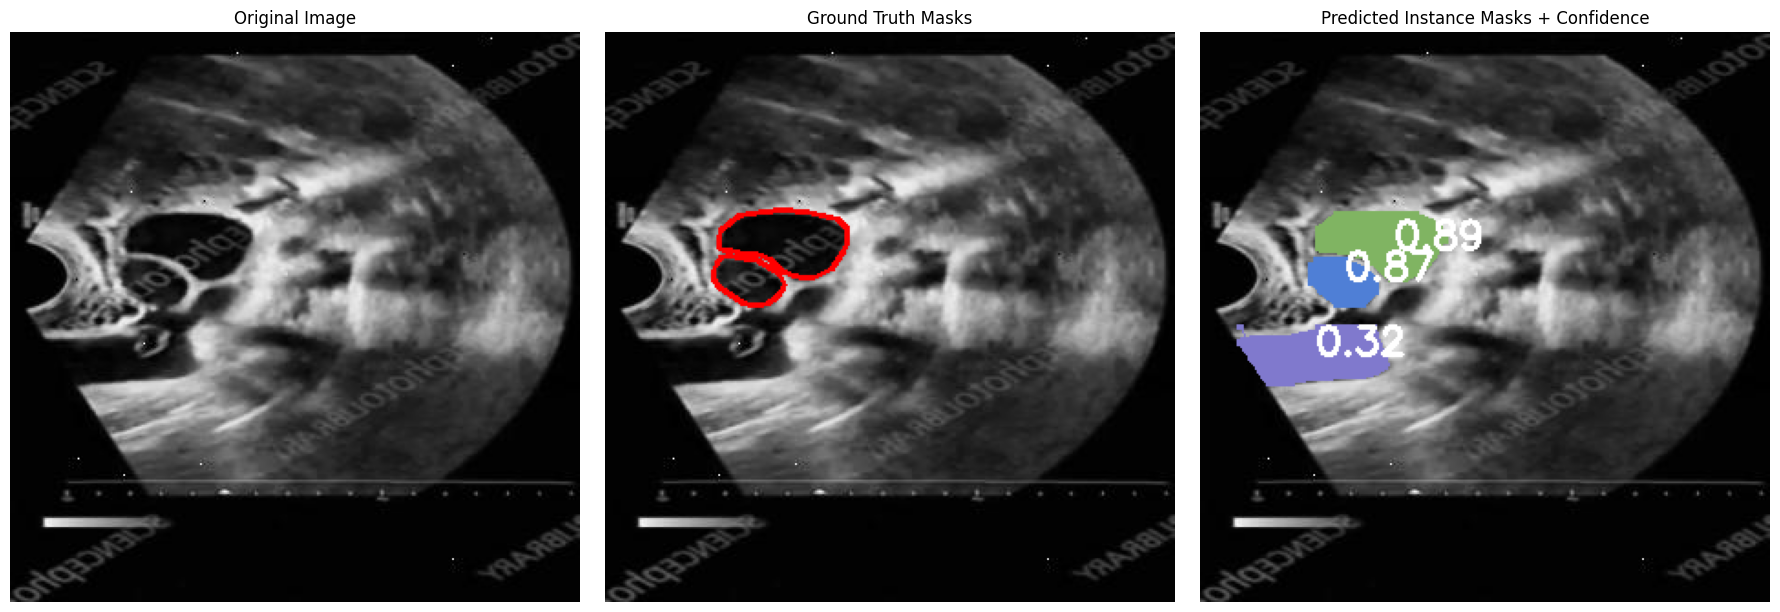


✅ DataFrame saved to: /content/drive/MyDrive/follicle_yolo_project/results/train_evaluation_fixed/train_follicle_analysis_mask_area.csv

📄 First 10 rows (train):
                                            frame_id  num_follicles  \
0  frame_0000092_jpg.rf.74fe05a035be082a6713cf3ba...              3   
1  frame_00001_jpg.rf.6ee1dcdde24785ab903a62470be...              1   
2  frame_00001_jpg.rf.ca5429d8265e0ed96e4cdcb5738...              1   
3  frame_00002_jpg.rf.c75aed1ce2df7ee925be5ab6424...              2   
4  frame_0000342_jpg.rf.cf5b9bb8087722792f0efc8ed...              3   
5  frame_0000342_jpg.rf.d033e3fc1990b9f827fefcf30...              3   
6  frame_0000342_jpg.rf.e3a7f8cc04b18f3caaa1988df...              4   
7  frame_000042_jpg.rf.357a531ae7984987606cdee28b...             11   
8  frame_000042_jpg.rf.ad1c0124beac69b6133c91f2dd...             11   
9  frame_0000836_jpg.rf.263792c105503369762154e68...              3   

   num_mature  num_immature  largest_follicle_mm  ready

In [ ]:
# =======================================================
# ✅ Final: Train-split Evaluation — Accuracy from confusion matrix + Mask-area based follicle sizes
# =======================================================
from ultralytics import YOLO
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import random
import math

# --- Mount Google Drive ---
drive.mount('/content/drive')

# --- Paths (adjust if different) ---
model_path = "/content/drive/MyDrive/follicle_yolo_project/results/train/follicle_segmentation_train3/weights/best.pt"
train_images_path = "/content/drive/MyDrive/follicle_yolo_project/split_dataset/train/images"
train_labels_path = "/content/drive/MyDrive/follicle_yolo_project/split_dataset/train/labels"
train_yaml = "/content/drive/MyDrive/follicle_yolo_project/yamls/train_val_dataset.yaml"
save_dir = "/content/drive/MyDrive/follicle_yolo_project/results/train_evaluation_fixed"
os.makedirs(save_dir, exist_ok=True)

# --- Load model ---
model = YOLO(model_path)

# --------------------------
# 1) Run validation (train split) to get metrics + confusion matrix
# --------------------------
results = model.val(data=train_yaml, split="train", save_json=True)
metrics = results.results_dict

# standard metrics (from YOLO output)
precision = metrics.get("metrics/precision(B)", 0)
recall = metrics.get("metrics/recall(B)", 0)
f1 = 2 * ((precision * recall) / (precision + recall + 1e-8))
map50 = metrics.get("metrics/mAP50(B)", 0)
map95 = metrics.get("metrics/mAP50-95(B)", 0)

# confusion matrix (if available)
conf_matrix = results.confusion_matrix.matrix if hasattr(results, "confusion_matrix") else None

# --- Accuracy strictly from confusion matrix ---
if conf_matrix is not None and conf_matrix.sum() > 0:
    accuracy_cm = np.trace(conf_matrix) / conf_matrix.sum()
else:
    accuracy_cm = 0.0

print("\n📊 Evaluation Metrics (Training Split - reported by YOLO):")
print(f"Precision (YOLO): {precision:.4f}")
print(f"Recall (YOLO):    {recall:.4f}")
print(f"F1 (derived):     {f1:.4f}")
print(f"mAP@50:           {map50:.4f}")
print(f"mAP@50-95:        {map95:.4f}")
print(f"\n✅ Accuracy (FROM CONFUSION MATRIX only): {accuracy_cm:.4f}")

# --- plot confusion matrix (if present)
if conf_matrix is not None:
    plt.figure(figsize=(6,5))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="Blues", square=True)
    plt.title("Confusion Matrix (Training Split)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, "confusion_matrix_train.png"))
    plt.show()

# --------------------------
# 2) Helper: pixel->mm calibration
# --------------------------
# IMPORTANT: set this to the correct conversion for your ultrasound images.
# Example: if 1 pixel == 0.10 mm -> PIXEL_TO_MM = 0.10
# If you have a visible scale bar or knowledge (e.g. 100 px = 10 mm) compute it:
# PIXEL_TO_MM = known_mm / measured_pixels
PIXEL_TO_MM = 0.10  # <<-- ADJUST THIS to your calibration!

# Optional: small helper to estimate PIXEL_TO_MM if your image contains a scale bar you know:
def estimate_pixel_to_mm_from_scale(sample_image_path, measured_pixels_for_known_mm=100, known_mm=10):
    # You must measure 'measured_pixels_for_known_mm' manually or implement automatic detection.
    return known_mm / measured_pixels_for_known_mm

# --------------------------
# 3) Visualize one sample: Original | Ground truth contours (if present) | Predicted masks + confidences
# --------------------------
def random_color():
    return tuple(np.random.randint(40, 220, 3).tolist())  # avoid too-dark or too-bright

sample_img = random.choice([f for f in os.listdir(train_images_path) if f.lower().endswith(('.jpg','.png','.jpeg'))])
sample_path = os.path.join(train_images_path, sample_img)
label_path = os.path.join(train_labels_path, os.path.splitext(sample_img)[0] + ".txt")

orig_bgr = cv2.imread(sample_path)
orig_img = cv2.cvtColor(orig_bgr, cv2.COLOR_BGR2RGB)

# ground truth overlay (draw polygons stored in YOLO segmentation txt format: class x1 y1 x2 y2 ... OR polygon coords)
gt_img = orig_img.copy()
if os.path.exists(label_path):
    with open(label_path, 'r') as lf:
        for line in lf:
            parts = line.strip().split()
            if len(parts) >= 3:
                # skip class id, take the rest as polygon coords (this works if labels have polygon coords)
                coords = np.array(parts[1:], dtype=float)
                if coords.size >= 4:
                    coords = coords.reshape(-1, 2)
                    h, w = gt_img.shape[:2]
                    coords[:,0] *= w
                    coords[:,1] *= h
                    pts = coords.astype(np.int32)
                    cv2.polylines(gt_img, [pts], isClosed=True, color=(255,0,0), thickness=2)

# predictions
pred = model.predict(sample_path, conf=0.25, verbose=False)[0]

pred_img = orig_img.copy()
if getattr(pred, "masks", None) is not None and len(pred.masks.xy):
    # iterate predicted masks (polygons) and confidences
    confs = pred.boxes.conf.cpu().numpy() if pred.boxes is not None else []
    for i, poly in enumerate(pred.masks.xy):
        pts = np.array(poly, dtype=np.int32)
        color = random_color()
        cv2.fillPoly(pred_img, [pts], color)
        cx, cy = int(np.mean(pts[:,0])), int(np.mean(pts[:,1]))
        conf_text = f"{confs[i]:.2f}" if i < len(confs) else "0.00"
        cv2.putText(pred_img, conf_text, (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2)
else:
    # fallback: draw bounding boxes + conf
    if pred.boxes is not None and len(pred.boxes):
        boxes_xyxy = pred.boxes.xyxy.cpu().numpy()
        confs = pred.boxes.conf.cpu().numpy()
        for (x1,y1,x2,y2), c in zip(boxes_xyxy, confs):
            x1, y1, x2, y2 = map(int, [x1,y1,x2,y2])
            cv2.rectangle(pred_img, (x1,y1), (x2,y2), (0,255,0), 2)
            cv2.putText(pred_img, f"{c:.2f}", (x1, y1-6), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,0), 2)

# Show triple figure
fig, axs = plt.subplots(1,3, figsize=(18,6))
axs[0].imshow(orig_img); axs[0].set_title("Original Image"); axs[0].axis("off")
axs[1].imshow(gt_img); axs[1].set_title("Ground Truth Masks"); axs[1].axis("off")
axs[2].imshow(pred_img); axs[2].set_title("Predicted Instance Masks + Confidence"); axs[2].axis("off")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "sample_instance_comparison.png"))
plt.show()

# --------------------------
# 4) Build follicle-by-frame dataframe using MASK AREA -> diameter -> mm
# --------------------------
records = []
for f in sorted(os.listdir(train_images_path)):
    if not f.lower().endswith(('.jpg','.png','.jpeg')):
        continue
    img_path = os.path.join(train_images_path, f)
    pred = model.predict(img_path, conf=0.25, verbose=False)[0]

    # prepare lists
    sizes_mm = []
    confs = []

    # Prefer mask polygons (area by contour). If not available, fallback to bbox width (xywh[:,2])
    if getattr(pred, "masks", None) is not None and len(pred.masks.xy):
        for poly, c in zip(pred.masks.xy, (pred.boxes.conf.cpu().numpy() if pred.boxes is not None else [])):
            pts = np.array(poly, dtype=np.int32)
            area_px = abs(cv2.contourArea(pts))  # pixel area of mask polygon
            if area_px <= 0:
                continue
            # equivalent circular diameter in pixels: d = 2 * sqrt(area/pi)
            diam_px = 2.0 * math.sqrt(area_px / math.pi)
            diam_mm = diam_px * PIXEL_TO_MM
            sizes_mm.append(diam_mm)
            confs.append(float(c))
    else:
        # fallback to boxes
        boxes = pred.boxes.xywh.cpu().numpy() if pred.boxes is not None else np.empty((0,4))
        conf_arr = pred.boxes.conf.cpu().numpy() if pred.boxes is not None else np.empty((0,))
        for b, c in zip(boxes, conf_arr):
            w_px = b[2]
            diam_mm = (w_px * PIXEL_TO_MM)  # approximate
            sizes_mm.append(diam_mm)
            confs.append(float(c))

    num_follicles = len(sizes_mm)
    largest = max(sizes_mm) if sizes_mm else 0.0
    num_mature = int(sum(18.0 <= s <= 22.0 for s in sizes_mm))
    num_immature = int(sum(s < 18.0 for s in sizes_mm))
    ready_for_retrieval = int(largest >= 18.0)
    highest_conf = float(max(confs)) if confs else 0.0

    records.append({
        "frame_id": f,
        "num_follicles": num_follicles,
        "num_mature": num_mature,
        "num_immature": num_immature,
        "largest_follicle_mm": round(float(largest), 2),
        "ready_for_retrieval": ready_for_retrieval,
        "highest_confidence": round(float(highest_conf), 3)
    })

df_train = pd.DataFrame(records)
csv_path = os.path.join(save_dir, "train_follicle_analysis_mask_area.csv")
df_train.to_csv(csv_path, index=False)

print(f"\n✅ DataFrame saved to: {csv_path}")
print("\n📄 First 10 rows (train):")
print(df_train.head(10))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,454 parameters, 0 gradients, 11.3 GFLOPs
val: Fast image access ✅ (ping: 5.2±10.7 ms, read: 4.6±2.9 MB/s, size: 14.9 KB)
val: Scanning /content/drive/MyDrive/follicle_yolo_project/split_dataset/val/labels.cache... 205 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 205/205 199.7Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 13/13 1.3it/s 9.8s
                   all        205        725      0.943      0.934      0.978      0.791       0.94      0.931      0.977      0.765
     immature_follicle        205        725      0.943      0.934      0.978      0.791       0.94      0.931      0.977      0.765
Speed: 3.6m

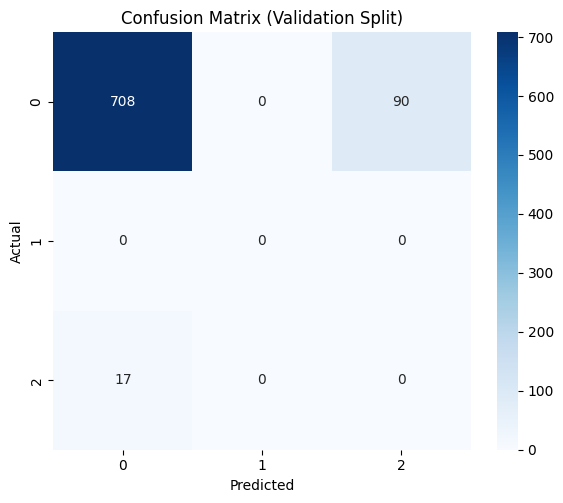

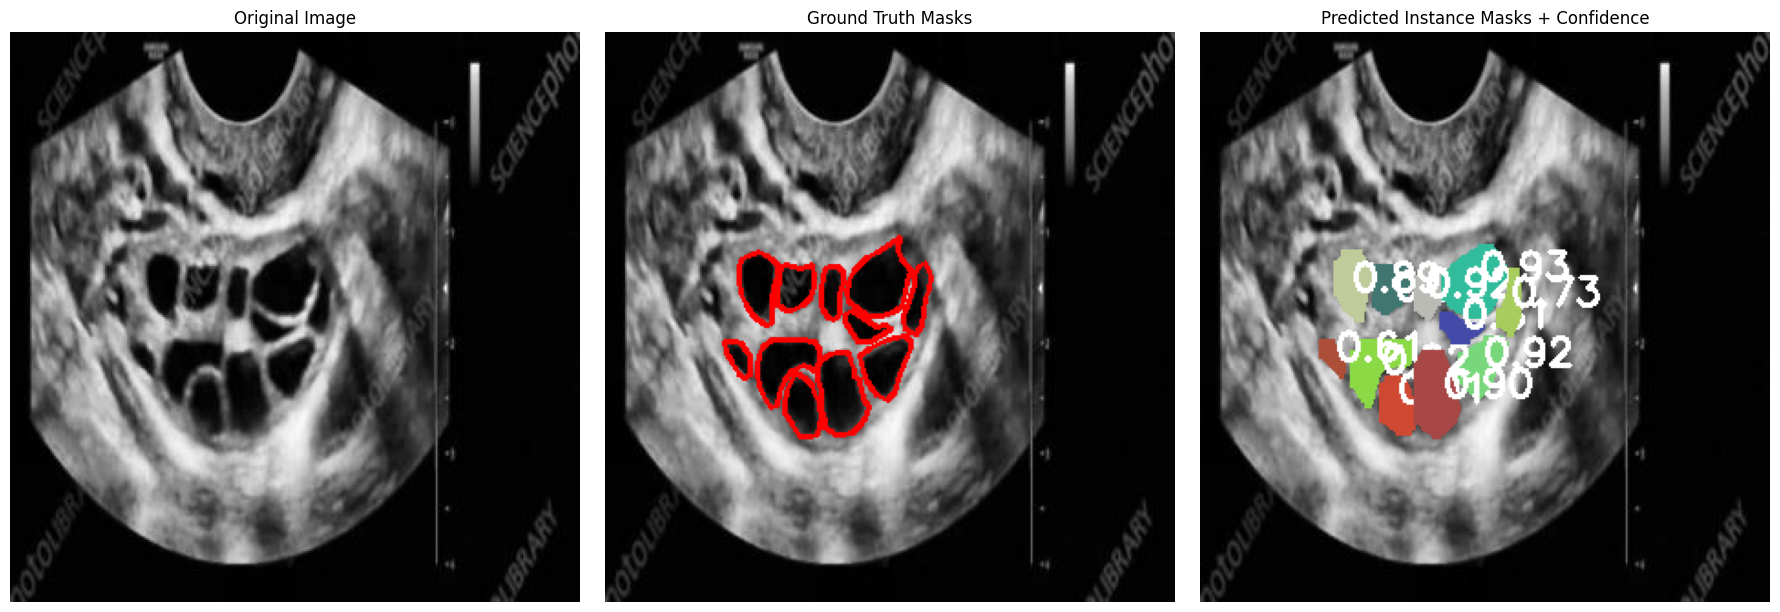


✅ Validation DataFrame saved to: /content/drive/MyDrive/follicle_yolo_project/results/val_evaluation_fixed/val_follicle_analysis_mask_area.csv

📄 First 10 rows (validation):
                                            frame_id  num_follicles  \
0  frame_0000092_jpg.rf.347e25ef9f541ffdd06fff09a...              3   
1  frame_0000092_jpg.rf.a5d76da84cb5729864a050e5b...              3   
2  frame_00001_jpg.rf.904ff2c65f374d0632d219d89ab...              1   
3  frame_00002_jpg.rf.0ebfd9cf9f7b811461547e00c01...              2   
4  frame_00002_jpg.rf.ded70bc8a585b1354d366d462b1...              2   
5  frame_00003_jpg.rf.1bbd56a4622abd9f33a0cb63b27...              4   
6  frame_00003_jpg.rf.64d5f1d58a128638e949d22a4fc...              4   
7  frame_00003_jpg.rf.e1ba8f9e4fd5fa88654c2fdbade...              4   
8  frame_000042_jpg.rf.ccd0ffb021c3c99e9557256f56...             11   
9  frame_0000836_jpg.rf.5ee936b8129323b8b762078db...              2   

   num_mature  num_immature  largest_follic

In [ ]:
# =======================================================
# ✅ Final: Validation-split Evaluation — Accuracy from confusion matrix + Mask-area based follicle sizes
# =======================================================
from ultralytics import YOLO
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import random
import math

# --- Mount Google Drive ---
drive.mount('/content/drive')

# --- Paths (update to your validation dataset) ---
model_path = "/content/drive/MyDrive/follicle_yolo_project/results/train/follicle_segmentation_train3/weights/best.pt"
val_images_path = "/content/drive/MyDrive/follicle_yolo_project/split_dataset/val/images"
val_labels_path = "/content/drive/MyDrive/follicle_yolo_project/split_dataset/val/labels"
val_yaml = "/content/drive/MyDrive/follicle_yolo_project/yamls/train_val_dataset.yaml"
save_dir = "/content/drive/MyDrive/follicle_yolo_project/results/val_evaluation_fixed"
os.makedirs(save_dir, exist_ok=True)

# --- Load model ---
model = YOLO(model_path)

# --------------------------
# 1) Run validation (val split) to get metrics + confusion matrix
# --------------------------
results = model.val(data=val_yaml, split="val", save_json=True)
metrics = results.results_dict

# --- YOLO-reported metrics ---
precision = metrics.get("metrics/precision(B)", 0)
recall = metrics.get("metrics/recall(B)", 0)
f1 = 2 * ((precision * recall) / (precision + recall + 1e-8))
map50 = metrics.get("metrics/mAP50(B)", 0)
map95 = metrics.get("metrics/mAP50-95(B)", 0)

# --- Confusion matrix ---
conf_matrix = results.confusion_matrix.matrix if hasattr(results, "confusion_matrix") else None

# --- Accuracy strictly from confusion matrix ---
if conf_matrix is not None and conf_matrix.sum() > 0:
    accuracy_cm = np.trace(conf_matrix) / conf_matrix.sum()
else:
    accuracy_cm = 0.0

print("\n📊 Evaluation Metrics (Validation Split):")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"mAP@50: {map50:.4f}")
print(f"mAP@50–95: {map95:.4f}")
print(f"\n✅ Accuracy (FROM CONFUSION MATRIX only): {accuracy_cm:.4f}")

# --- Confusion Matrix Plot ---
if conf_matrix is not None:
    plt.figure(figsize=(6,5))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="Blues", square=True)
    plt.title("Confusion Matrix (Validation Split)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, "confusion_matrix_val.png"))
    plt.show()

# --------------------------
# 2) Set calibration for ultrasound scale
# --------------------------
# ⚠️ Adjust this value to match your imaging scale
# Example: if 100 pixels = 10 mm → PIXEL_TO_MM = 0.10
PIXEL_TO_MM = 0.10

# --------------------------
# 3) Visualize one sample: Original | Ground Truth | Predicted
# --------------------------
def random_color():
    return tuple(np.random.randint(40, 220, 3).tolist())

sample_img = random.choice([f for f in os.listdir(val_images_path) if f.lower().endswith(('.jpg','.png','.jpeg'))])
sample_path = os.path.join(val_images_path, sample_img)
label_path = os.path.join(val_labels_path, os.path.splitext(sample_img)[0] + ".txt")

orig_bgr = cv2.imread(sample_path)
orig_img = cv2.cvtColor(orig_bgr, cv2.COLOR_BGR2RGB)

# Ground truth overlay
gt_img = orig_img.copy()
if os.path.exists(label_path):
    with open(label_path, 'r') as lf:
        for line in lf:
            parts = line.strip().split()
            if len(parts) >= 3:
                coords = np.array(parts[1:], dtype=float)
                if coords.size >= 4:
                    coords = coords.reshape(-1, 2)
                    h, w = gt_img.shape[:2]
                    coords[:,0] *= w
                    coords[:,1] *= h
                    pts = coords.astype(np.int32)
                    cv2.polylines(gt_img, [pts], isClosed=True, color=(255,0,0), thickness=2)

# Predictions
pred = model.predict(sample_path, conf=0.25, verbose=False)[0]
pred_img = orig_img.copy()
if getattr(pred, "masks", None) is not None and len(pred.masks.xy):
    confs = pred.boxes.conf.cpu().numpy() if pred.boxes is not None else []
    for i, poly in enumerate(pred.masks.xy):
        pts = np.array(poly, dtype=np.int32)
        color = random_color()
        cv2.fillPoly(pred_img, [pts], color)
        cx, cy = int(np.mean(pts[:,0])), int(np.mean(pts[:,1]))
        conf_text = f"{confs[i]:.2f}" if i < len(confs) else "0.00"
        cv2.putText(pred_img, conf_text, (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2)
else:
    if pred.boxes is not None and len(pred.boxes):
        boxes_xyxy = pred.boxes.xyxy.cpu().numpy()
        confs = pred.boxes.conf.cpu().numpy()
        for (x1,y1,x2,y2), c in zip(boxes_xyxy, confs):
            x1, y1, x2, y2 = map(int, [x1,y1,x2,y2])
            cv2.rectangle(pred_img, (x1,y1), (x2,y2), (0,255,0), 2)
            cv2.putText(pred_img, f"{c:.2f}", (x1, y1-6), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,0), 2)

# Show visualization
fig, axs = plt.subplots(1,3, figsize=(18,6))
axs[0].imshow(orig_img); axs[0].set_title("Original Image"); axs[0].axis("off")
axs[1].imshow(gt_img); axs[1].set_title("Ground Truth Masks"); axs[1].axis("off")
axs[2].imshow(pred_img); axs[2].set_title("Predicted Instance Masks + Confidence"); axs[2].axis("off")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "sample_instance_comparison_val.png"))
plt.show()

# --------------------------
# 4) Build follicle metrics dataframe using mask area → mm
# --------------------------
records = []
for f in sorted(os.listdir(val_images_path)):
    if not f.lower().endswith(('.jpg','.png','.jpeg')):
        continue
    img_path = os.path.join(val_images_path, f)
    pred = model.predict(img_path, conf=0.25, verbose=False)[0]

    sizes_mm = []
    confs = []

    if getattr(pred, "masks", None) is not None and len(pred.masks.xy):
        for poly, c in zip(pred.masks.xy, (pred.boxes.conf.cpu().numpy() if pred.boxes is not None else [])):
            pts = np.array(poly, dtype=np.int32)
            area_px = abs(cv2.contourArea(pts))
            if area_px <= 0:
                continue
            diam_px = 2.0 * math.sqrt(area_px / math.pi)
            diam_mm = diam_px * PIXEL_TO_MM
            sizes_mm.append(diam_mm)
            confs.append(float(c))
    else:
        boxes = pred.boxes.xywh.cpu().numpy() if pred.boxes is not None else np.empty((0,4))
        conf_arr = pred.boxes.conf.cpu().numpy() if pred.boxes is not None else np.empty((0,))
        for b, c in zip(boxes, conf_arr):
            w_px = b[2]
            diam_mm = (w_px * PIXEL_TO_MM)
            sizes_mm.append(diam_mm)
            confs.append(float(c))

    num_follicles = len(sizes_mm)
    largest = max(sizes_mm) if sizes_mm else 0.0
    num_mature = int(sum(18.0 <= s <= 22.0 for s in sizes_mm))
    num_immature = int(sum(s < 18.0 for s in sizes_mm))
    ready_for_retrieval = int(largest >= 18.0)
    highest_conf = float(max(confs)) if confs else 0.0

    records.append({
        "frame_id": f,
        "num_follicles": num_follicles,
        "num_mature": num_mature,
        "num_immature": num_immature,
        "largest_follicle_mm": round(float(largest), 2),
        "ready_for_retrieval": ready_for_retrieval,
        "highest_confidence": round(float(highest_conf), 3)
    })

df_val = pd.DataFrame(records)
csv_path = os.path.join(save_dir, "val_follicle_analysis_mask_area.csv")
df_val.to_csv(csv_path, index=False)

print(f"\n✅ Validation DataFrame saved to: {csv_path}")
print("\n📄 First 10 rows (validation):")
print(df_val.head(10))


✅ Image found: /content/drive/MyDrive/frame_2042.jpg

✅ Follicle Analysis Result:
frame_id: frame_2042.jpg
num_follicles: 3
num_mature: 0
num_immature: 3
largest_follicle_mm: 9.23
ready_for_retrieval: 0
highest_confidence: 0.936


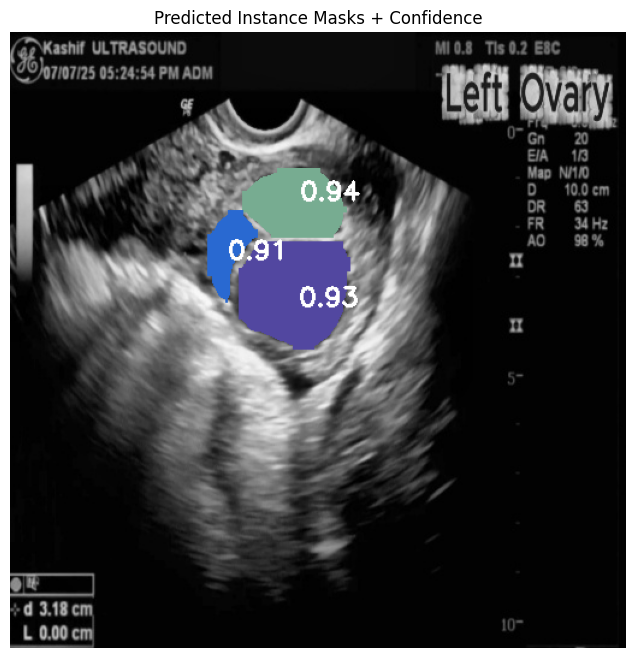

In [ ]:
# =======================================================
# 🩺 YOLOv8 Follicle Inference on Single Input Image
# =======================================================
from ultralytics import YOLO
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import os

# --- Load trained model ---
model_path = "/content/drive/MyDrive/follicle_yolo_project/results/train/follicle_segmentation_train3/weights/best.pt"
model = YOLO(model_path)

# --- Hardcoded image path (✅ no more input() issues) ---
img_path = "/content/drive/MyDrive/frame_2042.jpg"

if not os.path.exists(img_path):
    raise FileNotFoundError(f"⚠️ Image not found: {img_path}")
else:
    print(f"✅ Image found: {img_path}")

# --- Parameters ---
PIXEL_TO_MM = 0.10  # adjust for your ultrasound calibration (example: 100 px = 10 mm)

# --- Read and predict ---
orig_bgr = cv2.imread(img_path)
orig_rgb = cv2.cvtColor(orig_bgr, cv2.COLOR_BGR2RGB)
f = os.path.basename(img_path)

pred = model.predict(img_path, conf=0.25, verbose=False)[0]

# --- Draw predictions with instance masks + confidence ---
pred_img = orig_rgb.copy()
sizes_mm = []   # ✅ fixed initialization
confs = []      # ✅ fixed initialization

def random_color():
    return tuple(np.random.randint(40, 220, 3).tolist())

if getattr(pred, "masks", None) is not None and len(pred.masks.xy):
    for i, poly in enumerate(pred.masks.xy):
        pts = np.array(poly, dtype=np.int32)
        color = random_color()
        cv2.fillPoly(pred_img, [pts], color)

        # Confidence text
        conf_val = float(pred.boxes.conf[i]) if pred.boxes is not None else 0.0
        cx, cy = int(np.mean(pts[:, 0])), int(np.mean(pts[:, 1]))
        cv2.putText(pred_img, f"{conf_val:.2f}", (cx, cy),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

        # Diameter estimation from mask area
        area_px = abs(cv2.contourArea(pts))
        if area_px > 0:
            diam_px = 2.0 * math.sqrt(area_px / math.pi)
            diam_mm = diam_px * PIXEL_TO_MM
            sizes_mm.append(diam_mm)
            confs.append(conf_val)
else:
    if pred.boxes is not None and len(pred.boxes):
        for (x1, y1, x2, y2), c in zip(pred.boxes.xyxy.cpu().numpy(), pred.boxes.conf.cpu().numpy()):
            x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
            cv2.rectangle(pred_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(pred_img, f"{c:.2f}", (x1, y1 - 6),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 0), 2)
            w_px = x2 - x1
            diam_mm = w_px * PIXEL_TO_MM
            sizes_mm.append(diam_mm)
            confs.append(float(c))

# --- Follicle statistics ---
num_follicles = len(sizes_mm)
largest = max(sizes_mm) if sizes_mm else 0.0
num_mature = int(sum(18.0 <= s <= 22.0 for s in sizes_mm))
num_immature = int(sum(s < 18.0 for s in sizes_mm))
ready_for_retrieval = int(largest >= 18.0)
highest_conf = float(max(confs)) if confs else 0.0

# --- Print final metrics ---
result_record = {
    "frame_id": f,
    "num_follicles": num_follicles,
    "num_mature": num_mature,
    "num_immature": num_immature,
    "largest_follicle_mm": round(float(largest), 2),
    "ready_for_retrieval": ready_for_retrieval,
    "highest_confidence": round(float(highest_conf), 3)
}

print("\n✅ Follicle Analysis Result:")
for k, v in result_record.items():
    print(f"{k}: {v}")

# --- Show image with masks + confidence ---
plt.figure(figsize=(10, 8))
plt.imshow(pred_img)
plt.title("Predicted Instance Masks + Confidence")
plt.axis("off")
plt.show()


In [ ]:
!find /content/drive/MyDrive/follicle_yolo_project/results -name "best.pt"


/content/drive/MyDrive/follicle_yolo_project/results/train/follicle_segmentation_train/weights/best.pt


In [ ]:
# ============================================================
# 🧠 STABLE YOLOv8 Hyperparameter Tuning (Anti-Overfitting)
# ============================================================
import os
import pandas as pd
from ultralytics import YOLO
from google.colab import drive

# --- Mount Drive ---
drive.mount('/content/drive')

# --- Paths ---
base_dir = "/content/drive/MyDrive/follicle_yolo_project"
train_yaml = f"{base_dir}/yamls/train_val_dataset.yaml"
results_dir = f"{base_dir}/results/hyperparameter_tuning_v3"
os.makedirs(results_dir, exist_ok=True)

# --- Validate dataset paths ---
assert os.path.exists(train_yaml), f"⚠️ train_dataset.yaml not found: {train_yaml}"
print(f"✅ Using dataset config: {train_yaml}")

# --- Load model ---
model = YOLO("yolov8s-seg.pt")

# =======================================================
# Step 1️⃣: Safe Hyperparameter Search Space
# =======================================================
hyperparams = {
    "lr0": (1e-5, 5e-3),
    "lrf": (0.05, 0.2),
    "momentum": (0.88, 0.97),
    "weight_decay": (0.001, 0.01),

    "box": (4.0, 8.0),
    "cls": (0.2, 0.8),
    "dfl": (0.5, 1.5),

    # ✅ Safer augmentation ranges
    "hsv_h": (0.015, 0.06),
    "hsv_s": (0.5, 0.85),
    "hsv_v": (0.3, 0.6),
    "degrees": (-10.0, 10.0),
    "translate": (0.05, 0.12),
    "scale": (0.7, 1.3),
    "shear": (-8.0, 8.0),
    "fliplr": (0.1, 0.6),

    # 🔥 Controlled dropout to prevent degenerate runs
    "dropout": (0.05, 0.25),
}

# --- Directories ---
best_model_dir = f"{results_dir}/best_model"
os.makedirs(best_model_dir, exist_ok=True)

# =======================================================
# Step 2️⃣: Robust Tuning with Fallback Protection
# =======================================================
print("🚀 Starting safe and robust hyperparameter tuning ⏳")

try:
    model.tune(
        data=train_yaml,
        epochs=20,
        iterations=20,          # limited for stability
        optimizer="AdamW",
        patience=5,
        batch=16,
        imgsz=640,
        project=results_dir,
        name="safe_tuning",
        space=hyperparams,
        plots=True,
    )
except Exception as e:
    print(f"⚠️ Tuning interrupted due to error: {e}")
    print("🔁 You can safely re-run this cell to resume tuning.")

# =======================================================
# Step 3️⃣: Locate Best Hyperparameters
# =======================================================
best_yaml_path = os.path.join(results_dir, "safe_tuning", "hyp_evolve.yaml")
if os.path.exists(best_yaml_path):
    print(f"✅ Best hyperparameters saved at: {best_yaml_path}")
else:
    print("⚠️ Could not find tuned hyperparameter file (may need rerun).")

# =======================================================
# Step 4️⃣: Evaluation Template
# =======================================================
eval_metrics = {
    "Metric": ["Precision", "Recall", "F1-Score", "Accuracy", "mAP@50", "mAP@50-95"],
    "Value": [None, None, None, None, None, None]
}
df_eval = pd.DataFrame(eval_metrics)
metrics_csv = f"{results_dir}/evaluation_metrics_template.csv"
df_eval.to_csv(metrics_csv, index=False)
print(f"✅ Evaluation Metrics Template saved at: {metrics_csv}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Using dataset config: /content/drive/MyDrive/follicle_yolo_project/yamls/train_val_dataset.yaml
🚀 Starting safe and robust hyperparameter tuning ⏳
Tuner: Initialized Tuner instance with 'tune_dir=/content/drive/MyDrive/follicle_yolo_project/results/hyperparameter_tuning_v3/safe_tuning3'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/20 with hyperparameters: {'lr0': 0.005, 'lrf': 0.05, 'momentum': 0.937, 'weight_decay': 0.001, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.7, 'shear': 0.0, 'fliplr': 0.5, 'dropout': 0.05}
Saved /content/drive/MyDrive/follicle_yolo_project/results/hyperparameter_tuning_v3/safe_tuning3/tune_scatter_plots.png
Saved /content/drive/MyDrive/follicle_yolo_project/results/hyperparameter_t

In [ ]:
# ===============================================================
# 🧠 YOLOv8 Follicle Segmentation — Anti-Overfitting Final Model
# ===============================================================
from ultralytics import YOLO
import os
from google.colab import drive

# --- Mount Drive ---
drive.mount('/content/drive')

# --- Paths ---
BASE_DIR = "/content/drive/MyDrive/follicle_yolo_project"
DATA_YAML = f"{BASE_DIR}/yamls/train_val_dataset.yaml"
RESULTS_DIR = f"{BASE_DIR}/results/final_model_training_stable"
os.makedirs(RESULTS_DIR, exist_ok=True)

# --- Initialize Model (segmentation) ---
# You can change to yolov8m-seg.pt if GPU memory allows (more accurate)
model = YOLO("yolov8s-seg.pt")

# ===============================================================
# ⚙️ Hyperparameters (from tuned + anti-overfit improvements)
# ===============================================================
best_hparams = {
    "lr0": 0.0038,          # learning rate start
    "lrf": 0.05,            # learning rate final fraction
    "momentum": 0.92,
    "weight_decay": 0.001,  # strong regularization
    "box": 6.5,
    "cls": 0.5,
    "dfl": 1.5,
    "hsv_h": 0.02,
    "hsv_s": 0.7,
    "hsv_v": 0.4,
    "translate": 0.1,
    "scale": 0.75,
    "fliplr": 0.5,
    "dropout": 0.05
}

# ===============================================================
# 🚀 Train Model (Anti-Overfitting Configuration)
# ===============================================================
model.train(
    data=DATA_YAML,
    epochs=100,                 # balanced training duration
    patience=15,                # early stop if val loss stagnates
    batch=16,
    imgsz=640,

    # Optimizer + Learning Rate
    optimizer="AdamW",          # more stable than SGD
    lr0=best_hparams["lr0"],
    lrf=best_hparams["lrf"],
    momentum=best_hparams["momentum"],
    weight_decay=best_hparams["weight_decay"],
    cos_lr=True,                # cosine LR decay

    # Loss balance
    box=best_hparams["box"],
    cls=best_hparams["cls"],
    dfl=best_hparams["dfl"],

    # Regularization + Data Augmentation
    hsv_h=best_hparams["hsv_h"],
    hsv_s=best_hparams["hsv_s"],
    hsv_v=best_hparams["hsv_v"],
    translate=best_hparams["translate"],
    scale=best_hparams["scale"],
    fliplr=best_hparams["fliplr"],
    dropout=best_hparams["dropout"],
    mosaic=0.8,                 # mix 4 images, reduces memorization
    mixup=0.2,                  # blends two images (prevent overfit)
    copy_paste=0.3,             # paste objects from other images
    erasing=0.4,                # random erasing for texture variety

    # Training behavior
    close_mosaic=10,            # disable mosaic near end of training
    warmup_epochs=3,            # small warmup
    val=True,
    project=RESULTS_DIR,
    name="final_tuned_anti_overfit_v3",
    exist_ok=True,
    pretrained=True,
)

print("✅ Final anti-overfit model training started successfully!")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Mounted at /content/drive
Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=6.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.3, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/drive/MyDrive/follicle_yolo_project/yamls/train_val_dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.05, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Mounted at /content/drive
Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,374 parameters, 0 gradients, 39.9 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 0.0±0.0 MB/s, size: 14.0 KB)
val: Scanning /content/drive/MyDrive/follicle_yolo_project/split_dataset/train/labels.cache... 818 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 818/818 1.1Mit/s 0.0s
requirements: Ultralytics requirement ['faster-coco-eval>=1.6.7'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 0.5s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect

           

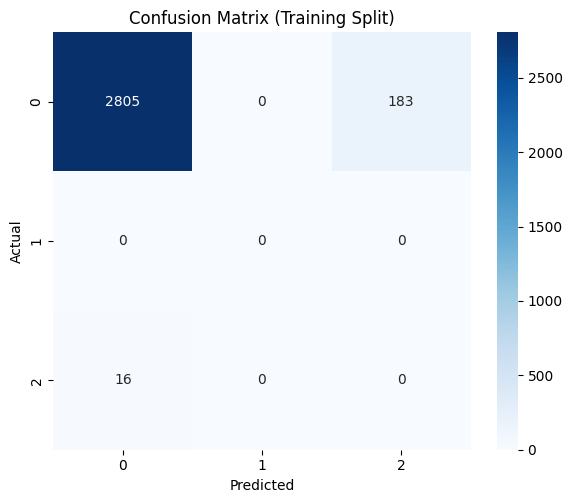

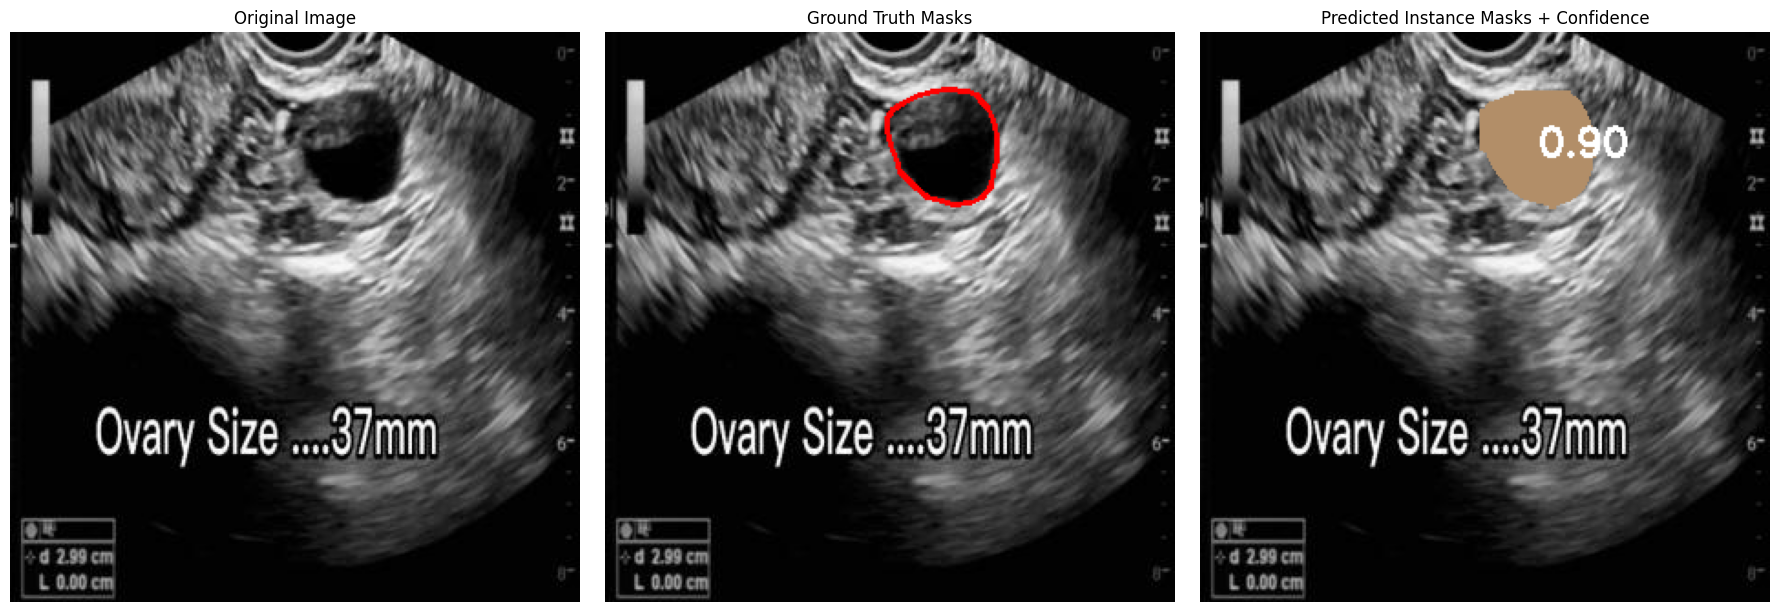


✅ DataFrame saved to: /content/drive/MyDrive/follicle_yolo_project/results/train_evaluation_final_model/train_follicle_analysis_mask_area.csv

📄 First 10 rows (train):
                                            frame_id  num_follicles  \
0  frame_0000092_jpg.rf.74fe05a035be082a6713cf3ba...              3   
1  frame_00001_jpg.rf.6ee1dcdde24785ab903a62470be...              1   
2  frame_00001_jpg.rf.ca5429d8265e0ed96e4cdcb5738...              1   
3  frame_00002_jpg.rf.c75aed1ce2df7ee925be5ab6424...              2   
4  frame_0000342_jpg.rf.cf5b9bb8087722792f0efc8ed...              3   
5  frame_0000342_jpg.rf.d033e3fc1990b9f827fefcf30...              4   
6  frame_0000342_jpg.rf.e3a7f8cc04b18f3caaa1988df...              2   
7  frame_000042_jpg.rf.357a531ae7984987606cdee28b...             11   
8  frame_000042_jpg.rf.ad1c0124beac69b6133c91f2dd...             11   
9  frame_0000836_jpg.rf.263792c105503369762154e68...              3   

   num_mature  num_immature  largest_follicle_mm 

In [2]:
# =======================================================
# ✅ Final: Train-split Evaluation — Accuracy from confusion matrix + Mask-area based follicle sizes
# =======================================================
from ultralytics import YOLO
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import random
import math

# --- Mount Google Drive ---
drive.mount('/content/drive')

# --- Paths (UPDATED for final anti-overfit model) ---
model_path = "/content/drive/MyDrive/follicle_yolo_project/results/final_model_training_stable/final_tuned_anti_overfit_v3/weights/best.pt"
train_images_path = "/content/drive/MyDrive/follicle_yolo_project/split_dataset/train/images"
train_labels_path = "/content/drive/MyDrive/follicle_yolo_project/split_dataset/train/labels"
train_yaml = "/content/drive/MyDrive/follicle_yolo_project/yamls/train_val_dataset.yaml"
save_dir = "/content/drive/MyDrive/follicle_yolo_project/results/train_evaluation_final_model"
os.makedirs(save_dir, exist_ok=True)

# --- Load trained model ---
model = YOLO(model_path)

# --------------------------
# 1) Run validation (train split) to get metrics + confusion matrix
# --------------------------
results = model.val(data=train_yaml, split="train", save_json=True)
metrics = results.results_dict

# Standard metrics (from YOLO output)
precision = metrics.get("metrics/precision(B)", 0)
recall = metrics.get("metrics/recall(B)", 0)
f1 = 2 * ((precision * recall) / (precision + recall + 1e-8))
map50 = metrics.get("metrics/mAP50(B)", 0)
map95 = metrics.get("metrics/mAP50-95(B)", 0)

# Confusion matrix (if available)
conf_matrix = results.confusion_matrix.matrix if hasattr(results, "confusion_matrix") else None

# --- Accuracy strictly from confusion matrix ---
if conf_matrix is not None and conf_matrix.sum() > 0:
    accuracy_cm = np.trace(conf_matrix) / conf_matrix.sum()
else:
    accuracy_cm = 0.0

print("\n📊 Evaluation Metrics (Training Split - reported by YOLO):")
print(f"Precision (YOLO): {precision:.4f}")
print(f"Recall (YOLO):    {recall:.4f}")
print(f"F1 (derived):     {f1:.4f}")
print(f"mAP@50:           {map50:.4f}")
print(f"mAP@50-95:        {map95:.4f}")
print(f"\n✅ Accuracy (FROM CONFUSION MATRIX only): {accuracy_cm:.4f}")

# --- Plot confusion matrix ---
if conf_matrix is not None:
    plt.figure(figsize=(6,5))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="Blues", square=True)
    plt.title("Confusion Matrix (Training Split)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, "confusion_matrix_train.png"))
    plt.show()

# --------------------------
# 2) Pixel-to-mm calibration
# --------------------------
PIXEL_TO_MM = 0.10  # adjust this if you have a known ultrasound calibration

# --------------------------
# 3) Visualize sample: Original | GT | Predicted Masks
# --------------------------
def random_color():
    return tuple(np.random.randint(40, 220, 3).tolist())

sample_img = random.choice([f for f in os.listdir(train_images_path) if f.lower().endswith(('.jpg','.png','.jpeg'))])
sample_path = os.path.join(train_images_path, sample_img)
label_path = os.path.join(train_labels_path, os.path.splitext(sample_img)[0] + ".txt")

orig_bgr = cv2.imread(sample_path)
orig_img = cv2.cvtColor(orig_bgr, cv2.COLOR_BGR2RGB)

# Ground truth overlay
gt_img = orig_img.copy()
if os.path.exists(label_path):
    with open(label_path, 'r') as lf:
        for line in lf:
            parts = line.strip().split()
            if len(parts) >= 3:
                coords = np.array(parts[1:], dtype=float)
                if coords.size >= 4:
                    coords = coords.reshape(-1, 2)
                    h, w = gt_img.shape[:2]
                    coords[:,0] *= w
                    coords[:,1] *= h
                    pts = coords.astype(np.int32)
                    cv2.polylines(gt_img, [pts], isClosed=True, color=(255,0,0), thickness=2)

# Predictions
pred = model.predict(sample_path, conf=0.25, verbose=False)[0]

pred_img = orig_img.copy()
if getattr(pred, "masks", None) is not None and len(pred.masks.xy):
    confs = pred.boxes.conf.cpu().numpy() if pred.boxes is not None else []
    for i, poly in enumerate(pred.masks.xy):
        pts = np.array(poly, dtype=np.int32)
        color = random_color()
        cv2.fillPoly(pred_img, [pts], color)
        cx, cy = int(np.mean(pts[:,0])), int(np.mean(pts[:,1]))
        conf_text = f"{confs[i]:.2f}" if i < len(confs) else "0.00"
        cv2.putText(pred_img, conf_text, (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2)
else:
    if pred.boxes is not None and len(pred.boxes):
        boxes_xyxy = pred.boxes.xyxy.cpu().numpy()
        confs = pred.boxes.conf.cpu().numpy()
        for (x1,y1,x2,y2), c in zip(boxes_xyxy, confs):
            x1, y1, x2, y2 = map(int, [x1,y1,x2,y2])
            cv2.rectangle(pred_img, (x1,y1), (x2,y2), (0,255,0), 2)
            cv2.putText(pred_img, f"{c:.2f}", (x1, y1-6), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,0), 2)

fig, axs = plt.subplots(1,3, figsize=(18,6))
axs[0].imshow(orig_img); axs[0].set_title("Original Image"); axs[0].axis("off")
axs[1].imshow(gt_img); axs[1].set_title("Ground Truth Masks"); axs[1].axis("off")
axs[2].imshow(pred_img); axs[2].set_title("Predicted Instance Masks + Confidence"); axs[2].axis("off")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "sample_instance_comparison.png"))
plt.show()

# --------------------------
# 4) Generate follicle size statistics (mask-based)
# --------------------------
records = []
for f in sorted(os.listdir(train_images_path)):
    if not f.lower().endswith(('.jpg','.png','.jpeg')):
        continue
    img_path = os.path.join(train_images_path, f)
    pred = model.predict(img_path, conf=0.25, verbose=False)[0]

    sizes_mm, confs = [], []
    if getattr(pred, "masks", None) is not None and len(pred.masks.xy):
        for poly, c in zip(pred.masks.xy, (pred.boxes.conf.cpu().numpy() if pred.boxes is not None else [])):
            pts = np.array(poly, dtype=np.int32)
            area_px = abs(cv2.contourArea(pts))
            if area_px <= 0:
                continue
            diam_px = 2.0 * math.sqrt(area_px / math.pi)
            diam_mm = diam_px * PIXEL_TO_MM
            sizes_mm.append(diam_mm)
            confs.append(float(c))
    else:
        boxes = pred.boxes.xywh.cpu().numpy() if pred.boxes is not None else np.empty((0,4))
        conf_arr = pred.boxes.conf.cpu().numpy() if pred.boxes is not None else np.empty((0,))
        for b, c in zip(boxes, conf_arr):
            w_px = b[2]
            diam_mm = (w_px * PIXEL_TO_MM)
            sizes_mm.append(diam_mm)
            confs.append(float(c))

    num_follicles = len(sizes_mm)
    largest = max(sizes_mm) if sizes_mm else 0.0
    num_mature = int(sum(18.0 <= s <= 22.0 for s in sizes_mm))
    num_immature = int(sum(s < 18.0 for s in sizes_mm))
    ready_for_retrieval = int(largest >= 18.0)
    highest_conf = float(max(confs)) if confs else 0.0

    records.append({
        "frame_id": f,
        "num_follicles": num_follicles,
        "num_mature": num_mature,
        "num_immature": num_immature,
        "largest_follicle_mm": round(float(largest), 2),
        "ready_for_retrieval": ready_for_retrieval,
        "highest_confidence": round(float(highest_conf), 3)
    })

df_train = pd.DataFrame(records)
csv_path = os.path.join(save_dir, "train_follicle_analysis_mask_area.csv")
df_train.to_csv(csv_path, index=False)

print(f"\n✅ DataFrame saved to: {csv_path}")
print("\n📄 First 10 rows (train):")
print(df_train.head(10))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,374 parameters, 0 gradients, 39.9 GFLOPs
val: Fast image access ✅ (ping: 0.8±0.5 ms, read: 0.0±0.0 MB/s, size: 14.7 KB)
val: Scanning /content/drive/MyDrive/follicle_yolo_project/split_dataset/val/labels.cache... 205 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 205/205 220.6Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 13/13 0.9it/s 14.1s
                   all        205        725      0.941      0.935      0.977      0.796      0.938      0.937      0.977      0.764
     immature_follicle        205        725      0.941      0.935      0.977      0.796      0.938      0.937      0.977      0.764
Speed: 6.2

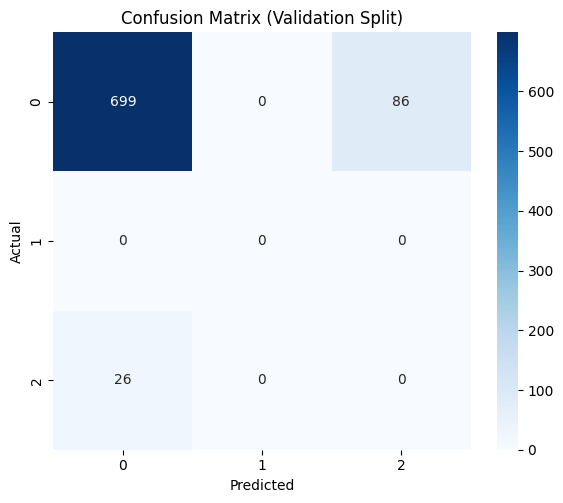

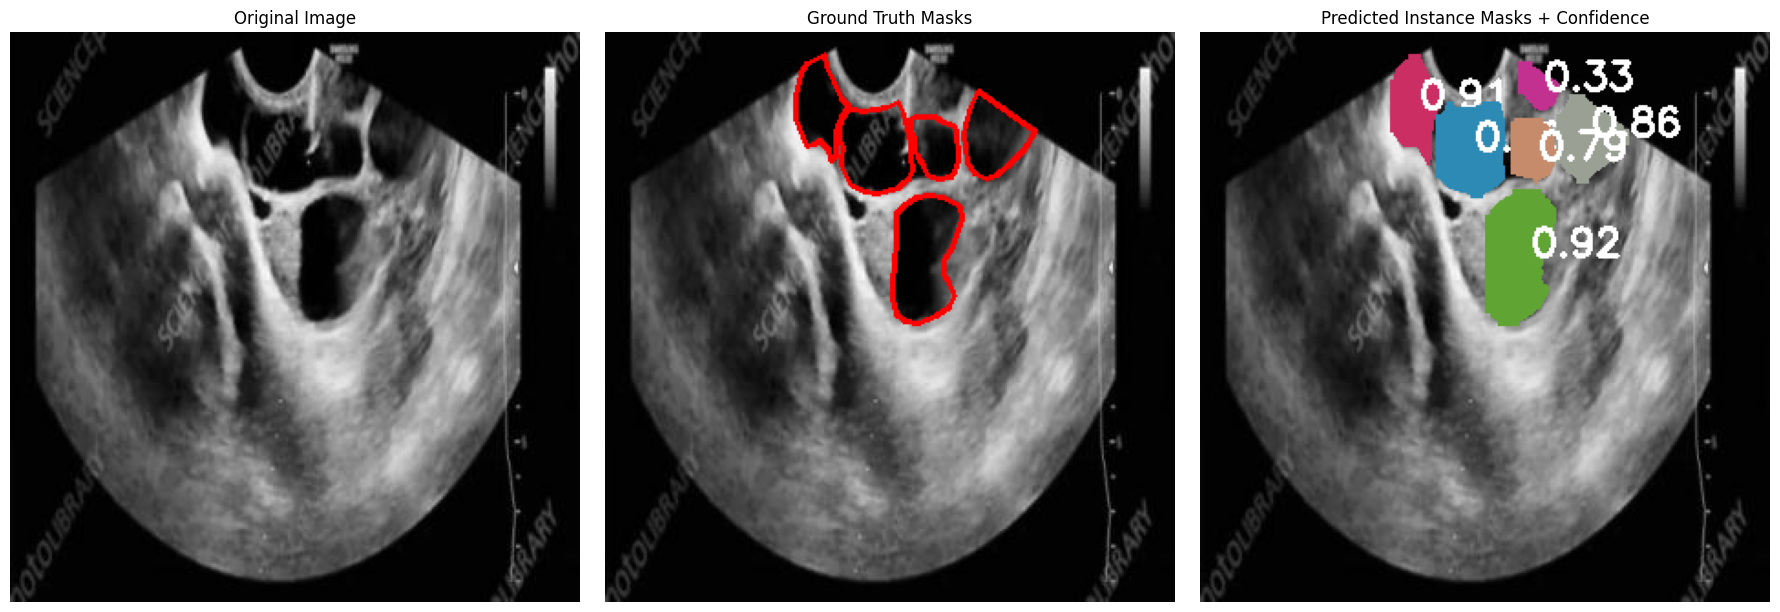


✅ Validation DataFrame saved to: /content/drive/MyDrive/follicle_yolo_project/results/final_validation_evaluation/val_follicle_analysis_mask_area.csv

📄 First 10 rows (validation):
                                            frame_id  num_follicles  \
0  frame_0000092_jpg.rf.347e25ef9f541ffdd06fff09a...              3   
1  frame_0000092_jpg.rf.a5d76da84cb5729864a050e5b...              3   
2  frame_00001_jpg.rf.904ff2c65f374d0632d219d89ab...              0   
3  frame_00002_jpg.rf.0ebfd9cf9f7b811461547e00c01...              2   
4  frame_00002_jpg.rf.ded70bc8a585b1354d366d462b1...              2   
5  frame_00003_jpg.rf.1bbd56a4622abd9f33a0cb63b27...              4   
6  frame_00003_jpg.rf.64d5f1d58a128638e949d22a4fc...              4   
7  frame_00003_jpg.rf.e1ba8f9e4fd5fa88654c2fdbade...              4   
8  frame_000042_jpg.rf.ccd0ffb021c3c99e9557256f56...             11   
9  frame_0000836_jpg.rf.5ee936b8129323b8b762078db...              2   

   num_mature  num_immature  largest

In [3]:
# =======================================================
# ✅ Final: Validation-split Evaluation — Accuracy from confusion matrix + Mask-area based follicle sizes
# =======================================================
from ultralytics import YOLO
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import random
import math

# --- Mount Google Drive ---
drive.mount('/content/drive')

# --- Paths (updated to your final trained model) ---
model_path = "/content/drive/MyDrive/follicle_yolo_project/results/final_model_training_stable/final_tuned_anti_overfit_v3/weights/best.pt"
val_images_path = "/content/drive/MyDrive/follicle_yolo_project/split_dataset/val/images"
val_labels_path = "/content/drive/MyDrive/follicle_yolo_project/split_dataset/val/labels"
val_yaml = "/content/drive/MyDrive/follicle_yolo_project/yamls/train_val_dataset.yaml"
save_dir = "/content/drive/MyDrive/follicle_yolo_project/results/final_validation_evaluation"
os.makedirs(save_dir, exist_ok=True)

# --- Load model ---
model = YOLO(model_path)

# --------------------------
# 1) Run validation (val split) to get metrics + confusion matrix
# --------------------------
results = model.val(data=val_yaml, split="val", save_json=True)
metrics = results.results_dict

# --- YOLO-reported metrics ---
precision = metrics.get("metrics/precision(B)", 0)
recall = metrics.get("metrics/recall(B)", 0)
f1 = 2 * ((precision * recall) / (precision + recall + 1e-8))
map50 = metrics.get("metrics/mAP50(B)", 0)
map95 = metrics.get("metrics/mAP50-95(B)", 0)

# --- Confusion matrix ---
conf_matrix = results.confusion_matrix.matrix if hasattr(results, "confusion_matrix") else None

# --- Accuracy strictly from confusion matrix ---
if conf_matrix is not None and conf_matrix.sum() > 0:
    accuracy_cm = np.trace(conf_matrix) / conf_matrix.sum()
else:
    accuracy_cm = 0.0

print("\n📊 Evaluation Metrics (Validation Split):")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"mAP@50: {map50:.4f}")
print(f"mAP@50–95: {map95:.4f}")
print(f"\n✅ Accuracy (FROM CONFUSION MATRIX only): {accuracy_cm:.4f}")

# --- Confusion Matrix Plot ---
if conf_matrix is not None:
    plt.figure(figsize=(6,5))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="Blues", square=True)
    plt.title("Confusion Matrix (Validation Split)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, "confusion_matrix_val.png"))
    plt.show()

# --------------------------
# 2) Set calibration for ultrasound scale
# --------------------------
# ⚠️ Adjust this value to match your imaging scale
PIXEL_TO_MM = 0.10

# --------------------------
# 3) Visualize one sample: Original | Ground Truth | Predicted
# --------------------------
def random_color():
    return tuple(np.random.randint(40, 220, 3).tolist())

sample_img = random.choice([f for f in os.listdir(val_images_path) if f.lower().endswith(('.jpg','.png','.jpeg'))])
sample_path = os.path.join(val_images_path, sample_img)
label_path = os.path.join(val_labels_path, os.path.splitext(sample_img)[0] + ".txt")

orig_bgr = cv2.imread(sample_path)
orig_img = cv2.cvtColor(orig_bgr, cv2.COLOR_BGR2RGB)

# Ground truth overlay
gt_img = orig_img.copy()
if os.path.exists(label_path):
    with open(label_path, 'r') as lf:
        for line in lf:
            parts = line.strip().split()
            if len(parts) >= 3:
                coords = np.array(parts[1:], dtype=float)
                if coords.size >= 4:
                    coords = coords.reshape(-1, 2)
                    h, w = gt_img.shape[:2]
                    coords[:,0] *= w
                    coords[:,1] *= h
                    pts = coords.astype(np.int32)
                    cv2.polylines(gt_img, [pts], isClosed=True, color=(255,0,0), thickness=2)

# Predictions
pred = model.predict(sample_path, conf=0.25, verbose=False)[0]
pred_img = orig_img.copy()
if getattr(pred, "masks", None) is not None and len(pred.masks.xy):
    confs = pred.boxes.conf.cpu().numpy() if pred.boxes is not None else []
    for i, poly in enumerate(pred.masks.xy):
        pts = np.array(poly, dtype=np.int32)
        color = random_color()
        cv2.fillPoly(pred_img, [pts], color)
        cx, cy = int(np.mean(pts[:,0])), int(np.mean(pts[:,1]))
        conf_text = f"{confs[i]:.2f}" if i < len(confs) else "0.00"
        cv2.putText(pred_img, conf_text, (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2)
else:
    if pred.boxes is not None and len(pred.boxes):
        boxes_xyxy = pred.boxes.xyxy.cpu().numpy()
        confs = pred.boxes.conf.cpu().numpy()
        for (x1,y1,x2,y2), c in zip(boxes_xyxy, confs):
            x1, y1, x2, y2 = map(int, [x1,y1,x2,y2])
            cv2.rectangle(pred_img, (x1,y1), (x2,y2), (0,255,0), 2)
            cv2.putText(pred_img, f"{c:.2f}", (x1, y1-6), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,0), 2)

# Show visualization
fig, axs = plt.subplots(1,3, figsize=(18,6))
axs[0].imshow(orig_img); axs[0].set_title("Original Image"); axs[0].axis("off")
axs[1].imshow(gt_img); axs[1].set_title("Ground Truth Masks"); axs[1].axis("off")
axs[2].imshow(pred_img); axs[2].set_title("Predicted Instance Masks + Confidence"); axs[2].axis("off")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "sample_instance_comparison_val.png"))
plt.show()

# --------------------------
# 4) Build follicle metrics dataframe using mask area → mm
# --------------------------
records = []
for f in sorted(os.listdir(val_images_path)):
    if not f.lower().endswith(('.jpg','.png','.jpeg')): continue
    img_path = os.path.join(val_images_path, f)
    pred = model.predict(img_path, conf=0.25, verbose=False)[0]

    sizes_mm, confs = [], []

    if getattr(pred, "masks", None) is not None and len(pred.masks.xy):
        for poly, c in zip(pred.masks.xy, (pred.boxes.conf.cpu().numpy() if pred.boxes is not None else [])):
            pts = np.array(poly, dtype=np.int32)
            area_px = abs(cv2.contourArea(pts))
            if area_px <= 0: continue
            diam_px = 2.0 * math.sqrt(area_px / math.pi)
            diam_mm = diam_px * PIXEL_TO_MM
            sizes_mm.append(diam_mm)
            confs.append(float(c))
    else:
        boxes = pred.boxes.xywh.cpu().numpy() if pred.boxes is not None else np.empty((0,4))
        conf_arr = pred.boxes.conf.cpu().numpy() if pred.boxes is not None else np.empty((0,))
        for b, c in zip(boxes, conf_arr):
            w_px = b[2]
            diam_mm = (w_px * PIXEL_TO_MM)
            sizes_mm.append(diam_mm)
            confs.append(float(c))

    num_follicles = len(sizes_mm)
    largest = max(sizes_mm) if sizes_mm else 0.0
    num_mature = int(sum(18.0 <= s <= 22.0 for s in sizes_mm))
    num_immature = int(sum(s < 18.0 for s in sizes_mm))
    ready_for_retrieval = int(largest >= 18.0)
    highest_conf = float(max(confs)) if confs else 0.0

    records.append({
        "frame_id": f,
        "num_follicles": num_follicles,
        "num_mature": num_mature,
        "num_immature": num_immature,
        "largest_follicle_mm": round(float(largest), 2),
        "ready_for_retrieval": ready_for_retrieval,
        "highest_confidence": round(float(highest_conf), 3)
    })

df_val = pd.DataFrame(records)
csv_path = os.path.join(save_dir, "val_follicle_analysis_mask_area.csv")
df_val.to_csv(csv_path, index=False)

print(f"\n✅ Validation DataFrame saved to: {csv_path}")
print("\n📄 First 10 rows (validation):")
print(df_val.head(10))


In [5]:
# =======================================================
# 🧬 YOLOv8s-Seg: Robust Anti-Overfitting Training Script
# =======================================================
from ultralytics import YOLO
from google.colab import drive
import os

# --- Mount Google Drive ---
drive.mount('/content/drive')

# --- Paths ---
project_root = "/content/drive/MyDrive/follicle_yolo_project"
yaml_path = f"{project_root}/yamls/train_val_dataset.yaml"
results_dir = f"{project_root}/results/train/anti_overfit_v1"
os.makedirs(results_dir, exist_ok=True)

# --- Load pretrained YOLOv8s-seg model ---
model = YOLO("yolov8s-seg.pt")

# --- Start Training with Anti-Overfit Configuration ---
model.train(
    data=yaml_path,
    epochs=70,                     # slightly longer to allow stable learning
    imgsz=640,
    batch=16,
    device=0,
    project=results_dir,
    name="follicle_segmentation_anti_overfit",
    optimizer="AdamW",             # smoother convergence
    lr0=0.002,                     # moderate learning rate
    lrf=0.05,                      # LR decay factor
    weight_decay=0.001,            # regularization
    momentum=0.937,
    dropout=0.15,                  # ✅ helps prevent overfitting
    close_mosaic=5,                # ✅ disable mosaic augmentation after 5 epochs
    cos_lr=True,                   # ✅ cosine LR schedule
    patience=10,                   # ✅ early stopping
    pretrained=True,
    freeze=10,                     # ✅ freeze first 10 backbone layers
    cache=False,
    plots=True,
    verbose=True,
    seed=42,
    deterministic=True,
    augment=True,                  # ✅ keep augmentations enabled
    hsv_h=0.015,
    hsv_s=0.6,
    hsv_v=0.4,
    degrees=0.0,
    translate=0.1,
    scale=0.6,
    shear=0.0,
    fliplr=0.5,
    flipud=0.0,
    perspective=0.0,
    auto_augment="randaugment",    # ✅ improved augmentation policy
    erasing=0.4,                   # ✅ random erasing
    mixup=0.0,                     # disabled for medical data
    copy_paste=0.0,                # disabled for segmentation realism
    mosaic=1.0,                    # reduced mosaic effect
    val=True,                      # validate during training
    exist_ok=True
)

print("✅ Training complete — model tuned for robust generalization!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=5, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/drive/MyDrive/follicle_yolo_project/yamls/train_val_dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.15, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=10, half=False, hsv_h=0.015, hsv_s=0.6, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.002, lrf=0.05, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-seg.pt, momentum=0.937, mos

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,374 parameters, 0 gradients, 39.9 GFLOPs
val: Fast image access ✅ (ping: 0.8±0.4 ms, read: 7.1±4.0 MB/s, size: 14.4 KB)
val: Scanning /content/drive/MyDrive/follicle_yolo_project/split_dataset/train/labels.cache... 818 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 818/818 1.3Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 52/52 1.8it/s 28.4s
                   all        818       2821      0.986       0.99      0.994      0.882      0.987       0.99      0.995      0.834
     immature_follicle        818       2821      0.986       0.99      0.994      0.882      0.987       0.99      0.995      0.834
Speed: 1.5

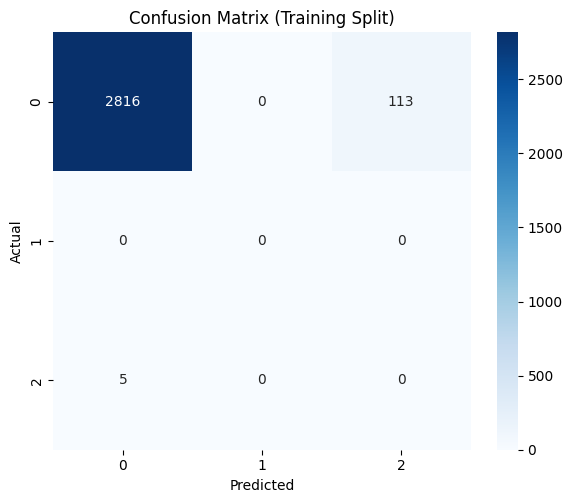

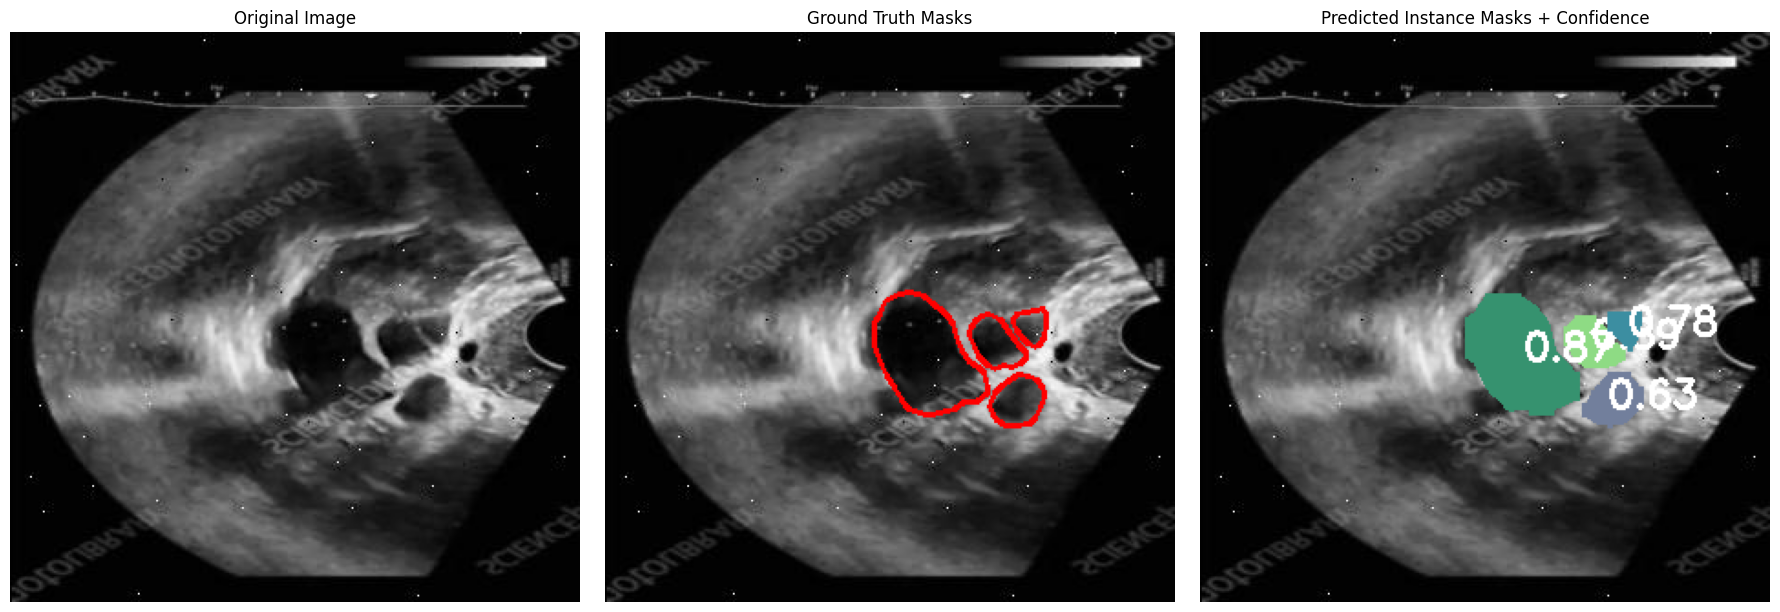


✅ DataFrame saved to: /content/drive/MyDrive/follicle_yolo_project/results/train_evaluation_anti_overfit/train_follicle_analysis_mask_area.csv

📄 First 10 rows (train):
                                            frame_id  num_follicles  \
0  frame_0000092_jpg.rf.74fe05a035be082a6713cf3ba...              3   
1  frame_00001_jpg.rf.6ee1dcdde24785ab903a62470be...              1   
2  frame_00001_jpg.rf.ca5429d8265e0ed96e4cdcb5738...              1   
3  frame_00002_jpg.rf.c75aed1ce2df7ee925be5ab6424...              2   
4  frame_0000342_jpg.rf.cf5b9bb8087722792f0efc8ed...              3   
5  frame_0000342_jpg.rf.d033e3fc1990b9f827fefcf30...              3   
6  frame_0000342_jpg.rf.e3a7f8cc04b18f3caaa1988df...              3   
7  frame_000042_jpg.rf.357a531ae7984987606cdee28b...             10   
8  frame_000042_jpg.rf.ad1c0124beac69b6133c91f2dd...             11   
9  frame_0000836_jpg.rf.263792c105503369762154e68...              3   

   num_mature  num_immature  largest_follicle_mm

In [7]:
# =======================================================
# ✅ Final: Train-split Evaluation — Accuracy from confusion matrix + Mask-area based follicle sizes
# =======================================================
from ultralytics import YOLO
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import random
import math

# --- Mount Google Drive ---
drive.mount('/content/drive')

# --- Paths (UPDATED for anti-overfit model) ---
model_path = "/content/drive/MyDrive/follicle_yolo_project/results/train/anti_overfit_v1/follicle_segmentation_anti_overfit/weights/best.pt"
train_images_path = "/content/drive/MyDrive/follicle_yolo_project/split_dataset/train/images"
train_labels_path = "/content/drive/MyDrive/follicle_yolo_project/split_dataset/train/labels"
train_yaml = "/content/drive/MyDrive/follicle_yolo_project/yamls/train_val_dataset.yaml"
save_dir = "/content/drive/MyDrive/follicle_yolo_project/results/train_evaluation_anti_overfit"
os.makedirs(save_dir, exist_ok=True)

# --- Load trained model ---
model = YOLO(model_path)

# --------------------------
# 1) Run validation (train split) to get metrics + confusion matrix
# --------------------------
results = model.val(data=train_yaml, split="train", save_json=True)
metrics = results.results_dict

# Standard metrics (from YOLO output)
precision = metrics.get("metrics/precision(B)", 0)
recall = metrics.get("metrics/recall(B)", 0)
f1 = 2 * ((precision * recall) / (precision + recall + 1e-8))
map50 = metrics.get("metrics/mAP50(B)", 0)
map95 = metrics.get("metrics/mAP50-95(B)", 0)

# Confusion matrix (if available)
conf_matrix = results.confusion_matrix.matrix if hasattr(results, "confusion_matrix") else None

# --- Accuracy strictly from confusion matrix ---
if conf_matrix is not None and conf_matrix.sum() > 0:
    accuracy_cm = np.trace(conf_matrix) / conf_matrix.sum()
else:
    accuracy_cm = 0.0

print("\n📊 Evaluation Metrics (Training Split - reported by YOLO):")
print(f"Precision (YOLO): {precision:.4f}")
print(f"Recall (YOLO):    {recall:.4f}")
print(f"F1 (derived):     {f1:.4f}")
print(f"mAP@50:           {map50:.4f}")
print(f"mAP@50-95:        {map95:.4f}")
print(f"\n✅ Accuracy (FROM CONFUSION MATRIX only): {accuracy_cm:.4f}")

# --- Plot confusion matrix ---
if conf_matrix is not None:
    plt.figure(figsize=(6,5))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="Blues", square=True)
    plt.title("Confusion Matrix (Training Split)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, "confusion_matrix_train.png"))
    plt.show()

# --------------------------
# 2) Pixel-to-mm calibration
# --------------------------
PIXEL_TO_MM = 0.10  # adjust this if you have a known ultrasound calibration

# --------------------------
# 3) Visualize sample: Original | GT | Predicted Masks
# --------------------------
def random_color():
    return tuple(np.random.randint(40, 220, 3).tolist())

sample_img = random.choice([f for f in os.listdir(train_images_path) if f.lower().endswith(('.jpg','.png','.jpeg'))])
sample_path = os.path.join(train_images_path, sample_img)
label_path = os.path.join(train_labels_path, os.path.splitext(sample_img)[0] + ".txt")

orig_bgr = cv2.imread(sample_path)
orig_img = cv2.cvtColor(orig_bgr, cv2.COLOR_BGR2RGB)

# Ground truth overlay
gt_img = orig_img.copy()
if os.path.exists(label_path):
    with open(label_path, 'r') as lf:
        for line in lf:
            parts = line.strip().split()
            if len(parts) >= 3:
                coords = np.array(parts[1:], dtype=float)
                if coords.size >= 4:
                    coords = coords.reshape(-1, 2)
                    h, w = gt_img.shape[:2]
                    coords[:,0] *= w
                    coords[:,1] *= h
                    pts = coords.astype(np.int32)
                    cv2.polylines(gt_img, [pts], isClosed=True, color=(255,0,0), thickness=2)

# Predictions
pred = model.predict(sample_path, conf=0.25, verbose=False)[0]

pred_img = orig_img.copy()
if getattr(pred, "masks", None) is not None and len(pred.masks.xy):
    confs = pred.boxes.conf.cpu().numpy() if pred.boxes is not None else []
    for i, poly in enumerate(pred.masks.xy):
        pts = np.array(poly, dtype=np.int32)
        color = random_color()
        cv2.fillPoly(pred_img, [pts], color)
        cx, cy = int(np.mean(pts[:,0])), int(np.mean(pts[:,1]))
        conf_text = f"{confs[i]:.2f}" if i < len(confs) else "0.00"
        cv2.putText(pred_img, conf_text, (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2)
else:
    if pred.boxes is not None and len(pred.boxes):
        boxes_xyxy = pred.boxes.xyxy.cpu().numpy()
        confs = pred.boxes.conf.cpu().numpy()
        for (x1,y1,x2,y2), c in zip(boxes_xyxy, confs):
            x1, y1, x2, y2 = map(int, [x1,y1,x2,y2])
            cv2.rectangle(pred_img, (x1,y1), (x2,y2), (0,255,0), 2)
            cv2.putText(pred_img, f"{c:.2f}", (x1, y1-6), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,0), 2)

fig, axs = plt.subplots(1,3, figsize=(18,6))
axs[0].imshow(orig_img); axs[0].set_title("Original Image"); axs[0].axis("off")
axs[1].imshow(gt_img); axs[1].set_title("Ground Truth Masks"); axs[1].axis("off")
axs[2].imshow(pred_img); axs[2].set_title("Predicted Instance Masks + Confidence"); axs[2].axis("off")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "sample_instance_comparison.png"))
plt.show()

# --------------------------
# 4) Generate follicle size statistics (mask-based)
# --------------------------
records = []
for f in sorted(os.listdir(train_images_path)):
    if not f.lower().endswith(('.jpg','.png','.jpeg')): continue
    img_path = os.path.join(train_images_path, f)
    pred = model.predict(img_path, conf=0.25, verbose=False)[0]

    sizes_mm, confs = [], []
    if getattr(pred, "masks", None) is not None and len(pred.masks.xy):
        for poly, c in zip(pred.masks.xy, (pred.boxes.conf.cpu().numpy() if pred.boxes is not None else [])):
            pts = np.array(poly, dtype=np.int32)
            area_px = abs(cv2.contourArea(pts))
            if area_px <= 0:
                continue
            diam_px = 2.0 * math.sqrt(area_px / math.pi)
            diam_mm = diam_px * PIXEL_TO_MM
            sizes_mm.append(diam_mm)
            confs.append(float(c))
    else:
        boxes = pred.boxes.xywh.cpu().numpy() if pred.boxes is not None else np.empty((0,4))
        conf_arr = pred.boxes.conf.cpu().numpy() if pred.boxes is not None else np.empty((0,))
        for b, c in zip(boxes, conf_arr):
            w_px = b[2]
            diam_mm = (w_px * PIXEL_TO_MM)
            sizes_mm.append(diam_mm)
            confs.append(float(c))

    num_follicles = len(sizes_mm)
    largest = max(sizes_mm) if sizes_mm else 0.0
    num_mature = int(sum(18.0 <= s <= 22.0 for s in sizes_mm))
    num_immature = int(sum(s < 18.0 for s in sizes_mm))
    ready_for_retrieval = int(largest >= 18.0)
    highest_conf = float(max(confs)) if confs else 0.0

    records.append({
        "frame_id": f,
        "num_follicles": num_follicles,
        "num_mature": num_mature,
        "num_immature": num_immature,
        "largest_follicle_mm": round(float(largest), 2),
        "ready_for_retrieval": ready_for_retrieval,
        "highest_confidence": round(float(highest_conf), 3)
    })

df_train = pd.DataFrame(records)
csv_path = os.path.join(save_dir, "train_follicle_analysis_mask_area.csv")
df_train.to_csv(csv_path, index=False)

print(f"\n✅ DataFrame saved to: {csv_path}")
print("\n📄 First 10 rows (train):")
print(df_train.head(10))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Validation YAML created at: /content/drive/MyDrive/follicle_yolo_project/yamls/val_only_dataset.yaml
Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,374 parameters, 0 gradients, 39.9 GFLOPs
val: Fast image access ✅ (ping: 15.2±32.1 ms, read: 1.0±1.0 MB/s, size: 13.7 KB)
val: Scanning /content/drive/MyDrive/follicle_yolo_project/split_dataset/val/labels.cache... 205 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 205/205 99.8Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 13/13 1.0it/s 13.3s
                   all        205        725      0.928      0.946      0.969      0.797      0.934      0.952      0.979      0.764
     immature_follicle        205      

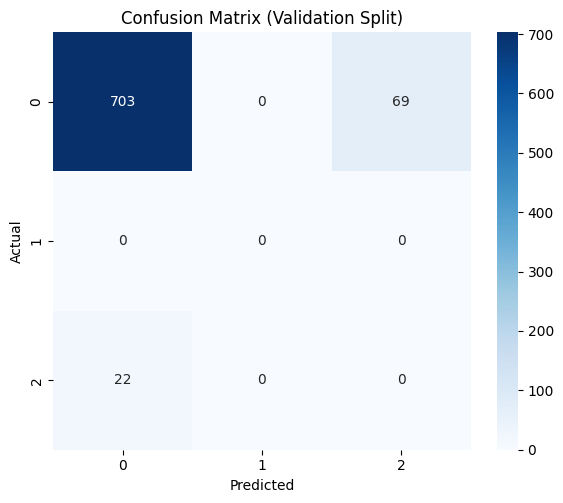

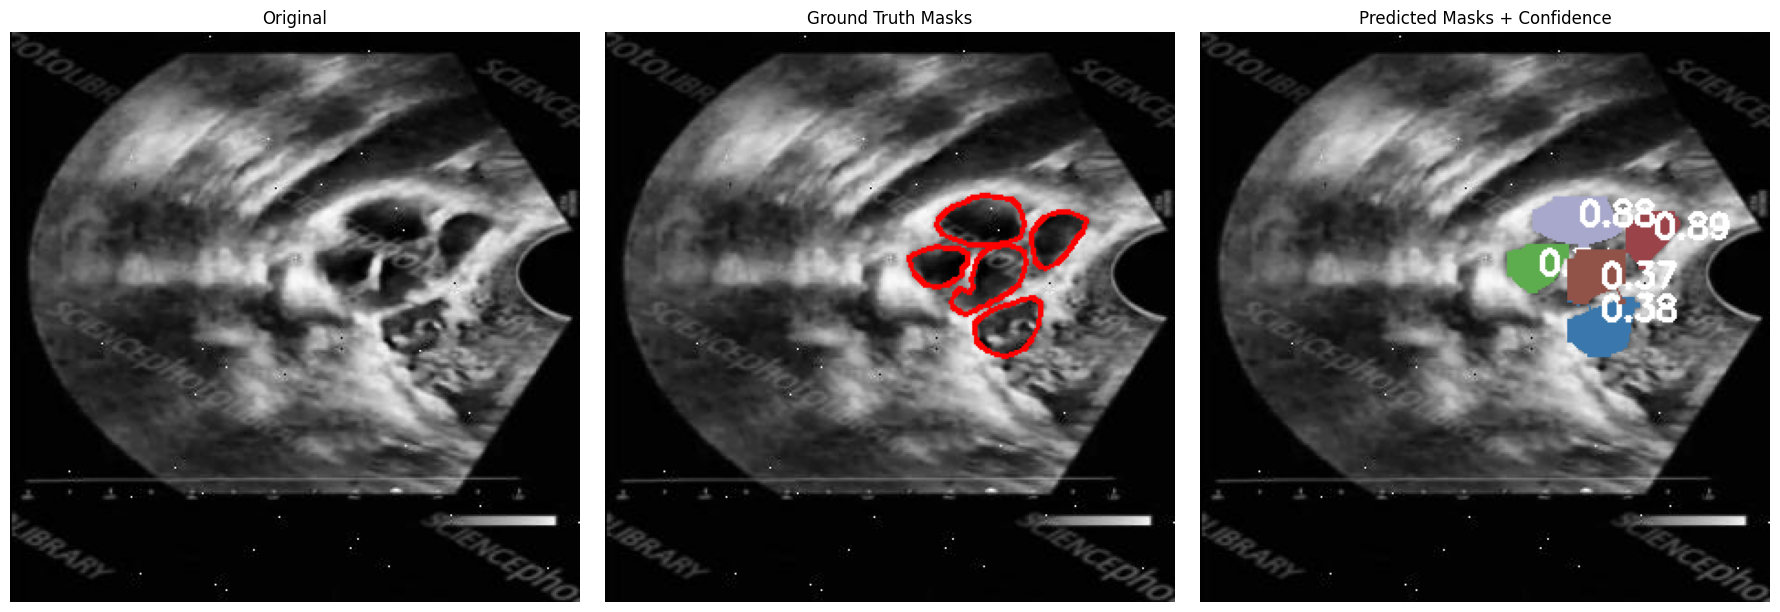


✅ Validation analysis CSV saved: /content/drive/MyDrive/follicle_yolo_project/results/validation_evaluation_anti_overfit_v1/val_follicle_analysis_mask_area.csv

📄 First 10 rows:
                                            frame_id  num_follicles  \
0  frame_0000092_jpg.rf.347e25ef9f541ffdd06fff09a...              3   
1  frame_0000092_jpg.rf.a5d76da84cb5729864a050e5b...              3   
2  frame_00001_jpg.rf.904ff2c65f374d0632d219d89ab...              0   
3  frame_00002_jpg.rf.0ebfd9cf9f7b811461547e00c01...              2   
4  frame_00002_jpg.rf.ded70bc8a585b1354d366d462b1...              2   
5  frame_00003_jpg.rf.1bbd56a4622abd9f33a0cb63b27...              3   
6  frame_00003_jpg.rf.64d5f1d58a128638e949d22a4fc...              3   
7  frame_00003_jpg.rf.e1ba8f9e4fd5fa88654c2fdbade...              4   
8  frame_000042_jpg.rf.ccd0ffb021c3c99e9557256f56...             12   
9  frame_0000836_jpg.rf.5ee936b8129323b8b762078db...              2   

   num_mature  num_immature  largest_fo

In [16]:
# =======================================================
# ✅ Final: Validation-split Evaluation — Accuracy + Mask-area follicle metrics
# =======================================================
from ultralytics import YOLO
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import random
import math
import yaml

# --- Mount Google Drive ---
drive.mount('/content/drive')

# --- Paths (no model path change) ---
model_path = "/content/drive/MyDrive/follicle_yolo_project/results/train/anti_overfit_v1/follicle_segmentation_anti_overfit/weights/best.pt"
val_images_path = "/content/drive/MyDrive/follicle_yolo_project/split_dataset/val/images"
val_labels_path = "/content/drive/MyDrive/follicle_yolo_project/split_dataset/val/labels"
val_yaml_path = "/content/drive/MyDrive/follicle_yolo_project/yamls/val_only_dataset.yaml"
save_dir = "/content/drive/MyDrive/follicle_yolo_project/results/validation_evaluation_anti_overfit_v1"
os.makedirs(save_dir, exist_ok=True)

# -------------------------------------------------------
# 1) ✅ Create validation-only YAML dynamically (train key required)
# -------------------------------------------------------
val_yaml_data = {
    "train": val_images_path,   # dummy (same as val)
    "val": val_images_path,
    "nc": 1,                    # number of classes
    "names": ["follicle"]       # class name
}

with open(val_yaml_path, 'w') as f:
    yaml.dump(val_yaml_data, f)

print(f"✅ Validation YAML created at: {val_yaml_path}")

# --- Load YOLO model ---
model = YOLO(model_path)

# -------------------------------------------------------
# 2) Run validation (val split)
# -------------------------------------------------------
results = model.val(data=val_yaml_path, split="val", save_json=True)
metrics = results.results_dict

# --- YOLO metrics ---
precision = metrics.get("metrics/precision(B)", 0)
recall = metrics.get("metrics/recall(B)", 0)
f1 = 2 * ((precision * recall) / (precision + recall + 1e-8))
map50 = metrics.get("metrics/mAP50(B)", 0)
map95 = metrics.get("metrics/mAP50-95(B)", 0)

# --- Confusion matrix ---
conf_matrix = results.confusion_matrix.matrix if hasattr(results, "confusion_matrix") else None
if conf_matrix is not None and conf_matrix.sum() > 0:
    accuracy_cm = np.trace(conf_matrix) / conf_matrix.sum()
else:
    accuracy_cm = 0.0

print("\n📊 Evaluation Metrics (Validation Split):")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"mAP@50: {map50:.4f}")
print(f"mAP@50–95: {map95:.4f}")
print(f"✅ Accuracy (Confusion Matrix): {accuracy_cm:.4f}")

# --- Plot confusion matrix ---
if conf_matrix is not None:
    plt.figure(figsize=(6,5))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="Blues", square=True)
    plt.title("Confusion Matrix (Validation Split)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, "confusion_matrix_val.png"))
    plt.show()

# -------------------------------------------------------
# 3) Set ultrasound pixel → mm calibration
# -------------------------------------------------------
PIXEL_TO_MM = 0.10  # adjust if known

# -------------------------------------------------------
# 4) Visualize one random validation image
# -------------------------------------------------------
def random_color():
    return tuple(np.random.randint(40, 220, 3).tolist())

sample_img = random.choice([f for f in os.listdir(val_images_path) if f.lower().endswith(('.jpg','.png','.jpeg'))])
sample_path = os.path.join(val_images_path, sample_img)
label_path = os.path.join(val_labels_path, os.path.splitext(sample_img)[0] + ".txt")

orig_bgr = cv2.imread(sample_path)
orig_img = cv2.cvtColor(orig_bgr, cv2.COLOR_BGR2RGB)

# --- Ground truth overlay ---
gt_img = orig_img.copy()
if os.path.exists(label_path):
    with open(label_path, 'r') as lf:
        for line in lf:
            parts = line.strip().split()
            if len(parts) >= 3:
                coords = np.array(parts[1:], dtype=float)
                if coords.size >= 4:
                    coords = coords.reshape(-1, 2)
                    h, w = gt_img.shape[:2]
                    coords[:,0] *= w
                    coords[:,1] *= h
                    pts = coords.astype(np.int32)
                    cv2.polylines(gt_img, [pts], True, (255,0,0), 2)

# --- Predictions ---
pred = model.predict(sample_path, conf=0.25, verbose=False)[0]
pred_img = orig_img.copy()
if getattr(pred, "masks", None) is not None and len(pred.masks.xy):
    confs = pred.boxes.conf.cpu().numpy() if pred.boxes is not None else []
    for i, poly in enumerate(pred.masks.xy):
        pts = np.array(poly, dtype=np.int32)
        color = random_color()
        cv2.fillPoly(pred_img, [pts], color)
        cx, cy = int(np.mean(pts[:,0])), int(np.mean(pts[:,1]))
        conf_text = f"{confs[i]:.2f}" if i < len(confs) else "0.00"
        cv2.putText(pred_img, conf_text, (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 2)

# --- Show visualization ---
fig, axs = plt.subplots(1,3, figsize=(18,6))
axs[0].imshow(orig_img); axs[0].set_title("Original"); axs[0].axis("off")
axs[1].imshow(gt_img); axs[1].set_title("Ground Truth Masks"); axs[1].axis("off")
axs[2].imshow(pred_img); axs[2].set_title("Predicted Masks + Confidence"); axs[2].axis("off")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "sample_instance_comparison_val.png"))
plt.show()

# -------------------------------------------------------
# 5) Compute follicle size statistics using mask areas
# -------------------------------------------------------
records = []
for f in sorted(os.listdir(val_images_path)):
    if not f.lower().endswith(('.jpg','.png','.jpeg')):
        continue

    img_path = os.path.join(val_images_path, f)
    pred = model.predict(img_path, conf=0.25, verbose=False)[0]

    sizes_mm, confs = [], []
    if getattr(pred, "masks", None) is not None and len(pred.masks.xy):
        for poly, c in zip(pred.masks.xy, (pred.boxes.conf.cpu().numpy() if pred.boxes else [])):
            pts = np.array(poly, dtype=np.int32)
            area_px = abs(cv2.contourArea(pts))
            if area_px <= 0: continue
            diam_px = 2.0 * math.sqrt(area_px / math.pi)
            diam_mm = diam_px * PIXEL_TO_MM
            sizes_mm.append(diam_mm)
            confs.append(float(c))
    else:
        boxes = pred.boxes.xywh.cpu().numpy() if pred.boxes else np.empty((0,4))
        conf_arr = pred.boxes.conf.cpu().numpy() if pred.boxes else np.empty((0,))
        for b, c in zip(boxes, conf_arr):
            diam_mm = b[2] * PIXEL_TO_MM
            sizes_mm.append(diam_mm)
            confs.append(float(c))

    num_follicles = len(sizes_mm)
    largest = max(sizes_mm) if sizes_mm else 0.0
    num_mature = int(sum(18.0 <= s <= 22.0 for s in sizes_mm))
    num_immature = int(sum(s < 18.0 for s in sizes_mm))
    ready_for_retrieval = int(largest >= 18.0)
    highest_conf = float(max(confs)) if confs else 0.0

    records.append({
        "frame_id": f,
        "num_follicles": num_follicles,
        "num_mature": num_mature,
        "num_immature": num_immature,
        "largest_follicle_mm": round(float(largest), 2),
        "ready_for_retrieval": ready_for_retrieval,
        "highest_confidence": round(highest_conf, 3)
    })

df_val = pd.DataFrame(records)
csv_path = os.path.join(save_dir, "val_follicle_analysis_mask_area.csv")
df_val.to_csv(csv_path, index=False)

print(f"\n✅ Validation analysis CSV saved: {csv_path}")
print("\n📄 First 10 rows:")
print(df_val.head(10))


In [9]:
# ===========================================================
# 🔥 Final Fine-Tuning: Stability-Enhanced YOLOv8 Segmentation Training
# ===========================================================
from ultralytics import YOLO
import os
from google.colab import drive

# --- Mount Google Drive ---
drive.mount('/content/drive')

# --- Paths ---
base_dir = "/content/drive/MyDrive/follicle_yolo_project"
data_yaml = f"{base_dir}/yamls/train_val_dataset.yaml"
save_dir = f"{base_dir}/results/final_fine_tuning_v4"
os.makedirs(save_dir, exist_ok=True)

# --- Load best previous model ---
model_path = f"{base_dir}/results/final_model_training_stable/final_tuned_anti_overfit_v3/weights/best.pt"
model = YOLO(model_path)

# --- Train with refined hyperparameters ---
model.train(
    data=data_yaml,
    epochs=70,                 # longer, but we'll use early stop
    patience=10,               # stop if val doesn’t improve
    imgsz=640,
    batch=8,
    workers=2,
    optimizer="AdamW",         # better generalization
    lr0=0.0005,                # smaller for stability
    lrf=0.05,
    momentum=0.93,
    weight_decay=0.0008,
    dropout=0.25,              # 🔹 more dropout
    label_smoothing=0.1,       # 🔹 prevents overconfidence
    warmup_epochs=2,
    cos_lr=True,               # 🔹 smooth cosine LR decay
    augment=True,
    degrees=0.0,
    translate=0.2,
    scale=0.7,
    shear=0.0,
    perspective=0.0,
    mosaic=1.0,                # 🔹 more mosaic augmentation
    mixup=0.1,
    fliplr=0.5,
    hsv_h=0.03,
    hsv_s=0.7,
    hsv_v=0.5,
    project=save_dir,
    name="final_fine_tune_v4",
    cache=True
)

print("✅ Fine-tuned model training completed successfully! 🎯")
print(f"Results saved in: {save_dir}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in the future.
Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/drive/MyDrive/follicle_yolo_project/yamls/train_val_dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.25, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.03, hsv_s=0.7, hsv_v=0.5, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.05, mask_ratio=

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,374 parameters, 0 gradients, 39.9 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 8.8±3.7 MB/s, size: 14.7 KB)
val: Scanning /content/drive/MyDrive/follicle_yolo_project/split_dataset/train/labels.cache... 818 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 818/818 1.2Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 52/52 1.7it/s 30.2s
                   all        818       2821      0.969      0.978      0.993      0.856      0.969      0.978      0.993      0.812
     immature_follicle        818       2821      0.969      0.978      0.993      0.856      0.969      0.978      0.993      0.812
Speed: 1.5

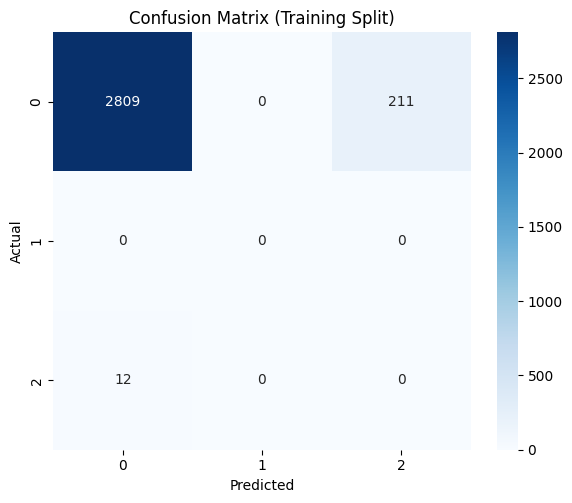

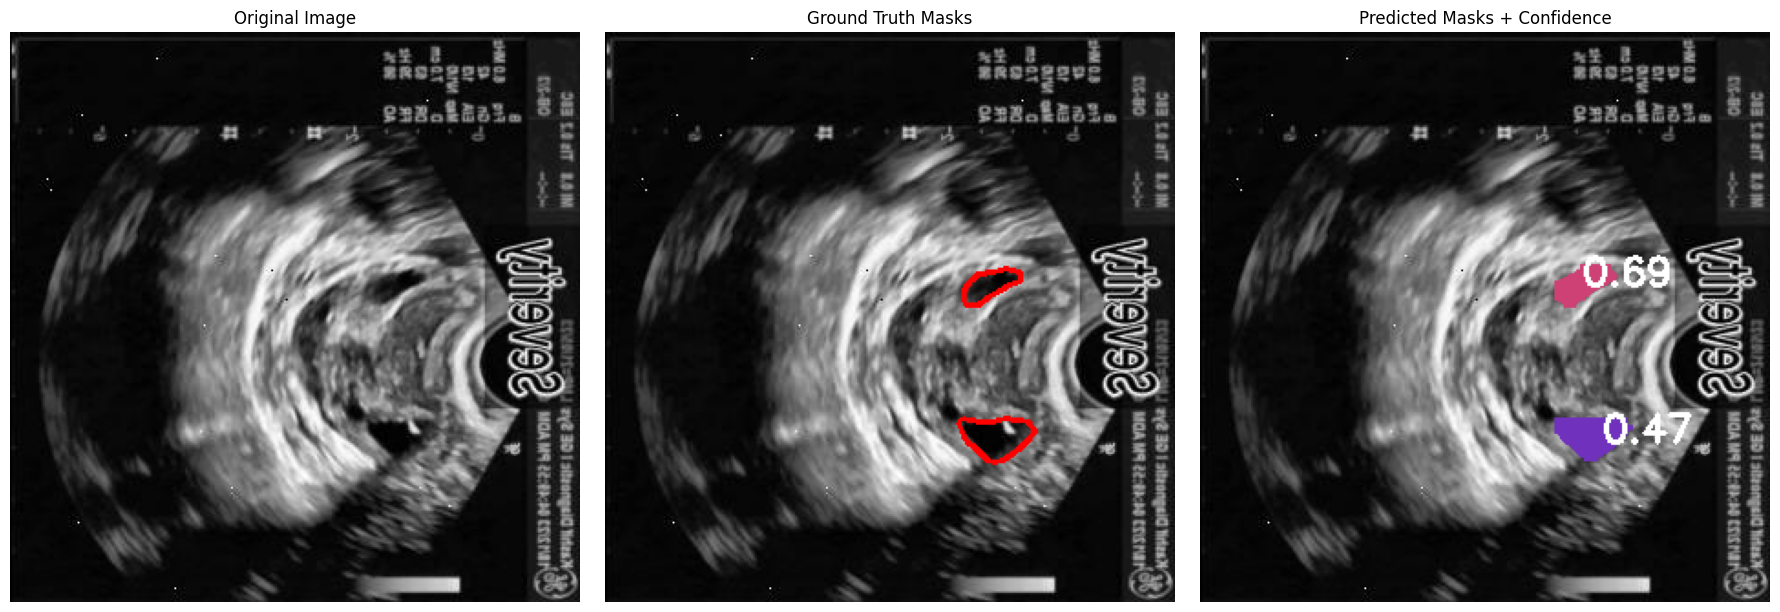


✅ Training DataFrame saved to: /content/drive/MyDrive/follicle_yolo_project/results/training_evaluation_final_fine_tuned_v4/train_follicle_analysis_mask_area.csv

📄 First 10 rows (training):
                                            frame_id  num_follicles  \
0  frame_0000092_jpg.rf.74fe05a035be082a6713cf3ba...              3   
1  frame_00001_jpg.rf.6ee1dcdde24785ab903a62470be...              1   
2  frame_00001_jpg.rf.ca5429d8265e0ed96e4cdcb5738...              1   
3  frame_00002_jpg.rf.c75aed1ce2df7ee925be5ab6424...              2   
4  frame_0000342_jpg.rf.cf5b9bb8087722792f0efc8ed...              3   
5  frame_0000342_jpg.rf.d033e3fc1990b9f827fefcf30...              4   
6  frame_0000342_jpg.rf.e3a7f8cc04b18f3caaa1988df...              3   
7  frame_000042_jpg.rf.357a531ae7984987606cdee28b...             11   
8  frame_000042_jpg.rf.ad1c0124beac69b6133c91f2dd...             11   
9  frame_0000836_jpg.rf.263792c105503369762154e68...              4   

   num_mature  num_immatur

In [13]:
# =======================================================
# ✅ Final: Training-split Evaluation — Accuracy from confusion matrix + Mask-area based follicle sizes
# =======================================================
from ultralytics import YOLO
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import random
import math

# --- Mount Google Drive ---
drive.mount('/content/drive')

# --- Paths (UPDATED for final fine-tuned model) ---
model_path = "/content/drive/MyDrive/follicle_yolo_project/results/final_fine_tuning_v4/final_fine_tune_v4/weights/best.pt"
train_images_path = "/content/drive/MyDrive/follicle_yolo_project/split_dataset/train/images"
train_labels_path = "/content/drive/MyDrive/follicle_yolo_project/split_dataset/train/labels"
train_yaml = "/content/drive/MyDrive/follicle_yolo_project/yamls/train_val_dataset.yaml"
save_dir = "/content/drive/MyDrive/follicle_yolo_project/results/training_evaluation_final_fine_tuned_v4"
os.makedirs(save_dir, exist_ok=True)

# --- Load YOLO model ---
model = YOLO(model_path)

# --------------------------
# 1) Run validation on the training split to get metrics + confusion matrix
# --------------------------
results = model.val(data=train_yaml, split="train", save_json=True)
metrics = results.results_dict

# --- YOLO-reported metrics ---
precision = metrics.get("metrics/precision(B)", 0)
recall = metrics.get("metrics/recall(B)", 0)
f1 = 2 * ((precision * recall) / (precision + recall + 1e-8))
map50 = metrics.get("metrics/mAP50(B)", 0)
map95 = metrics.get("metrics/mAP50-95(B)", 0)

# --- Confusion matrix ---
conf_matrix = results.confusion_matrix.matrix if hasattr(results, "confusion_matrix") else None

# --- Accuracy strictly from confusion matrix ---
if conf_matrix is not None and conf_matrix.sum() > 0:
    accuracy_cm = np.trace(conf_matrix) / conf_matrix.sum()
else:
    accuracy_cm = 0.0

print("\n📊 Evaluation Metrics (Training Split):")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"mAP@50: {map50:.4f}")
print(f"mAP@50–95: {map95:.4f}")
print(f"\n✅ Accuracy (FROM CONFUSION MATRIX only): {accuracy_cm:.4f}")

# --- Confusion Matrix Plot ---
if conf_matrix is not None:
    plt.figure(figsize=(6,5))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="Blues", square=True)
    plt.title("Confusion Matrix (Training Split)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, "confusion_matrix_train.png"))
    plt.show()

# --------------------------
# 2) Set calibration for ultrasound scale
# --------------------------
PIXEL_TO_MM = 0.10  # Adjust if you have exact ultrasound scaling

# --------------------------
# 3) Visualize one random training sample
# --------------------------
def random_color():
    return tuple(np.random.randint(40, 220, 3).tolist())

sample_img = random.choice([f for f in os.listdir(train_images_path) if f.lower().endswith(('.jpg','.png','.jpeg'))])
sample_path = os.path.join(train_images_path, sample_img)
label_path = os.path.join(train_labels_path, os.path.splitext(sample_img)[0] + ".txt")

orig_bgr = cv2.imread(sample_path)
orig_img = cv2.cvtColor(orig_bgr, cv2.COLOR_BGR2RGB)

# --- Ground Truth Overlay ---
gt_img = orig_img.copy()
if os.path.exists(label_path):
    with open(label_path, 'r') as lf:
        for line in lf:
            parts = line.strip().split()
            if len(parts) >= 3:
                coords = np.array(parts[1:], dtype=float)
                if coords.size >= 4:
                    coords = coords.reshape(-1, 2)
                    h, w = gt_img.shape[:2]
                    coords[:,0] *= w
                    coords[:,1] *= h
                    pts = coords.astype(np.int32)
                    cv2.polylines(gt_img, [pts], isClosed=True, color=(255,0,0), thickness=2)

# --- Predictions ---
pred = model.predict(sample_path, conf=0.25, verbose=False)[0]
pred_img = orig_img.copy()
if getattr(pred, "masks", None) is not None and len(pred.masks.xy):
    confs = pred.boxes.conf.cpu().numpy() if pred.boxes is not None else []
    for i, poly in enumerate(pred.masks.xy):
        pts = np.array(poly, dtype=np.int32)
        color = random_color()
        cv2.fillPoly(pred_img, [pts], color)
        cx, cy = int(np.mean(pts[:,0])), int(np.mean(pts[:,1]))
        conf_text = f"{confs[i]:.2f}" if i < len(confs) else "0.00"
        cv2.putText(pred_img, conf_text, (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2)
else:
    if pred.boxes is not None and len(pred.boxes):
        boxes_xyxy = pred.boxes.xyxy.cpu().numpy()
        confs = pred.boxes.conf.cpu().numpy()
        for (x1,y1,x2,y2), c in zip(boxes_xyxy, confs):
            x1, y1, x2, y2 = map(int, [x1,y1,x2,y2])
            cv2.rectangle(pred_img, (x1,y1), (x2,y2), (0,255,0), 2)
            cv2.putText(pred_img, f"{c:.2f}", (x1, y1-6), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,0), 2)

# --- Display Sample ---
fig, axs = plt.subplots(1,3, figsize=(18,6))
axs[0].imshow(orig_img); axs[0].set_title("Original Image"); axs[0].axis("off")
axs[1].imshow(gt_img); axs[1].set_title("Ground Truth Masks"); axs[1].axis("off")
axs[2].imshow(pred_img); axs[2].set_title("Predicted Masks + Confidence"); axs[2].axis("off")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "sample_instance_comparison_train.png"))
plt.show()

# --------------------------
# 4) Build follicle metrics dataframe using mask area → mm
# --------------------------
records = []
for f in sorted(os.listdir(train_images_path)):
    if not f.lower().endswith(('.jpg','.png','.jpeg')):
        continue
    img_path = os.path.join(train_images_path, f)
    pred = model.predict(img_path, conf=0.25, verbose=False)[0]

    sizes_mm, confs = [], []
    if getattr(pred, "masks", None) is not None and len(pred.masks.xy):
        for poly, c in zip(pred.masks.xy, (pred.boxes.conf.cpu().numpy() if pred.boxes is not None else [])):
            pts = np.array(poly, dtype=np.int32)
            area_px = abs(cv2.contourArea(pts))
            if area_px <= 0:
                continue
            diam_px = 2.0 * math.sqrt(area_px / math.pi)
            diam_mm = diam_px * PIXEL_TO_MM
            sizes_mm.append(diam_mm)
            confs.append(float(c))
    else:
        boxes = pred.boxes.xywh.cpu().numpy() if pred.boxes is not None else np.empty((0,4))
        conf_arr = pred.boxes.conf.cpu().numpy() if pred.boxes is not None else np.empty((0,))
        for b, c in zip(boxes, conf_arr):
            w_px = b[2]
            diam_mm = (w_px * PIXEL_TO_MM)
            sizes_mm.append(diam_mm)
            confs.append(float(c))

    num_follicles = len(sizes_mm)
    largest = max(sizes_mm) if sizes_mm else 0.0
    num_mature = int(sum(18.0 <= s <= 22.0 for s in sizes_mm))
    num_immature = int(sum(s < 18.0 for s in sizes_mm))
    ready_for_retrieval = int(largest >= 18.0)
    highest_conf = float(max(confs)) if confs else 0.0

    records.append({
        "frame_id": f,
        "num_follicles": num_follicles,
        "num_mature": num_mature,
        "num_immature": num_immature,
        "largest_follicle_mm": round(float(largest), 2),
        "ready_for_retrieval": ready_for_retrieval,
        "highest_confidence": round(float(highest_conf), 3)
    })

df_train = pd.DataFrame(records)
csv_path = os.path.join(save_dir, "train_follicle_analysis_mask_area.csv")
df_train.to_csv(csv_path, index=False)

print(f"\n✅ Training DataFrame saved to: {csv_path}")
print("\n📄 First 10 rows (training):")
print(df_train.head(10))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,374 parameters, 0 gradients, 39.9 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.0 ms, read: 7.9±3.1 MB/s, size: 13.7 KB)
val: Scanning /content/drive/MyDrive/follicle_yolo_project/split_dataset/val/labels.cache... 205 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 205/205 49.8Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 13/13 1.0it/s 13.5s
                   all        205        725      0.938      0.932      0.977      0.791      0.947      0.936      0.978      0.761
     immature_follicle        205        725      0.938      0.932      0.977      0.791      0.947      0.936      0.978      0.761
Speed: 3.5m

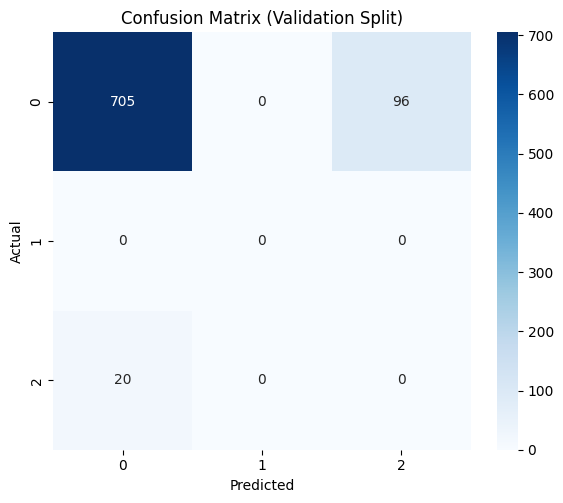

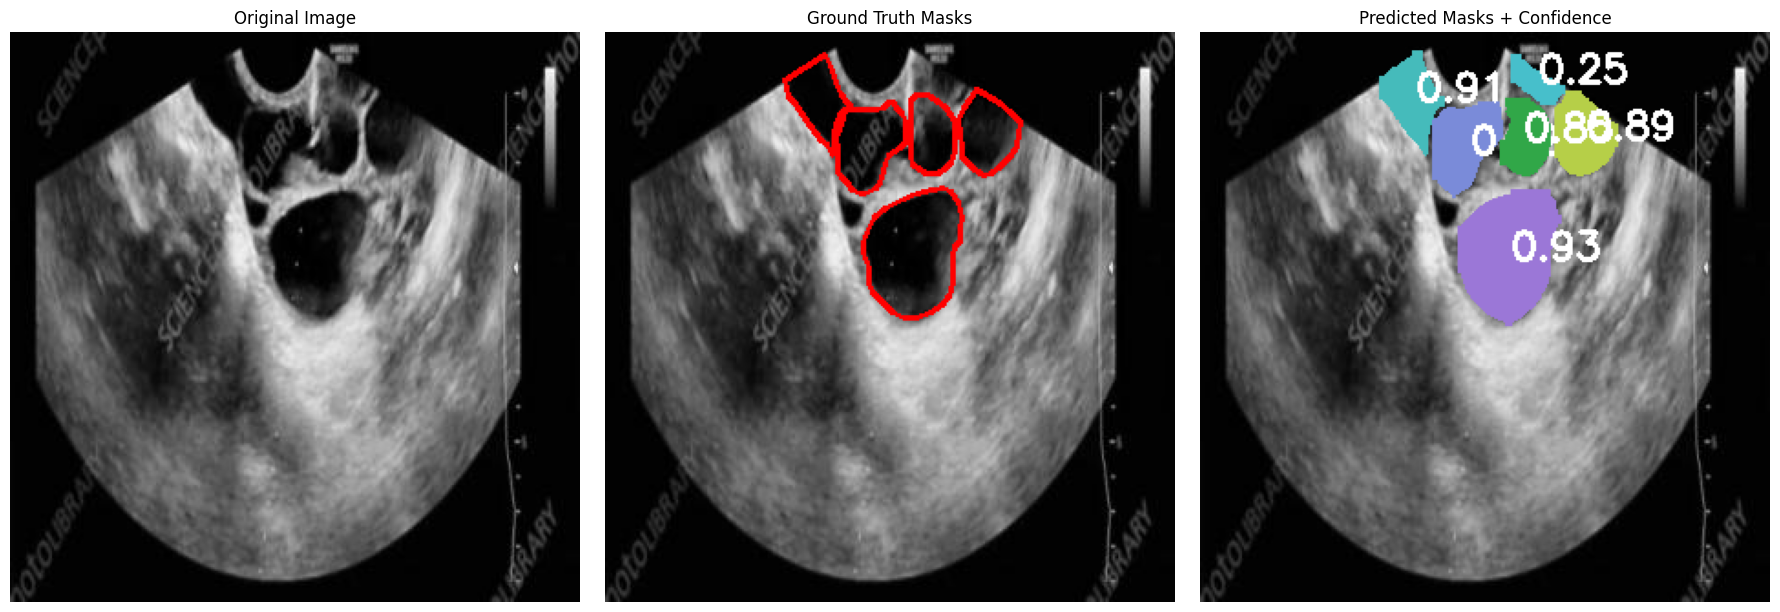


✅ Validation DataFrame saved to: /content/drive/MyDrive/follicle_yolo_project/results/validation_evaluation_final_v4/val_follicle_analysis_mask_area.csv

📄 First 10 rows (validation):
                                            frame_id  num_follicles  \
0  frame_0000092_jpg.rf.347e25ef9f541ffdd06fff09a...              3   
1  frame_0000092_jpg.rf.a5d76da84cb5729864a050e5b...              3   
2  frame_00001_jpg.rf.904ff2c65f374d0632d219d89ab...              0   
3  frame_00002_jpg.rf.0ebfd9cf9f7b811461547e00c01...              2   
4  frame_00002_jpg.rf.ded70bc8a585b1354d366d462b1...              2   
5  frame_00003_jpg.rf.1bbd56a4622abd9f33a0cb63b27...              4   
6  frame_00003_jpg.rf.64d5f1d58a128638e949d22a4fc...              4   
7  frame_00003_jpg.rf.e1ba8f9e4fd5fa88654c2fdbade...              4   
8  frame_000042_jpg.rf.ccd0ffb021c3c99e9557256f56...             11   
9  frame_0000836_jpg.rf.5ee936b8129323b8b762078db...              2   

   num_mature  num_immature  larg

In [15]:
# =======================================================
# ✅ Final Validation Split Evaluation
#    - Accuracy from confusion matrix
#    - Follicle size estimation from mask area
# =======================================================
from ultralytics import YOLO
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import random
import math

# --- Mount Google Drive ---
drive.mount('/content/drive')

# --- Paths (based on your current folder structure) ---
model_path = "/content/drive/MyDrive/follicle_yolo_project/results/final_fine_tuning_v4/final_fine_tune_v4/weights/best.pt"
val_images_path = "/content/drive/MyDrive/follicle_yolo_project/split_dataset/val/images"
val_labels_path = "/content/drive/MyDrive/follicle_yolo_project/split_dataset/val/labels"
val_yaml = "/content/drive/MyDrive/follicle_yolo_project/yamls/train_val_dataset.yaml"
save_dir = "/content/drive/MyDrive/follicle_yolo_project/results/validation_evaluation_final_v4"
os.makedirs(save_dir, exist_ok=True)

# --- Load YOLO model ---
model = YOLO(model_path)

# --------------------------
# 1) Run validation (val split)
# --------------------------
results = model.val(data=val_yaml, split="val", save_json=True)
metrics = results.results_dict

# --- YOLO-reported metrics ---
precision = metrics.get("metrics/precision(B)", 0)
recall = metrics.get("metrics/recall(B)", 0)
f1 = 2 * ((precision * recall) / (precision + recall + 1e-8))
map50 = metrics.get("metrics/mAP50(B)", 0)
map95 = metrics.get("metrics/mAP50-95(B)", 0)

# --- Confusion matrix ---
conf_matrix = results.confusion_matrix.matrix if hasattr(results, "confusion_matrix") else None

# --- Accuracy strictly from confusion matrix ---
if conf_matrix is not None and conf_matrix.sum() > 0:
    accuracy_cm = np.trace(conf_matrix) / conf_matrix.sum()
else:
    accuracy_cm = 0.0

print("\n📊 Evaluation Metrics (Validation Split):")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"mAP@50: {map50:.4f}")
print(f"mAP@50–95: {map95:.4f}")
print(f"\n✅ Accuracy (FROM CONFUSION MATRIX): {accuracy_cm:.4f}")

# --- Confusion Matrix Plot ---
if conf_matrix is not None:
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="Blues", square=True)
    plt.title("Confusion Matrix (Validation Split)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, "confusion_matrix_val.png"))
    plt.show()

# --------------------------
# 2) Ultrasound calibration (mm per pixel)
# --------------------------
PIXEL_TO_MM = 0.10  # adjust if you know actual ultrasound scaling

# --------------------------
# 3) Visualize one random validation sample
# --------------------------
def random_color():
    return tuple(np.random.randint(40, 220, 3).tolist())

sample_img = random.choice([f for f in os.listdir(val_images_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
sample_path = os.path.join(val_images_path, sample_img)
label_path = os.path.join(val_labels_path, os.path.splitext(sample_img)[0] + ".txt")

orig_bgr = cv2.imread(sample_path)
orig_img = cv2.cvtColor(orig_bgr, cv2.COLOR_BGR2RGB)

# --- Ground Truth Overlay ---
gt_img = orig_img.copy()
if os.path.exists(label_path):
    with open(label_path, 'r') as lf:
        for line in lf:
            parts = line.strip().split()
            if len(parts) >= 3:
                coords = np.array(parts[1:], dtype=float)
                if coords.size >= 4:
                    coords = coords.reshape(-1, 2)
                    h, w = gt_img.shape[:2]
                    coords[:, 0] *= w
                    coords[:, 1] *= h
                    pts = coords.astype(np.int32)
                    cv2.polylines(gt_img, [pts], isClosed=True, color=(255, 0, 0), thickness=2)

# --- Predictions ---
pred = model.predict(sample_path, conf=0.25, verbose=False)[0]
pred_img = orig_img.copy()
if getattr(pred, "masks", None) is not None and len(pred.masks.xy):
    confs = pred.boxes.conf.cpu().numpy() if pred.boxes is not None else []
    for i, poly in enumerate(pred.masks.xy):
        pts = np.array(poly, dtype=np.int32)
        color = random_color()
        cv2.fillPoly(pred_img, [pts], color)
        cx, cy = int(np.mean(pts[:, 0])), int(np.mean(pts[:, 1]))
        conf_text = f"{confs[i]:.2f}" if i < len(confs) else "0.00"
        cv2.putText(pred_img, conf_text, (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
else:
    if pred.boxes is not None and len(pred.boxes):
        boxes_xyxy = pred.boxes.xyxy.cpu().numpy()
        confs = pred.boxes.conf.cpu().numpy()
        for (x1, y1, x2, y2), c in zip(boxes_xyxy, confs):
            x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
            cv2.rectangle(pred_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(pred_img, f"{c:.2f}", (x1, y1 - 6), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 0), 2)

# --- Display comparison ---
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(orig_img); axs[0].set_title("Original Image"); axs[0].axis("off")
axs[1].imshow(gt_img); axs[1].set_title("Ground Truth Masks"); axs[1].axis("off")
axs[2].imshow(pred_img); axs[2].set_title("Predicted Masks + Confidence"); axs[2].axis("off")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "sample_instance_comparison_val.png"))
plt.show()

# --------------------------
# 4) Follicle metrics per image using mask area
# --------------------------
records = []
for f in sorted(os.listdir(val_images_path)):
    if not f.lower().endswith(('.jpg', '.png', '.jpeg')):
        continue

    img_path = os.path.join(val_images_path, f)
    pred = model.predict(img_path, conf=0.25, verbose=False)[0]

    sizes_mm, confs = [], []
    if getattr(pred, "masks", None) is not None and len(pred.masks.xy):
        for poly, c in zip(pred.masks.xy, (pred.boxes.conf.cpu().numpy() if pred.boxes is not None else [])):
            pts = np.array(poly, dtype=np.int32)
            area_px = abs(cv2.contourArea(pts))
            if area_px <= 0:
                continue
            diam_px = 2.0 * math.sqrt(area_px / math.pi)
            diam_mm = diam_px * PIXEL_TO_MM
            sizes_mm.append(diam_mm)
            confs.append(float(c))
    else:
        boxes = pred.boxes.xywh.cpu().numpy() if pred.boxes is not None else np.empty((0, 4))
        conf_arr = pred.boxes.conf.cpu().numpy() if pred.boxes is not None else np.empty((0,))
        for b, c in zip(boxes, conf_arr):
            w_px = b[2]
            diam_mm = (w_px * PIXEL_TO_MM)
            sizes_mm.append(diam_mm)
            confs.append(float(c))

    num_follicles = len(sizes_mm)
    largest = max(sizes_mm) if sizes_mm else 0.0
    num_mature = int(sum(18.0 <= s <= 22.0 for s in sizes_mm))
    num_immature = int(sum(s < 18.0 for s in sizes_mm))
    ready_for_retrieval = int(largest >= 18.0)
    highest_conf = float(max(confs)) if confs else 0.0

    records.append({
        "frame_id": f,
        "num_follicles": num_follicles,
        "num_mature": num_mature,
        "num_immature": num_immature,
        "largest_follicle_mm": round(float(largest), 2),
        "ready_for_retrieval": ready_for_retrieval,
        "highest_confidence": round(float(highest_conf), 3)
    })

df_val = pd.DataFrame(records)
csv_path = os.path.join(save_dir, "val_follicle_analysis_mask_area.csv")
df_val.to_csv(csv_path, index=False)

print(f"\n✅ Validation DataFrame saved to: {csv_path}")
print("\n📄 First 10 rows (validation):")
print(df_val.head(10))


In [18]:
# ===========================================================
# 🔥 Final Fine-Tuning from Best Model (v3) — v5 Stable Training
# ===========================================================
from ultralytics import YOLO
import os
from google.colab import drive

# --- Mount Drive ---
drive.mount('/content/drive')

# --- Paths ---
base_dir = "/content/drive/MyDrive/follicle_yolo_project"
prev_model_path = f"{base_dir}/results/final_model_training_stable/final_tuned_anti_overfit_v3/weights/best.pt"
save_dir = f"{base_dir}/results/final_fine_tuning_v5"
os.makedirs(save_dir, exist_ok=True)

# --- Load best (v3) model ---
model = YOLO(prev_model_path)

# --- Continue training (v3 ➜ v5) ---
model.train(
    data=f"{base_dir}/yamls/train_val_dataset.yaml",
    epochs=80,
    patience=15,
    imgsz=640,
    batch=8,
    workers=2,
    optimizer="AdamW",
    lr0=0.0003,
    lrf=0.03,
    momentum=0.93,
    weight_decay=0.0007,
    dropout=0.3,              # 🔹 slightly stronger regularization
    label_smoothing=0.1,
    warmup_epochs=2,
    cos_lr=True,
    deterministic=True,
    seed=42,

    # --- Aggressive augmentations to reduce overfit ---
    mosaic=1.0,
    mixup=0.2,
    copy_paste=0.15,
    scale=0.85,
    translate=0.25,
    degrees=3.0,
    perspective=0.001,
    fliplr=0.5,
    hsv_h=0.03,
    hsv_s=0.6,
    hsv_v=0.5,
    erasing=0.6,
    auto_augment="randaugment",

    # --- Training control ---
    pretrained=True,
    freeze=0,                  # unfreeze all
    val=True,
    cache="disk",
    project=save_dir,
    name="final_fine_tune_v5",
    exist_ok=True
)

print("✅ Fine-tuning (v3 → v5) completed successfully! 🎯")
print(f"Results saved in: {save_dir}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in the future.
Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=disk, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.15, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/drive/MyDrive/follicle_yolo_project/yamls/train_val_dataset.yaml, degrees=3.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.3, dynamic=False, embed=None, epochs=80, erasing=0.6, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=0, half=False, hsv_h=0.03, hsv_s=0.6, hsv_v=0.5, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0003, lrf=0.03, mask_ratio=4, 

/usr/local/lib/python3.12/dist-packages/ultralytics/data/augment.py:1209: RuntimeWarning: divide by zero encountered in divide
  xy = xy[:, :2] / xy[:, 2:3]


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 13/13 3.3it/s 3.9s
                   all        205        725      0.907      0.931      0.966      0.785      0.914      0.938      0.973      0.756

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size
      15/80      3.31G      0.888      1.334     0.5648      1.009         21        640: 100% ━━━━━━━━━━━━ 103/103 2.9it/s 35.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 13/13 2.5it/s 5.2s
                   all        205        725        0.9      0.948      0.971      0.783      0.903       0.95      0.974       0.75

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size
      16/80      3.31G      0.875      1.322     0.5626     0.9979         13     

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,374 parameters, 0 gradients, 39.9 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.3 ms, read: 7.3±2.6 MB/s, size: 13.3 KB)
val: Scanning /content/drive/MyDrive/follicle_yolo_project/split_dataset/train/labels.cache... 818 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 818/818 1.1Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 52/52 1.4it/s 37.0s
                   all        818       2821      0.964      0.981      0.992      0.851      0.963       0.98      0.992      0.806
     immature_follicle        818       2821      0.964      0.981      0.992      0.851      0.963       0.98      0.992      0.806
Speed: 1.6

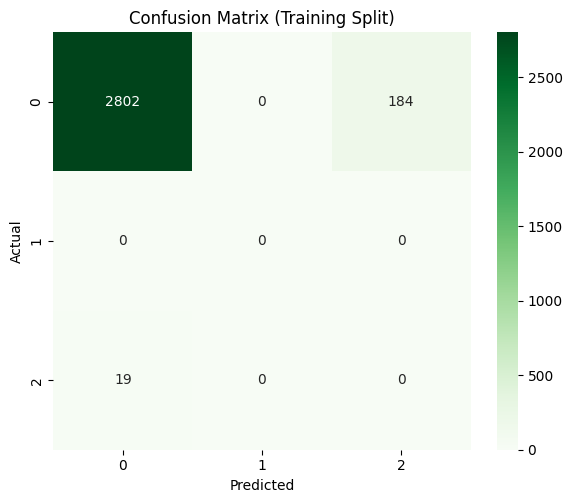

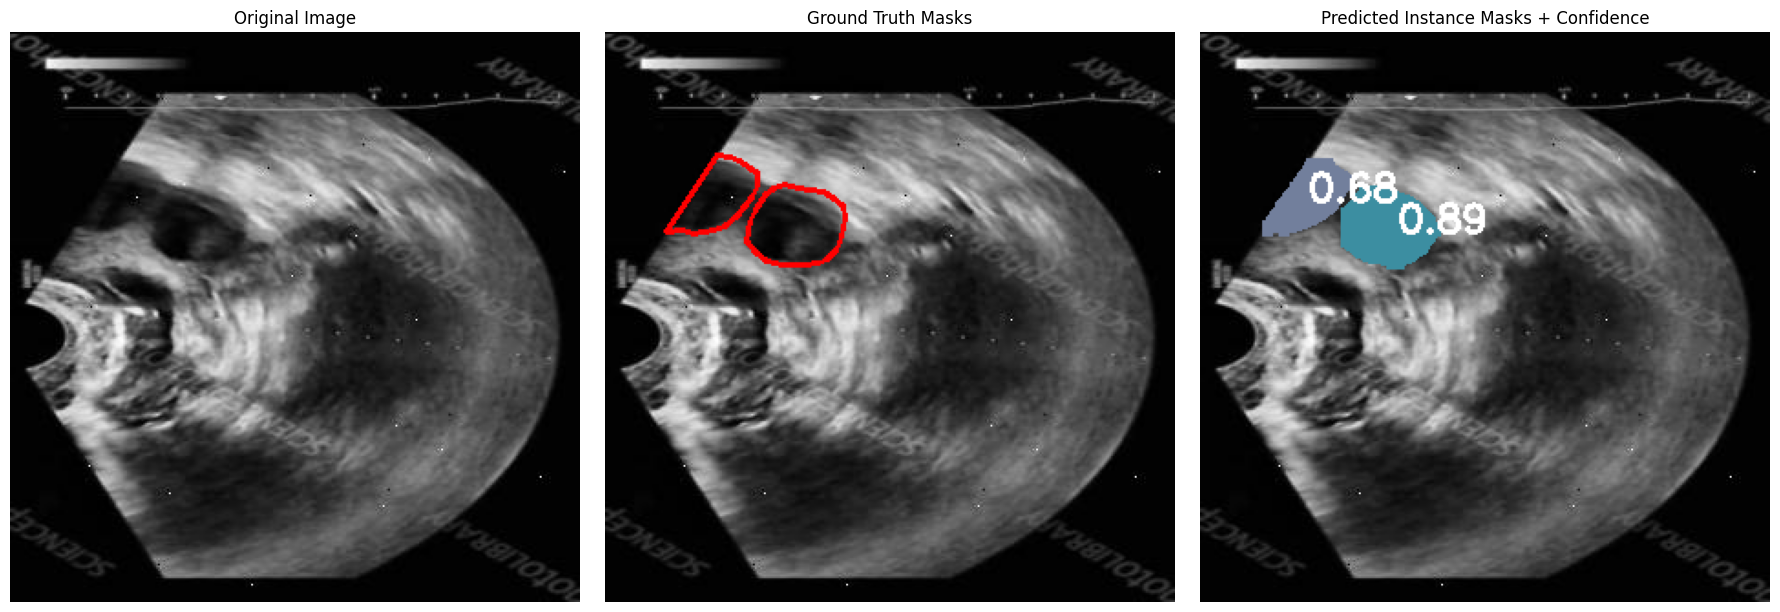


✅ Training DataFrame saved to: /content/drive/MyDrive/follicle_yolo_project/results/training_evaluation_final_v5/train_follicle_analysis_mask_area.csv

📄 First 10 rows (training):
                                            frame_id  num_follicles  \
0  frame_0000092_jpg.rf.74fe05a035be082a6713cf3ba...              3   
1  frame_00001_jpg.rf.6ee1dcdde24785ab903a62470be...              1   
2  frame_00001_jpg.rf.ca5429d8265e0ed96e4cdcb5738...              1   
3  frame_00002_jpg.rf.c75aed1ce2df7ee925be5ab6424...              2   
4  frame_0000342_jpg.rf.cf5b9bb8087722792f0efc8ed...              3   
5  frame_0000342_jpg.rf.d033e3fc1990b9f827fefcf30...              2   
6  frame_0000342_jpg.rf.e3a7f8cc04b18f3caaa1988df...              2   
7  frame_000042_jpg.rf.357a531ae7984987606cdee28b...             11   
8  frame_000042_jpg.rf.ad1c0124beac69b6133c91f2dd...             11   
9  frame_0000836_jpg.rf.263792c105503369762154e68...              2   

   num_mature  num_immature  largest_

In [20]:
# =======================================================
# ✅ Final: Training-split Evaluation — Accuracy from confusion matrix + Mask-area based follicle sizes
# =======================================================
from ultralytics import YOLO
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import random
import math

# --- Mount Google Drive ---
drive.mount('/content/drive')

# --- Paths (UPDATED for v5 model) ---
model_path = "/content/drive/MyDrive/follicle_yolo_project/results/final_fine_tuning_v5/final_fine_tune_v5/weights/best.pt"
train_images_path = "/content/drive/MyDrive/follicle_yolo_project/split_dataset/train/images"
train_labels_path = "/content/drive/MyDrive/follicle_yolo_project/split_dataset/train/labels"
train_yaml = "/content/drive/MyDrive/follicle_yolo_project/yamls/train_val_dataset.yaml"
save_dir = "/content/drive/MyDrive/follicle_yolo_project/results/training_evaluation_final_v5"
os.makedirs(save_dir, exist_ok=True)

# --- Load YOLO model ---
model = YOLO(model_path)

# --------------------------
# 1) Run validation (train split evaluation)
# --------------------------
results = model.val(data=train_yaml, split="train", save_json=True)
metrics = results.results_dict

# --- YOLO-reported metrics ---
precision = metrics.get("metrics/precision(B)", 0)
recall = metrics.get("metrics/recall(B)", 0)
f1 = 2 * ((precision * recall) / (precision + recall + 1e-8))
map50 = metrics.get("metrics/mAP50(B)", 0)
map95 = metrics.get("metrics/mAP50-95(B)", 0)

# --- Confusion matrix ---
conf_matrix = results.confusion_matrix.matrix if hasattr(results, "confusion_matrix") else None

# --- Accuracy strictly from confusion matrix ---
if conf_matrix is not None and conf_matrix.sum() > 0:
    accuracy_cm = np.trace(conf_matrix) / conf_matrix.sum()
else:
    accuracy_cm = 0.0

print("\n📊 Evaluation Metrics (Training Split):")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"mAP@50: {map50:.4f}")
print(f"mAP@50–95: {map95:.4f}")
print(f"\n✅ Accuracy (FROM CONFUSION MATRIX only): {accuracy_cm:.4f}")

# --- Confusion Matrix Plot ---
if conf_matrix is not None:
    plt.figure(figsize=(6,5))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="Greens", square=True)
    plt.title("Confusion Matrix (Training Split)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, "confusion_matrix_train.png"))
    plt.show()

# --------------------------
# 2) Ultrasound scale calibration
# --------------------------
PIXEL_TO_MM = 0.10  # Adjust this if you have specific scaling info

# --------------------------
# 3) Visualize one random training sample
# --------------------------
def random_color():
    return tuple(np.random.randint(40, 220, 3).tolist())

sample_img = random.choice([f for f in os.listdir(train_images_path) if f.lower().endswith(('.jpg','.png','.jpeg'))])
sample_path = os.path.join(train_images_path, sample_img)
label_path = os.path.join(train_labels_path, os.path.splitext(sample_img)[0] + ".txt")

orig_bgr = cv2.imread(sample_path)
orig_img = cv2.cvtColor(orig_bgr, cv2.COLOR_BGR2RGB)

# Ground Truth Overlay
gt_img = orig_img.copy()
if os.path.exists(label_path):
    with open(label_path, 'r') as lf:
        for line in lf:
            parts = line.strip().split()
            if len(parts) >= 3:
                coords = np.array(parts[1:], dtype=float)
                if coords.size >= 4:
                    coords = coords.reshape(-1, 2)
                    h, w = gt_img.shape[:2]
                    coords[:,0] *= w
                    coords[:,1] *= h
                    pts = coords.astype(np.int32)
                    cv2.polylines(gt_img, [pts], isClosed=True, color=(255,0,0), thickness=2)

# Predictions
pred = model.predict(sample_path, conf=0.25, verbose=False)[0]
pred_img = orig_img.copy()
if getattr(pred, "masks", None) is not None and len(pred.masks.xy):
    confs = pred.boxes.conf.cpu().numpy() if pred.boxes is not None else []
    for i, poly in enumerate(pred.masks.xy):
        pts = np.array(poly, dtype=np.int32)
        color = random_color()
        cv2.fillPoly(pred_img, [pts], color)
        cx, cy = int(np.mean(pts[:,0])), int(np.mean(pts[:,1]))
        conf_text = f"{confs[i]:.2f}" if i < len(confs) else "0.00"
        cv2.putText(pred_img, conf_text, (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2)
else:
    if pred.boxes is not None and len(pred.boxes):
        boxes_xyxy = pred.boxes.xyxy.cpu().numpy()
        confs = pred.boxes.conf.cpu().numpy()
        for (x1,y1,x2,y2), c in zip(boxes_xyxy, confs):
            x1, y1, x2, y2 = map(int, [x1,y1,x2,y2])
            cv2.rectangle(pred_img, (x1,y1), (x2,y2), (0,255,0), 2)
            cv2.putText(pred_img, f"{c:.2f}", (x1, y1-6), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,0), 2)

# Show visualization
fig, axs = plt.subplots(1,3, figsize=(18,6))
axs[0].imshow(orig_img); axs[0].set_title("Original Image"); axs[0].axis("off")
axs[1].imshow(gt_img); axs[1].set_title("Ground Truth Masks"); axs[1].axis("off")
axs[2].imshow(pred_img); axs[2].set_title("Predicted Instance Masks + Confidence"); axs[2].axis("off")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "sample_instance_comparison_train.png"))
plt.show()

# --------------------------
# 4) Build follicle metrics dataframe using mask area → mm
# --------------------------
records = []
for f in sorted(os.listdir(train_images_path)):
    if not f.lower().endswith(('.jpg','.png','.jpeg')):
        continue
    img_path = os.path.join(train_images_path, f)
    pred = model.predict(img_path, conf=0.25, verbose=False)[0]

    sizes_mm, confs = [], []
    if getattr(pred, "masks", None) is not None and len(pred.masks.xy):
        for poly, c in zip(pred.masks.xy, (pred.boxes.conf.cpu().numpy() if pred.boxes is not None else [])):
            pts = np.array(poly, dtype=np.int32)
            area_px = abs(cv2.contourArea(pts))
            if area_px <= 0: continue
            diam_px = 2.0 * math.sqrt(area_px / math.pi)
            diam_mm = diam_px * PIXEL_TO_MM
            sizes_mm.append(diam_mm)
            confs.append(float(c))
    else:
        boxes = pred.boxes.xywh.cpu().numpy() if pred.boxes is not None else np.empty((0,4))
        conf_arr = pred.boxes.conf.cpu().numpy() if pred.boxes is not None else np.empty((0,))
        for b, c in zip(boxes, conf_arr):
            w_px = b[2]
            diam_mm = (w_px * PIXEL_TO_MM)
            sizes_mm.append(diam_mm)
            confs.append(float(c))

    num_follicles = len(sizes_mm)
    largest = max(sizes_mm) if sizes_mm else 0.0
    num_mature = int(sum(18.0 <= s <= 22.0 for s in sizes_mm))
    num_immature = int(sum(s < 18.0 for s in sizes_mm))
    ready_for_retrieval = int(largest >= 18.0)
    highest_conf = float(max(confs)) if confs else 0.0

    records.append({
        "frame_id": f,
        "num_follicles": num_follicles,
        "num_mature": num_mature,
        "num_immature": num_immature,
        "largest_follicle_mm": round(float(largest), 2),
        "ready_for_retrieval": ready_for_retrieval,
        "highest_confidence": round(float(highest_conf), 3)
    })

df_train = pd.DataFrame(records)
csv_path = os.path.join(save_dir, "train_follicle_analysis_mask_area.csv")
df_train.to_csv(csv_path, index=False)

print(f"\n✅ Training DataFrame saved to: {csv_path}")
print("\n📄 First 10 rows (training):")
print(df_train.head(10))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Validation YAML created at: /content/drive/MyDrive/follicle_yolo_project/yamls/val_only_dataset.yaml
---- YAML contents ----
names:
- follicle
nc: 1
train: /content/drive/MyDrive/follicle_yolo_project/split_dataset/val/images
val: /content/drive/MyDrive/follicle_yolo_project/split_dataset/val/images

-----------------------
Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,374 parameters, 0 gradients, 39.9 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.3 ms, read: 7.9±2.3 MB/s, size: 13.3 KB)
val: Scanning /content/drive/MyDrive/follicle_yolo_project/split_dataset/val/labels.cache... 205 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 205/205 239.4Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP5

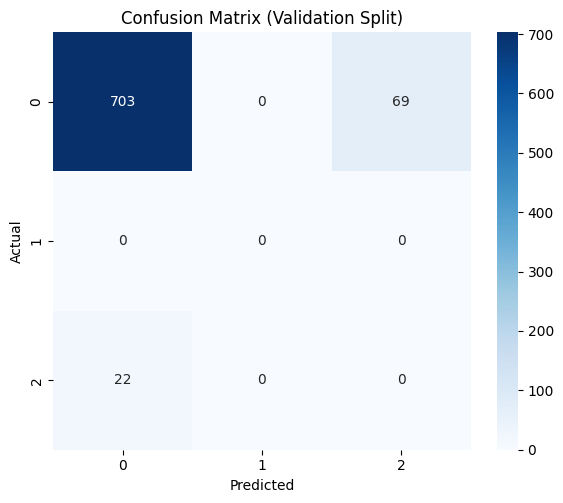

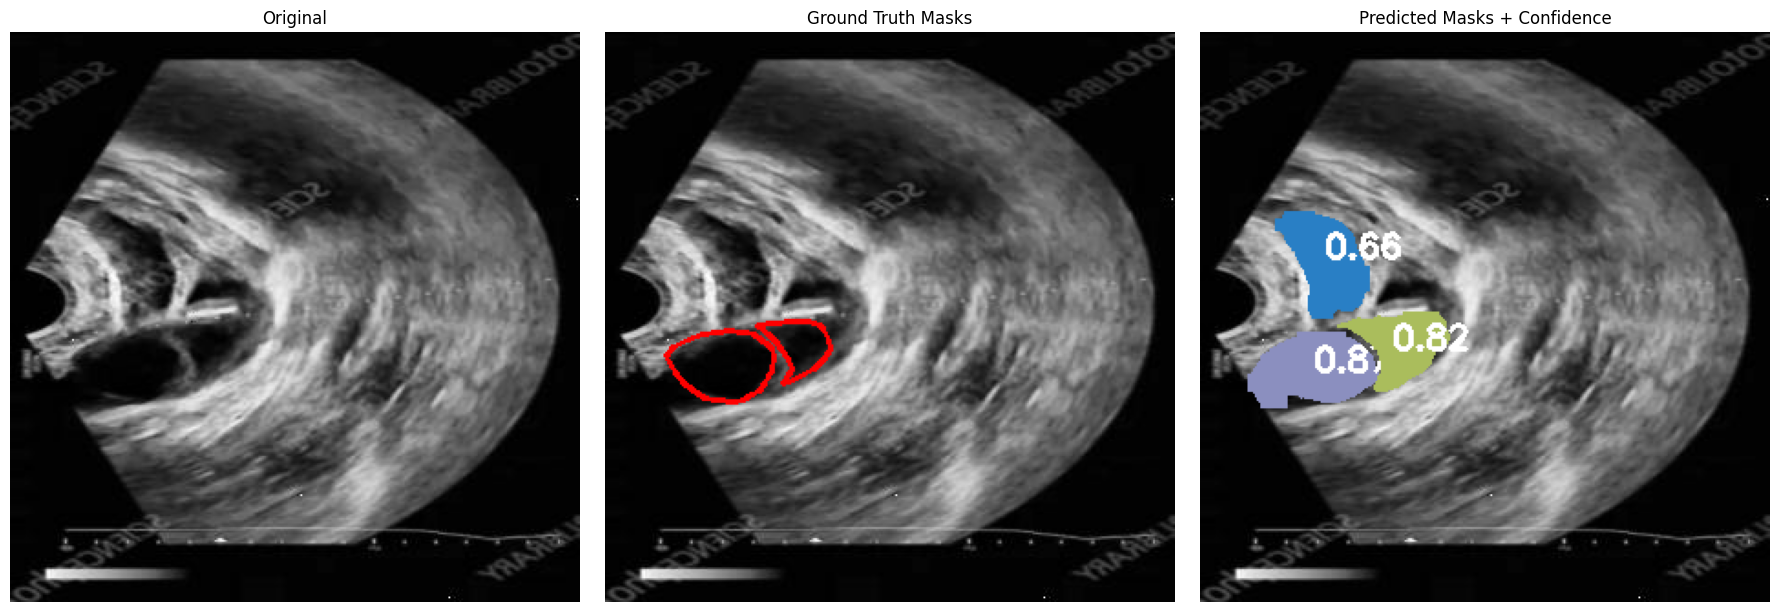


✅ Validation analysis CSV saved: /content/drive/MyDrive/follicle_yolo_project/results/validation_evaluation_anti_overfit_v1/val_follicle_analysis_mask_area.csv

📄 First 10 rows:
                                            frame_id  num_follicles  \
0  frame_0000092_jpg.rf.347e25ef9f541ffdd06fff09a...              3   
1  frame_0000092_jpg.rf.a5d76da84cb5729864a050e5b...              3   
2  frame_00001_jpg.rf.904ff2c65f374d0632d219d89ab...              0   
3  frame_00002_jpg.rf.0ebfd9cf9f7b811461547e00c01...              2   
4  frame_00002_jpg.rf.ded70bc8a585b1354d366d462b1...              2   
5  frame_00003_jpg.rf.1bbd56a4622abd9f33a0cb63b27...              3   
6  frame_00003_jpg.rf.64d5f1d58a128638e949d22a4fc...              3   
7  frame_00003_jpg.rf.e1ba8f9e4fd5fa88654c2fdbade...              4   
8  frame_000042_jpg.rf.ccd0ffb021c3c99e9557256f56...             12   
9  frame_0000836_jpg.rf.5ee936b8129323b8b762078db...              2   

   num_mature  num_immature  largest_fo

In [21]:
# =======================================================
# ✅ Final: Validation-split Evaluation — Accuracy + Mask-area follicle metrics
# =======================================================
from ultralytics import YOLO
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import random
import math
import yaml
import sys

# --- Mount Google Drive ---
drive.mount('/content/drive')

# --- Paths (NO model path change as requested) ---
model_path = "/content/drive/MyDrive/follicle_yolo_project/results/train/anti_overfit_v1/follicle_segmentation_anti_overfit/weights/best.pt"
val_images_path = "/content/drive/MyDrive/follicle_yolo_project/split_dataset/val/images"
val_labels_path = "/content/drive/MyDrive/follicle_yolo_project/split_dataset/val/labels"
val_yaml_path = "/content/drive/MyDrive/follicle_yolo_project/yamls/val_only_dataset.yaml"
save_dir = "/content/drive/MyDrive/follicle_yolo_project/results/validation_evaluation_anti_overfit_v1"
os.makedirs(save_dir, exist_ok=True)

# --- Basic path checks ---
if not os.path.exists(model_path):
    print(f"ERROR: model_path does not exist: {model_path}")
    raise FileNotFoundError(model_path)
if not os.path.isdir(val_images_path):
    print(f"ERROR: val_images_path does not exist or is not a directory: {val_images_path}")
    raise FileNotFoundError(val_images_path)
if not os.path.isdir(val_labels_path):
    print(f"WARNING: val_labels_path does not exist or is not a directory (ground-truth overlays will be skipped): {val_labels_path}")

# -------------------------------------------------------
# 1) ✅ Create validation-only YAML dynamically (train key required)
# -------------------------------------------------------
# Ultralytics requires both 'train' and 'val' keys in the data YAML.
# We'll supply 'train' as the same folder (dummy) so val() accepts it.
val_yaml_data = {
    "train": val_images_path,   # dummy (allowed) — YOLO expects a 'train' key
    "val": val_images_path,
    "nc": 1,                    # number of classes (adjust if you have >1)
    "names": ["follicle"]       # class name(s)
}

# Write YAML using safe_dump to ensure proper mapping format
with open(val_yaml_path, 'w') as f:
    yaml.safe_dump(val_yaml_data, f, default_flow_style=False)

print(f"✅ Validation YAML created at: {val_yaml_path}")
print("---- YAML contents ----")
with open(val_yaml_path, 'r') as f:
    print(f.read())
print("-----------------------")

# --- Load YOLO model ---
model = YOLO(model_path)

# -------------------------------------------------------
# 2) Run validation (val split)
# -------------------------------------------------------
results = model.val(data=val_yaml_path, split="val", save_json=True)
metrics = results.results_dict

# --- YOLO metrics ---
precision = metrics.get("metrics/precision(B)", 0)
recall = metrics.get("metrics/recall(B)", 0)
f1 = 2 * ((precision * recall) / (precision + recall + 1e-8))
map50 = metrics.get("metrics/mAP50(B)", 0)
map95 = metrics.get("metrics/mAP50-95(B)", 0)

# --- Confusion matrix ---
conf_matrix = results.confusion_matrix.matrix if hasattr(results, "confusion_matrix") else None
if conf_matrix is not None and conf_matrix.sum() > 0:
    accuracy_cm = np.trace(conf_matrix) / conf_matrix.sum()
else:
    accuracy_cm = 0.0

print("\n📊 Evaluation Metrics (Validation Split):")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"mAP@50:    {map50:.4f}")
print(f"mAP@50-95: {map95:.4f}")
print(f"✅ Accuracy (Confusion Matrix): {accuracy_cm:.4f}")

# --- Plot confusion matrix ---
if conf_matrix is not None:
    plt.figure(figsize=(6,5))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="Blues", square=True)
    plt.title("Confusion Matrix (Validation Split)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, "confusion_matrix_val.png"))
    plt.show()

# -------------------------------------------------------
# 3) Set ultrasound pixel → mm calibration
# -------------------------------------------------------
PIXEL_TO_MM = 0.10  # adjust if you have a known conversion

# -------------------------------------------------------
# 4) Visualize one random validation image
# -------------------------------------------------------
def random_color():
    return tuple(np.random.randint(40, 220, 3).tolist())

sample_candidates = [f for f in os.listdir(val_images_path) if f.lower().endswith(('.jpg','.png','.jpeg'))]
if not sample_candidates:
    print("ERROR: No images found in val_images_path for visualization.")
    sys.exit(1)

sample_img = random.choice(sample_candidates)
sample_path = os.path.join(val_images_path, sample_img)
label_path = os.path.join(val_labels_path, os.path.splitext(sample_img)[0] + ".txt")

orig_bgr = cv2.imread(sample_path)
if orig_bgr is None:
    print(f"ERROR: OpenCV failed to read the sample image: {sample_path}")
    sys.exit(1)
orig_img = cv2.cvtColor(orig_bgr, cv2.COLOR_BGR2RGB)

# --- Ground truth overlay ---
gt_img = orig_img.copy()
if os.path.exists(label_path):
    with open(label_path, 'r') as lf:
        for line in lf:
            parts = line.strip().split()
            if len(parts) >= 3:
                coords = np.array(parts[1:], dtype=float)
                if coords.size >= 4:
                    coords = coords.reshape(-1, 2)
                    h, w = gt_img.shape[:2]
                    coords[:,0] *= w
                    coords[:,1] *= h
                    pts = coords.astype(np.int32)
                    cv2.polylines(gt_img, [pts], isClosed=True, color=(255,0,0), thickness=2)

# --- Predictions ---
pred = model.predict(sample_path, conf=0.25, verbose=False)[0]
pred_img = orig_img.copy()
if getattr(pred, "masks", None) is not None and len(pred.masks.xy):
    confs = pred.boxes.conf.cpu().numpy() if pred.boxes is not None else []
    for i, poly in enumerate(pred.masks.xy):
        pts = np.array(poly, dtype=np.int32)
        color = random_color()
        cv2.fillPoly(pred_img, [pts], color)
        cx, cy = int(np.mean(pts[:,0])), int(np.mean(pts[:,1]))
        conf_text = f"{confs[i]:.2f}" if i < len(confs) else "0.00"
        cv2.putText(pred_img, conf_text, (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 2)
else:
    if pred.boxes is not None and len(pred.boxes):
        boxes_xyxy = pred.boxes.xyxy.cpu().numpy()
        confs = pred.boxes.conf.cpu().numpy()
        for (x1,y1,x2,y2), c in zip(boxes_xyxy, confs):
            x1, y1, x2, y2 = map(int, [x1,y1,x2,y2])
            cv2.rectangle(pred_img, (x1,y1), (x2,y2), (0,255,0), 2)
            cv2.putText(pred_img, f"{c:.2f}", (x1, y1-6), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,0), 2)

# --- Show visualization ---
fig, axs = plt.subplots(1,3, figsize=(18,6))
axs[0].imshow(orig_img); axs[0].set_title("Original"); axs[0].axis("off")
axs[1].imshow(gt_img); axs[1].set_title("Ground Truth Masks"); axs[1].axis("off")
axs[2].imshow(pred_img); axs[2].set_title("Predicted Masks + Confidence"); axs[2].axis("off")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "sample_instance_comparison_val.png"))
plt.show()

# -------------------------------------------------------
# 5) Compute follicle size statistics using mask areas
# -------------------------------------------------------
records = []
for f in sorted(os.listdir(val_images_path)):
    if not f.lower().endswith(('.jpg','.png','.jpeg')):
        continue

    img_path = os.path.join(val_images_path, f)
    pred = model.predict(img_path, conf=0.25, verbose=False)[0]

    sizes_mm, confs = [], []
    if getattr(pred, "masks", None) is not None and len(pred.masks.xy):
        box_confs = pred.boxes.conf.cpu().numpy() if pred.boxes is not None else []
        for poly_idx, poly in enumerate(pred.masks.xy):
            pts = np.array(poly, dtype=np.int32)
            area_px = abs(cv2.contourArea(pts))
            if area_px <= 0:
                continue
            diam_px = 2.0 * math.sqrt(area_px / math.pi)
            diam_mm = diam_px * PIXEL_TO_MM
            sizes_mm.append(diam_mm)
            # try to fetch corresponding conf, fallback to 0.0
            conf_val = float(box_confs[poly_idx]) if poly_idx < len(box_confs) else 0.0
            confs.append(conf_val)
    else:
        boxes = pred.boxes.xywh.cpu().numpy() if pred.boxes is not None else np.empty((0,4))
        conf_arr = pred.boxes.conf.cpu().numpy() if pred.boxes is not None else np.empty((0,))
        for b, c in zip(boxes, conf_arr):
            diam_mm = b[2] * PIXEL_TO_MM
            sizes_mm.append(diam_mm)
            confs.append(float(c))

    num_follicles = len(sizes_mm)
    largest = max(sizes_mm) if sizes_mm else 0.0
    num_mature = int(sum(18.0 <= s <= 22.0 for s in sizes_mm))
    num_immature = int(sum(s < 18.0 for s in sizes_mm))
    ready_for_retrieval = int(largest >= 18.0)
    highest_conf = float(max(confs)) if confs else 0.0

    records.append({
        "frame_id": f,
        "num_follicles": num_follicles,
        "num_mature": num_mature,
        "num_immature": num_immature,
        "largest_follicle_mm": round(float(largest), 2),
        "ready_for_retrieval": ready_for_retrieval,
        "highest_confidence": round(highest_conf, 3)
    })

df_val = pd.DataFrame(records)
csv_path = os.path.join(save_dir, "val_follicle_analysis_mask_area.csv")
df_val.to_csv(csv_path, index=False)

print(f"\n✅ Validation analysis CSV saved: {csv_path}")
print("\n📄 First 10 rows:")
print(df_val.head(10))


In [22]:
# =======================================================
# ✅ Final Full Dataset Training + Random 15% Evaluation (YOLOv8-Seg)
# =======================================================
from ultralytics import YOLO
from sklearn.model_selection import train_test_split
import os, shutil, random, yaml
from google.colab import drive

# --- Mount Google Drive ---
drive.mount('/content/drive')

# =======================================================
# 📁 PATH CONFIGURATION
# =======================================================
base_dir = "/content/drive/MyDrive/follicle_yolo_project"
data_yaml = f"{base_dir}/data/data.yaml"
full_images_dir = f"{base_dir}/data/train/images"
full_labels_dir = f"{base_dir}/data/train/labels"

final_yaml_path = f"{base_dir}/yamls/final_full_dataset.yaml"
os.makedirs(os.path.dirname(final_yaml_path), exist_ok=True)

save_project = f"{base_dir}/results/final_full_training_v5"
os.makedirs(save_project, exist_ok=True)

# --- Model initialization (v5) ---
model_path = f"{base_dir}/results/final_fine_tuning_v5/final_fine_tune_v5/weights/best.pt"
model = YOLO(model_path)

print(f"✅ Loaded base model from: {model_path}")

# =======================================================
# ✂️ Split 15% random validation from full dataset
# =======================================================
all_images = [f for f in os.listdir(full_images_dir) if f.lower().endswith(('.jpg','.png','.jpeg'))]
train_imgs, val_imgs = train_test_split(all_images, test_size=0.15, random_state=42)

split_dir = f"{base_dir}/split_full_data"
train_img_dir = f"{split_dir}/train/images"
train_lbl_dir = f"{split_dir}/train/labels"
val_img_dir = f"{split_dir}/val/images"
val_lbl_dir = f"{split_dir}/val/labels"

for d in [train_img_dir, train_lbl_dir, val_img_dir, val_lbl_dir]:
    os.makedirs(d, exist_ok=True)

# --- Copy split data ---
def copy_data(img_list, src_img_dir, src_lbl_dir, dst_img_dir, dst_lbl_dir):
    for img_name in img_list:
        src_img = os.path.join(src_img_dir, img_name)
        lbl_name = os.path.splitext(img_name)[0] + ".txt"
        src_lbl = os.path.join(src_lbl_dir, lbl_name)
        if os.path.exists(src_img):
            shutil.copy(src_img, dst_img_dir)
        if os.path.exists(src_lbl):
            shutil.copy(src_lbl, dst_lbl_dir)

copy_data(train_imgs, full_images_dir, full_labels_dir, train_img_dir, train_lbl_dir)
copy_data(val_imgs, full_images_dir, full_labels_dir, val_img_dir, val_lbl_dir)

print(f"✅ Data split complete: {len(train_imgs)} train / {len(val_imgs)} val")

# =======================================================
# 🧾 Create YAML for full dataset
# =======================================================
yaml_data = {
    "train": train_img_dir,
    "val": val_img_dir,
    "nc": 1,
    "names": ["follicle"]
}
with open(final_yaml_path, "w") as f:
    yaml.safe_dump(yaml_data, f, default_flow_style=False)

print(f"✅ Final YAML saved at: {final_yaml_path}")

# =======================================================
# 🧠 Final Fine-Tuning Configuration
# =======================================================
model.train(
    data=final_yaml_path,
    epochs=100,
    batch=8,
    imgsz=640,
    lr0=0.00025,          # lowered learning rate
    lrf=0.05,
    optimizer="AdamW",
    momentum=0.93,
    weight_decay=0.0008,
    dropout=0.2,
    patience=25,          # early stop patience
    cos_lr=True,
    cache="disk",
    augment=True,
    auto_augment="randaugment",
    copy_paste=0.15,
    mixup=0.15,
    erasing=0.5,
    scale=0.8,
    translate=0.25,
    fliplr=0.5,
    perspective=0.0005,
    degrees=2.0,
    mosaic=0.8,
    close_mosaic=10,
    pretrained=True,
    project=save_project,
    name="final_full_dataset_v5_tuned",
    exist_ok=False,
    val=True,
    workers=2,
    deterministic=True
)

print("\n✅ Final fine-tuning started on full dataset (with 15% random eval split).")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Loaded base model from: /content/drive/MyDrive/follicle_yolo_project/results/final_fine_tuning_v5/final_fine_tune_v5/weights/best.pt
✅ Data split complete: 869 train / 154 val
✅ Final YAML saved at: /content/drive/MyDrive/follicle_yolo_project/yamls/final_full_dataset.yaml
Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=disk, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.15, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/drive/MyDrive/follicle_yolo_project/yamls/final_full_dataset.yaml, degrees=2.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.2, dynamic=False, embed=None, epochs=100, erasing=0.5, exist_ok=False, fliplr=0.5, flipud=0.0

Mounted at /content/drive
✅ Combined train + val into full_dataset.
✅ YAML created at: /content/drive/MyDrive/follicle_yolo_project/yamls/full_dataset.yaml
Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,374 parameters, 0 gradients, 39.9 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 6.3±3.0 MB/s, size: 14.6 KB)
val: Scanning /content/drive/MyDrive/follicle_yolo_project/full_dataset/labels... 1023 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1023/1023 35.4it/s 28.9s
val: New cache created: /content/drive/MyDrive/follicle_yolo_project/full_dataset/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 64/64 1.8it/s 35.9s
                   all       1023       3546      0.953      0.972      0.989      0.839      0.953      0.972      0.989      0.797
     immature_follicle       1

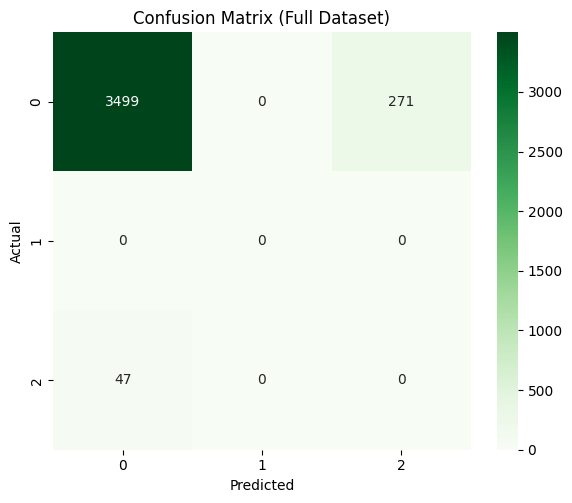

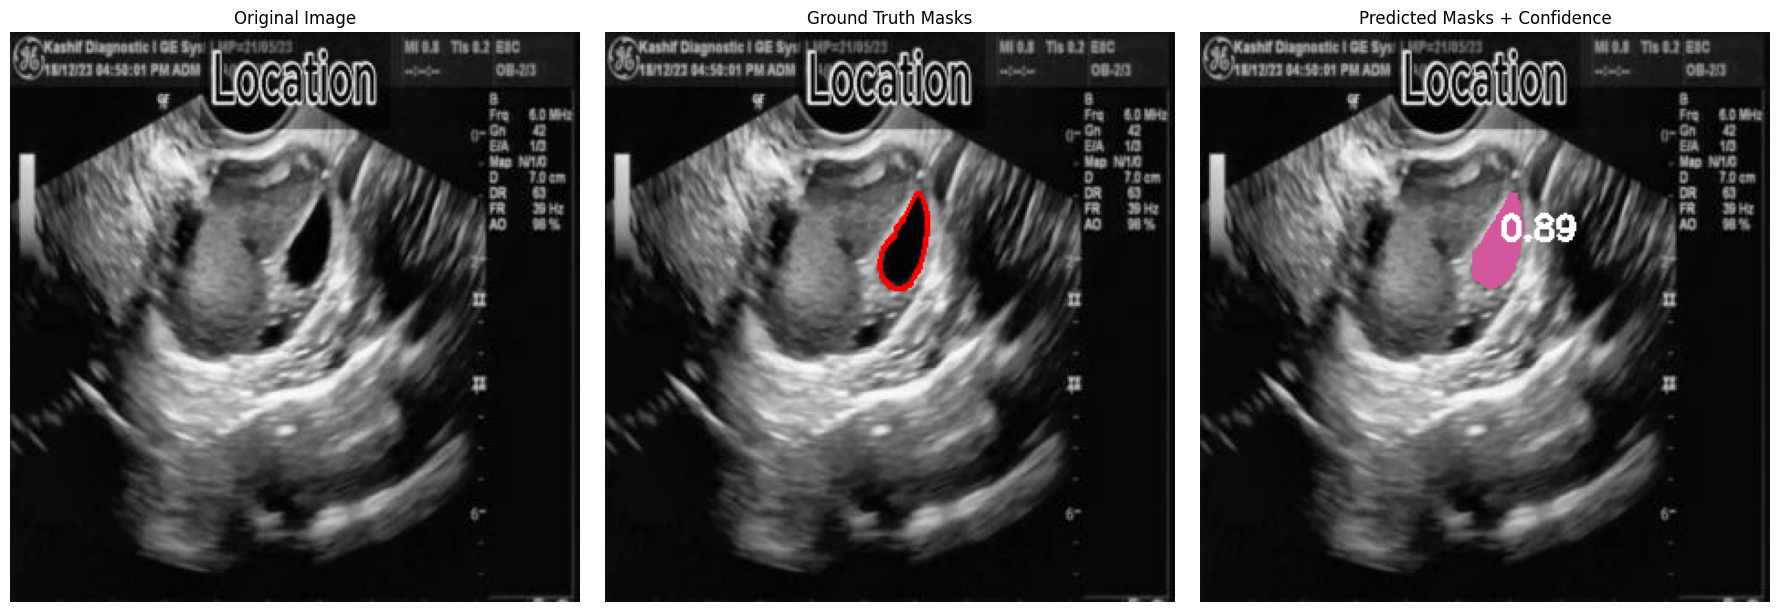


✅ CSV saved: /content/drive/MyDrive/follicle_yolo_project/results/final_evaluation_v5_full/full_dataset_follicle_analysis.csv

📄 First 10 rows:
                                            frame_id  num_follicles  \
0  frame_0000092_jpg.rf.347e25ef9f541ffdd06fff09a...              3   
1  frame_0000092_jpg.rf.74fe05a035be082a6713cf3ba...              3   
2  frame_0000092_jpg.rf.a5d76da84cb5729864a050e5b...              3   
3  frame_00001_jpg.rf.6ee1dcdde24785ab903a62470be...              1   
4  frame_00001_jpg.rf.904ff2c65f374d0632d219d89ab...              0   
5  frame_00001_jpg.rf.ca5429d8265e0ed96e4cdcb5738...              1   
6  frame_00002_jpg.rf.0ebfd9cf9f7b811461547e00c01...              2   
7  frame_00002_jpg.rf.c75aed1ce2df7ee925be5ab6424...              2   
8  frame_00002_jpg.rf.ded70bc8a585b1354d366d462b1...              2   
9  frame_0000342_jpg.rf.cf5b9bb8087722792f0efc8ed...              3   

   num_mature  num_immature  largest_follicle_mm  ready_for_retrieval  \


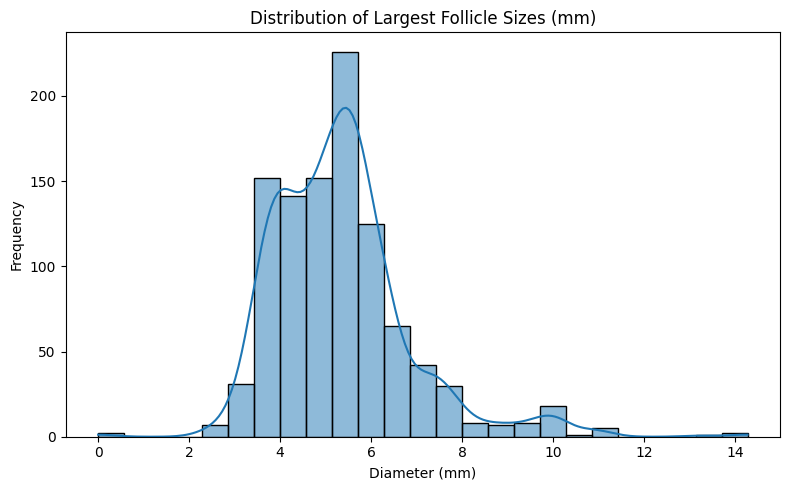

In [24]:
# =======================================================
# ✅ FINAL EVALUATION (v5 model) — Full Dataset (Train + Val Combined)
# =======================================================
from ultralytics import YOLO
import os, cv2, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from google.colab import drive
import random, math, yaml

# --- Mount Drive ---
drive.mount("/content/drive", force_remount=True)

# --- Base Paths ---
base_dir = "/content/drive/MyDrive/follicle_yolo_project"
train_images = f"{base_dir}/split_dataset/train/images"
train_labels = f"{base_dir}/split_dataset/train/labels"
val_images = f"{base_dir}/split_dataset/val/images"
val_labels = f"{base_dir}/split_dataset/val/labels"
full_images = f"{base_dir}/full_dataset/images"
full_labels = f"{base_dir}/full_dataset/labels"
os.makedirs(full_images, exist_ok=True)
os.makedirs(full_labels, exist_ok=True)

# --- Combine Train + Val into Full Dataset (only if not done yet) ---
if len(os.listdir(full_images)) == 0:
    !cp {train_images}/* {full_images}/
    !cp {val_images}/* {full_images}/
    !cp {train_labels}/* {full_labels}/
    !cp {val_labels}/* {full_labels}/
    print("✅ Combined train + val into full_dataset.")
else:
    print("✅ full_dataset already exists.")

# --- Paths for Model & Output ---
model_path = f"{base_dir}/results/final_fine_tuning_v5/final_fine_tune_v5/weights/best.pt"
yaml_path = f"{base_dir}/yamls/full_dataset.yaml"
save_dir = f"{base_dir}/results/final_evaluation_v5_full"
os.makedirs(save_dir, exist_ok=True)

# --- Verify paths ---
assert os.path.exists(model_path), f"Model not found: {model_path}"
assert os.path.isdir(full_images), f"Images folder missing: {full_images}"

# --- Create YAML dynamically ---
yaml_data = {
    "train": full_images,
    "val": full_images,
    "nc": 1,
    "names": ["follicle"]
}
with open(yaml_path, "w") as f:
    yaml.safe_dump(yaml_data, f)
print(f"✅ YAML created at: {yaml_path}")

# --- Load Model ---
model = YOLO(model_path)

# =======================================================
# 1️⃣ Evaluate on Full Dataset
# =======================================================
results = model.val(data=yaml_path, split="val", save_json=True)
metrics = results.results_dict

precision = metrics.get("metrics/precision(B)", 0)
recall = metrics.get("metrics/recall(B)", 0)
f1 = 2 * (precision * recall) / (precision + recall + 1e-8)
map50 = metrics.get("metrics/mAP50(B)", 0)
map95 = metrics.get("metrics/mAP50-95(B)", 0)

# --- Confusion Matrix & Accuracy ---
conf_matrix = getattr(results, "confusion_matrix", None)
if conf_matrix and hasattr(conf_matrix, "matrix"):
    matrix = conf_matrix.matrix
    accuracy_cm = np.trace(matrix) / matrix.sum()
else:
    accuracy_cm = 0.0
    matrix = None

print("\n📊 Evaluation Metrics (Full Dataset):")
print(f"Precision:     {precision:.4f}")
print(f"Recall:        {recall:.4f}")
print(f"F1 Score:      {f1:.4f}")
print(f"mAP@50:        {map50:.4f}")
print(f"mAP@50–95:     {map95:.4f}")
print(f"✅ Accuracy:   {accuracy_cm:.4f}")

# --- Plot Confusion Matrix ---
if matrix is not None:
    plt.figure(figsize=(6,5))
    sns.heatmap(matrix, annot=True, fmt=".0f", cmap="Greens", square=True)
    plt.title("Confusion Matrix (Full Dataset)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, "confusion_matrix_full.png"))
    plt.show()

# =======================================================
# 2️⃣ Visualization of Random Sample (Original + GT + Prediction)
# =======================================================
PIXEL_TO_MM = 0.10

def random_color():
    return tuple(np.random.randint(40, 220, 3).tolist())

sample_img = random.choice([f for f in os.listdir(full_images) if f.lower().endswith(('.jpg','.png','.jpeg'))])
sample_path = os.path.join(full_images, sample_img)
label_path = os.path.join(full_labels, os.path.splitext(sample_img)[0] + ".txt")

orig_bgr = cv2.imread(sample_path)
orig_img = cv2.cvtColor(orig_bgr, cv2.COLOR_BGR2RGB)

# --- Ground Truth Overlay ---
gt_img = orig_img.copy()
if os.path.exists(label_path):
    with open(label_path, 'r') as lf:
        for line in lf:
            parts = line.strip().split()
            if len(parts) >= 3:
                coords = np.array(parts[1:], dtype=float).reshape(-1, 2)
                h, w = gt_img.shape[:2]
                coords[:, 0] *= w
                coords[:, 1] *= h
                pts = coords.astype(np.int32)
                cv2.polylines(gt_img, [pts], True, (255,0,0), 2)

# --- Predicted Overlay ---
pred = model.predict(sample_path, conf=0.25, verbose=False)[0]
pred_img = orig_img.copy()
if getattr(pred, "masks", None) is not None and len(pred.masks.xy):
    confs = pred.boxes.conf.cpu().numpy() if pred.boxes is not None else []
    for i, poly in enumerate(pred.masks.xy):
        pts = np.array(poly, dtype=np.int32)
        color = random_color()
        cv2.fillPoly(pred_img, [pts], color)
        cx, cy = int(np.mean(pts[:,0])), int(np.mean(pts[:,1]))
        conf_text = f"{confs[i]:.2f}" if i < len(confs) else "0.00"
        cv2.putText(pred_img, conf_text, (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 2)
else:
    if pred.boxes is not None and len(pred.boxes):
        for (x1,y1,x2,y2), c in zip(pred.boxes.xyxy.cpu().numpy(), pred.boxes.conf.cpu().numpy()):
            cv2.rectangle(pred_img, (int(x1),int(y1)), (int(x2),int(y2)), (0,255,0), 2)
            cv2.putText(pred_img, f"{c:.2f}", (int(x1), int(y1)-6), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,0), 2)

# --- Display Trio ---
fig, axs = plt.subplots(1,3, figsize=(18,6))
axs[0].imshow(orig_img); axs[0].set_title("Original Image"); axs[0].axis("off")
axs[1].imshow(gt_img); axs[1].set_title("Ground Truth Masks"); axs[1].axis("off")
axs[2].imshow(pred_img); axs[2].set_title("Predicted Masks + Confidence"); axs[2].axis("off")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "sample_comparison_full.png"))
plt.show()

# =======================================================
# 3️⃣ Follicle-Level Statistics via Mask Area → mm
# =======================================================
records = []
for f in sorted(os.listdir(full_images)):
    if not f.lower().endswith(('.jpg','.png','.jpeg')):
        continue

    img_path = os.path.join(full_images, f)
    pred = model.predict(img_path, conf=0.25, verbose=False)[0]

    sizes_mm, confs = [], []
    if getattr(pred, "masks", None) is not None and len(pred.masks.xy):
        conf_arr = pred.boxes.conf.cpu().numpy() if pred.boxes is not None else []
        for poly_idx, poly in enumerate(pred.masks.xy):
            pts = np.array(poly, dtype=np.int32)
            area_px = abs(cv2.contourArea(pts))
            if area_px <= 0:
                continue
            diam_px = 2.0 * math.sqrt(area_px / math.pi)
            diam_mm = diam_px * PIXEL_TO_MM
            sizes_mm.append(diam_mm)
            confs.append(float(conf_arr[poly_idx]) if poly_idx < len(conf_arr) else 0.0)
    else:
        boxes = pred.boxes.xywh.cpu().numpy() if pred.boxes is not None else []
        conf_arr = pred.boxes.conf.cpu().numpy() if pred.boxes is not None else []
        for b, c in zip(boxes, conf_arr):
            diam_mm = b[2] * PIXEL_TO_MM
            sizes_mm.append(diam_mm)
            confs.append(float(c))

    num_follicles = len(sizes_mm)
    largest = max(sizes_mm) if sizes_mm else 0.0
    num_mature = sum(18.0 <= s <= 22.0 for s in sizes_mm)
    num_immature = sum(s < 18.0 for s in sizes_mm)
    ready_for_retrieval = int(largest >= 18.0)
    highest_conf = max(confs) if confs else 0.0

    records.append({
        "frame_id": f,
        "num_follicles": num_follicles,
        "num_mature": int(num_mature),
        "num_immature": int(num_immature),
        "largest_follicle_mm": round(largest, 2),
        "ready_for_retrieval": ready_for_retrieval,
        "highest_confidence": round(highest_conf, 3)
    })

df = pd.DataFrame(records)
csv_path = os.path.join(save_dir, "full_dataset_follicle_analysis.csv")
df.to_csv(csv_path, index=False)

print(f"\n✅ CSV saved: {csv_path}")
print("\n📄 First 10 rows:")
print(df.head(10))

# --- Extra Visualization: Follicle size distribution ---
plt.figure(figsize=(8,5))
sns.histplot(df["largest_follicle_mm"], bins=25, kde=True)
plt.title("Distribution of Largest Follicle Sizes (mm)")
plt.xlabel("Diameter (mm)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "follicle_size_distribution.png"))
plt.show()


Mounted at /content/drive
✅ Created random 15% test split → 153 images
📂 Test images in: /content/drive/MyDrive/follicle_yolo_project/test_dataset/images
✅ Test YAML created at: /content/drive/MyDrive/follicle_yolo_project/yamls/test_dataset.yaml
Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,374 parameters, 0 gradients, 39.9 GFLOPs
val: Fast image access ✅ (ping: 0.9±1.1 ms, read: 6.8±4.3 MB/s, size: 13.5 KB)
val: Scanning /content/drive/MyDrive/follicle_yolo_project/test_dataset/labels... 153 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 153/153 110.4it/s 1.4s
val: New cache created: /content/drive/MyDrive/follicle_yolo_project/test_dataset/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 1.0it/s 9.8s
                   all        153        504      0.951      0.968      0.98

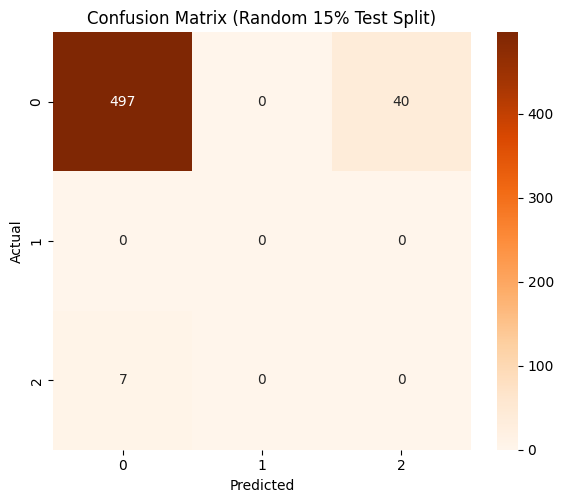

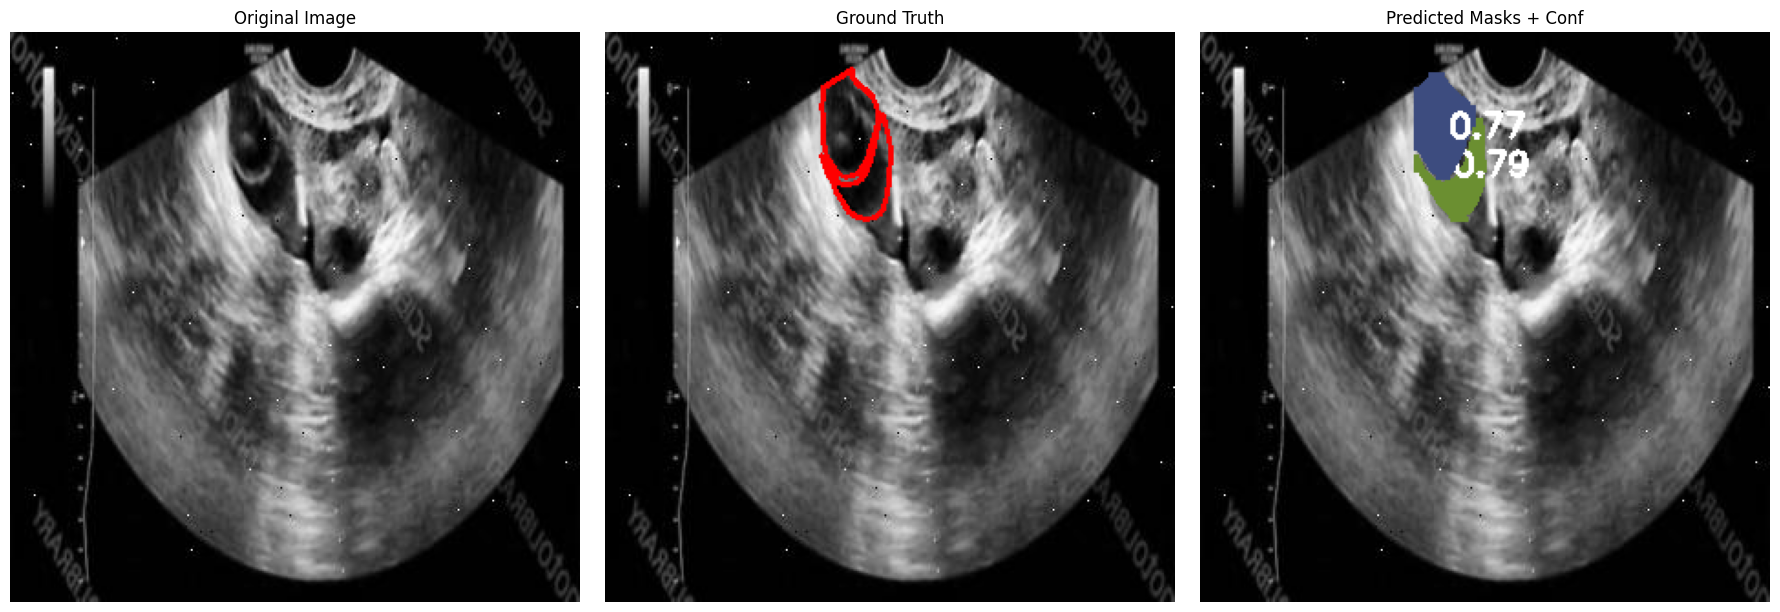


✅ Test analysis CSV saved: /content/drive/MyDrive/follicle_yolo_project/results/final_evaluation_v5_test15/test15_follicle_analysis.csv

📄 First 10 rows:
                                            frame_id  num_follicles  \
0  frame_00001_jpg.rf.904ff2c65f374d0632d219d89ab...              0   
1  frame_0000342_jpg.rf.e3a7f8cc04b18f3caaa1988df...              2   
2  frame_000042_jpg.rf.357a531ae7984987606cdee28b...             11   
3  frame_0000_jpg.rf.332238d887442fbeccb64a291d7f...              1   
4  frame_0000abb_jpg.rf.3d02e0c9ce459f175057a8b75...              6   
5  frame_0014_jpg.rf.870ea03ff31a8f203fb72e1aef99...              5   
6  frame_0014_jpg.rf.aa85d8f69f5b0e47bf047fecc8c9...              5   
7  frame_0015_jpg.rf.97c9b17456db0e9667260e08dfb8...              8   
8  frame_0017_jpg.rf.a9d4b32f70f5cb26ff59596bdf1d...              3   
9  frame_0018_jpg.rf.3a32c7648af755231e755c37223b...              4   

   num_mature  num_immature  largest_follicle_mm  ready_for_ret

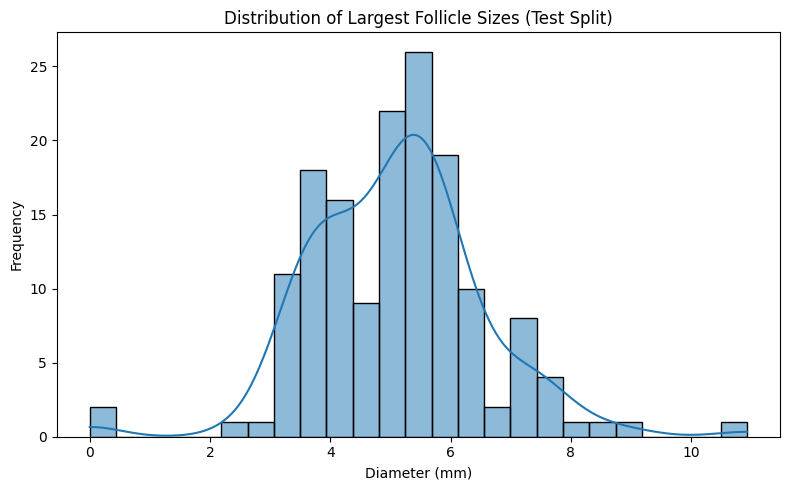

In [25]:
# =======================================================
# ✅ Final Evaluation — Random 15% Test Split (v5 model)
# =======================================================
from ultralytics import YOLO
import os, cv2, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from google.colab import drive
import random, math, yaml, shutil

# --- Mount Drive ---
drive.mount("/content/drive", force_remount=True)

# --- Base Paths ---
base_dir = "/content/drive/MyDrive/follicle_yolo_project"
full_images = f"{base_dir}/full_dataset/images"
full_labels = f"{base_dir}/full_dataset/labels"
test_images = f"{base_dir}/test_dataset/images"
test_labels = f"{base_dir}/test_dataset/labels"
os.makedirs(test_images, exist_ok=True)
os.makedirs(test_labels, exist_ok=True)

# --- Clear any old test data ---
for p in [test_images, test_labels]:
    for f in os.listdir(p):
        os.remove(os.path.join(p, f))

# --- Random 15% Split ---
all_imgs = [f for f in os.listdir(full_images) if f.lower().endswith(('.jpg','.png','.jpeg'))]
random.shuffle(all_imgs)
test_count = int(0.15 * len(all_imgs))
test_imgs = all_imgs[:test_count]

for img_name in test_imgs:
    src_img = os.path.join(full_images, img_name)
    dst_img = os.path.join(test_images, img_name)
    shutil.copy(src_img, dst_img)

    lbl_name = os.path.splitext(img_name)[0] + ".txt"
    src_lbl = os.path.join(full_labels, lbl_name)
    dst_lbl = os.path.join(test_labels, lbl_name)
    if os.path.exists(src_lbl):
        shutil.copy(src_lbl, dst_lbl)

print(f"✅ Created random 15% test split → {len(test_imgs)} images")
print(f"📂 Test images in: {test_images}")

# --- Paths for Model & YAML ---
model_path = f"{base_dir}/results/final_fine_tuning_v5/final_fine_tune_v5/weights/best.pt"
yaml_path = f"{base_dir}/yamls/test_dataset.yaml"
save_dir = f"{base_dir}/results/final_evaluation_v5_test15"
os.makedirs(save_dir, exist_ok=True)

# --- Verify ---
assert os.path.exists(model_path), f"Model not found: {model_path}"
assert os.path.isdir(test_images), f"Test images folder missing: {test_images}"

# --- Create YAML ---
yaml_data = {
    "train": test_images,  # dummy (YOLO requires both)
    "val": test_images,
    "nc": 1,
    "names": ["follicle"]
}
with open(yaml_path, "w") as f:
    yaml.safe_dump(yaml_data, f)
print(f"✅ Test YAML created at: {yaml_path}")

# --- Load Model ---
model = YOLO(model_path)

# =======================================================
# 1️⃣ Evaluate on Test Split
# =======================================================
results = model.val(data=yaml_path, split="val", save_json=True)
metrics = results.results_dict

precision = metrics.get("metrics/precision(B)", 0)
recall = metrics.get("metrics/recall(B)", 0)
f1 = 2 * (precision * recall) / (precision + recall + 1e-8)
map50 = metrics.get("metrics/mAP50(B)", 0)
map95 = metrics.get("metrics/mAP50-95(B)", 0)

conf_matrix = getattr(results, "confusion_matrix", None)
if conf_matrix and hasattr(conf_matrix, "matrix"):
    matrix = conf_matrix.matrix
    accuracy_cm = np.trace(matrix) / matrix.sum()
else:
    accuracy_cm = 0.0
    matrix = None

print("\n📊 Evaluation Metrics (Random 15% Test Split):")
print(f"Precision:     {precision:.4f}")
print(f"Recall:        {recall:.4f}")
print(f"F1 Score:      {f1:.4f}")
print(f"mAP@50:        {map50:.4f}")
print(f"mAP@50–95:     {map95:.4f}")
print(f"✅ Accuracy:   {accuracy_cm:.4f}")

# --- Confusion Matrix ---
if matrix is not None:
    plt.figure(figsize=(6,5))
    sns.heatmap(matrix, annot=True, fmt=".0f", cmap="Oranges", square=True)
    plt.title("Confusion Matrix (Random 15% Test Split)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, "confusion_matrix_test.png"))
    plt.show()

# =======================================================
# 2️⃣ Random Test Sample Visualization
# =======================================================
PIXEL_TO_MM = 0.10

def random_color():
    return tuple(np.random.randint(40, 220, 3).tolist())

sample_img = random.choice(test_imgs)
sample_path = os.path.join(test_images, sample_img)
label_path = os.path.join(test_labels, os.path.splitext(sample_img)[0] + ".txt")

orig_bgr = cv2.imread(sample_path)
orig_img = cv2.cvtColor(orig_bgr, cv2.COLOR_BGR2RGB)

# Ground Truth
gt_img = orig_img.copy()
if os.path.exists(label_path):
    with open(label_path, 'r') as lf:
        for line in lf:
            coords = np.array(line.strip().split()[1:], dtype=float).reshape(-1, 2)
            h, w = gt_img.shape[:2]
            coords[:, 0] *= w
            coords[:, 1] *= h
            pts = coords.astype(np.int32)
            cv2.polylines(gt_img, [pts], True, (255,0,0), 2)

# Prediction
pred = model.predict(sample_path, conf=0.25, verbose=False)[0]
pred_img = orig_img.copy()
if getattr(pred, "masks", None) is not None and len(pred.masks.xy):
    confs = pred.boxes.conf.cpu().numpy() if pred.boxes is not None else []
    for i, poly in enumerate(pred.masks.xy):
        pts = np.array(poly, dtype=np.int32)
        color = random_color()
        cv2.fillPoly(pred_img, [pts], color)
        cx, cy = int(np.mean(pts[:,0])), int(np.mean(pts[:,1]))
        conf_text = f"{confs[i]:.2f}" if i < len(confs) else "0.00"
        cv2.putText(pred_img, conf_text, (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 2)

# Display trio
fig, axs = plt.subplots(1,3, figsize=(18,6))
axs[0].imshow(orig_img); axs[0].set_title("Original Image"); axs[0].axis("off")
axs[1].imshow(gt_img); axs[1].set_title("Ground Truth"); axs[1].axis("off")
axs[2].imshow(pred_img); axs[2].set_title("Predicted Masks + Conf"); axs[2].axis("off")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "sample_comparison_test.png"))
plt.show()

# =======================================================
# 3️⃣ Follicle Statistics — Test Split
# =======================================================
records = []
for f in sorted(os.listdir(test_images)):
    if not f.lower().endswith(('.jpg','.png','.jpeg')):
        continue
    img_path = os.path.join(test_images, f)
    pred = model.predict(img_path, conf=0.25, verbose=False)[0]

    sizes_mm, confs = [], []
    if getattr(pred, "masks", None) and len(pred.masks.xy):
        conf_arr = pred.boxes.conf.cpu().numpy() if pred.boxes else []
        for i, poly in enumerate(pred.masks.xy):
            pts = np.array(poly, dtype=np.int32)
            area_px = abs(cv2.contourArea(pts))
            if area_px <= 0: continue
            diam_px = 2.0 * math.sqrt(area_px / math.pi)
            sizes_mm.append(diam_px * PIXEL_TO_MM)
            confs.append(float(conf_arr[i]) if i < len(conf_arr) else 0.0)

    num_follicles = len(sizes_mm)
    largest = max(sizes_mm) if sizes_mm else 0.0
    num_mature = sum(18.0 <= s <= 22.0 for s in sizes_mm)
    num_immature = sum(s < 18.0 for s in sizes_mm)
    ready_for_retrieval = int(largest >= 18.0)
    highest_conf = max(confs) if confs else 0.0

    records.append({
        "frame_id": f,
        "num_follicles": num_follicles,
        "num_mature": int(num_mature),
        "num_immature": int(num_immature),
        "largest_follicle_mm": round(largest, 2),
        "ready_for_retrieval": ready_for_retrieval,
        "highest_confidence": round(highest_conf, 3)
    })

df = pd.DataFrame(records)
csv_path = os.path.join(save_dir, "test15_follicle_analysis.csv")
df.to_csv(csv_path, index=False)

print(f"\n✅ Test analysis CSV saved: {csv_path}")
print("\n📄 First 10 rows:")
print(df.head(10))

# --- Extra visualization: follicle size distribution ---
plt.figure(figsize=(8,5))
sns.histplot(df["largest_follicle_mm"], bins=25, kde=True)
plt.title("Distribution of Largest Follicle Sizes (Test Split)")
plt.xlabel("Diameter (mm)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "follicle_size_distribution_test.png"))
plt.show()
